Bot-IoT veri setinin örneklemi için inceleme
veriyi dengeli şekilde ayırdım

In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

file_path = 'dataset_input/reduced_data_4.csv'
output_file = 'dataset_output/balanced_data.csv'

chunk_size = 10000

df_normals_list = []
df_attacks_sample_list = []

print(f"'{file_path}' taranıyor...")

total_rows_scanned = 0
found_normal_count = 0

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk.columns = chunk.columns.str.strip().str.replace('#', '').str.strip()
    
    if 'attack' in chunk.columns:
        label_col = 'attack'
    elif 'category' in chunk.columns:
        label_col = 'category'
    else:
        print("HATA: Etiket sütunu (attack/category) bulunamadı! Sütunlar:", chunk.columns)
        break

    normals = chunk[(chunk[label_col] == 0) | (chunk[label_col] == 'Normal')]
    
    attacks = chunk[(chunk[label_col] == 1) | ((chunk[label_col] != 0) & (chunk[label_col] != 'Normal'))]

    if len(normals) > 0:
        df_normals_list.append(normals)
        found_normal_count += len(normals)

    if len(attacks) > 0:
        attacks_sample = attacks.sample(frac=0.001, random_state=42) 
        df_attacks_sample_list.append(attacks_sample)

    total_rows_scanned += len(chunk)
    print(f"Tarandı: {total_rows_scanned} satır | Bulunan Normal: {found_normal_count} tane")

print("\n--- TARAMA BİTTİ ---")

if found_normal_count > 0:
    print(f"BAŞARILI! Toplam {found_normal_count} adet 'Normal' veri bulundu.")
    
    df_final_normals = pd.concat(df_normals_list)
    df_final_attacks_pool = pd.concat(df_attacks_sample_list)
    
    if len(df_final_attacks_pool) > found_normal_count:
        df_balanced_attacks = df_final_attacks_pool.sample(n=found_normal_count, random_state=42)
    else:
        df_balanced_attacks = df_final_attacks_pool 

    df_final = pd.concat([df_final_normals, df_balanced_attacks])

    df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)
    
    df_final.to_csv(output_file, index=False)
    print(f"\nDosya '{output_file}' olarak kaydedildi.")
    print(f"Yeni Veri Seti Boyutu: {len(df_final)} satır (Yarısı Normal, Yarısı Saldırı)")
    print("Artık bu dosyayı Model Eğitimi (Training) için kullan!")
    
else:
    print("Bu dosyada hiç Normal veri yokmuş.")
    print("TÜMÜ SALDIRI trafiği.")

'dataset_input/reduced_data_4.csv' taranıyor...
Tarandı: 10000 satır | Bulunan Normal: 0 tane
Tarandı: 20000 satır | Bulunan Normal: 0 tane
Tarandı: 30000 satır | Bulunan Normal: 0 tane
Tarandı: 40000 satır | Bulunan Normal: 0 tane
Tarandı: 50000 satır | Bulunan Normal: 0 tane
Tarandı: 60000 satır | Bulunan Normal: 0 tane
Tarandı: 70000 satır | Bulunan Normal: 0 tane
Tarandı: 80000 satır | Bulunan Normal: 0 tane
Tarandı: 90000 satır | Bulunan Normal: 0 tane
Tarandı: 100000 satır | Bulunan Normal: 0 tane
Tarandı: 110000 satır | Bulunan Normal: 0 tane
Tarandı: 120000 satır | Bulunan Normal: 0 tane
Tarandı: 130000 satır | Bulunan Normal: 0 tane
Tarandı: 140000 satır | Bulunan Normal: 0 tane
Tarandı: 150000 satır | Bulunan Normal: 0 tane
Tarandı: 160000 satır | Bulunan Normal: 0 tane
Tarandı: 170000 satır | Bulunan Normal: 0 tane
Tarandı: 180000 satır | Bulunan Normal: 0 tane
Tarandı: 190000 satır | Bulunan Normal: 0 tane
Tarandı: 200000 satır | Bulunan Normal: 0 tane
Tarandı: 210000 satır

veri inceleme ve temizleme

In [2]:
import pandas as pd
df = pd.read_csv('dataset_output/balanced_data.csv')

print(df.head())

   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0  3577084  1.526348e+09    e            1   arp             2   
1  3577307  1.526352e+09    e            1   udp             3   
2  3654522  1.526349e+09    e            1   tcp             1   
3  3464743  1.528099e+09    e            1   udp             3   
4  3577273  1.526352e+09    e            1   udp             3   

             saddr  sport          daddr dport  ...  AR_P_Proto_P_DstIP  \
0   192.168.100.27     -1  192.168.100.1    -1  ...            0.012314   
1    192.168.100.3   9711  156.154.100.3    53  ...          162.193000   
2  192.168.100.147  54776  192.168.100.5  6669  ...          587.857000   
3  192.168.100.147  65120  192.168.100.3    80  ...            1.075300   
4    192.168.100.7    365  192.168.100.3   565  ...           11.295800   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 12                 4            0.012107   
1                  2        

In [3]:
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")

print(df.columns.tolist())

Satır Sayısı: 954
Sütun Sayısı: 46
['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkSeqID                           954 non-null    int64  
 1   stime                             954 non-null    float64
 2   flgs                              954 non-null    object 
 3   flgs_number                       954 non-null    int64  
 4   proto                             954 non-null    object 
 5   proto_number                      954 non-null    int64  
 6   saddr                             954 non-null    object 
 7   sport                             954 non-null    object 
 8   daddr                             954 non-null    object 
 9   dport                             954 non-null    object 
 10  pkts                              954 non-null    int64  
 11  bytes                             954 non-null    int64  
 12  state   

In [5]:
print(df.describe())

            pkSeqID         stime  flgs_number  proto_number          pkts  \
count  9.540000e+02  9.540000e+02   954.000000    954.000000    954.000000   
mean   3.453209e+06  1.527104e+09     1.084906      2.772537   1187.601677   
std    1.853807e+05  8.613456e+05     0.654408      0.668305   7058.829840   
min    3.000440e+06  1.526344e+09     1.000000      1.000000      1.000000   
25%    3.324814e+06  1.526348e+09     1.000000      3.000000      2.000000   
50%    3.576954e+06  1.526352e+09     1.000000      3.000000      6.000000   
75%    3.577193e+06  1.528099e+09     1.000000      3.000000     11.000000   
max    3.667502e+06  1.528099e+09     7.000000      5.000000  70057.000000   

              bytes  state_number         ltime            seq          dur  \
count  9.540000e+02    954.000000  9.540000e+02     954.000000   954.000000   
mean   1.032531e+06      3.307128  1.527104e+09   61271.938155   116.260495   
std    6.888443e+06      1.208145  8.612550e+05   77021.5201

In [6]:
print(df['attack'].value_counts())

attack
0    477
1    477
Name: count, dtype: int64


In [7]:
print(df.isnull().sum())

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

ONE HOT ENCODİNG

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("Veri yükleniyor...")
df = pd.read_csv('dataset_output/balanced_data.csv') 

target_col = 'attack' 

drop_cols = [
    'pkSeqID', 'seq',
    'stime', 'ltime',
    'saddr', 'daddr', 'ip',
    'sport', 'dport',
    'category', 'subcategory'
]

if target_col in drop_cols:
    drop_cols.remove(target_col)

df_clean = df.drop(columns=drop_cols, errors='ignore')

print("Kategorik veriler işleniyor (One-Hot Encoding)...")
df_encoded = pd.get_dummies(df_clean, columns=['proto', 'state', 'flgs'], drop_first=True)

print(f"Yeni Sütun Sayısı: {df_encoded.shape[1]}")

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Model eğitiliyor...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\n--- TAHMİN SONUÇLARI ---")
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Başarı Oranı (Accuracy): %{acc:.2f}")

print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred))

print("\nEn Önemli 10 Özellik (Model Neye Dikkat Etti?):")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(10))

Veri yükleniyor...
Kategorik veriler işleniyor (One-Hot Encoding)...
Yeni Sütun Sayısı: 48
Model eğitiliyor...

--- TAHMİN SONUÇLARI ---
Başarı Oranı (Accuracy): %100.00

Detaylı Rapor:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        83

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191


En Önemli 10 Özellik (Model Neye Dikkat Etti?):
N_IN_Conn_P_DstIP                   0.227329
Pkts_P_State_P_Protocol_P_DestIP    0.093152
N_IN_Conn_P_SrcIP                   0.067613
TnP_PDstIP                          0.065491
Pkts_P_State_P_Protocol_P_SrcIP     0.057370
stddev                              0.056264
TnBPDstIP                           0.054987
pkts                                0.036830
TnP_Per_Dport                       0.034749
mean                             

FREQUENCY ENCODİNG

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('dataset_output/balanced_data.csv') 
target_col = 'attack' 

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 
    'saddr', 'daddr', 'ip', 
    'category', 'subcategory'
]
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

print("Portlar işleniyor...")
df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

categorical_cols = ['proto', 'state', 'flgs', 'sport', 'dport']
print("Kategorik veriler dönüştürülüyor...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Yeni Sütun Sayısı: {df_encoded.shape[1]}")

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\nBaşarı Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")

print("\nEn Önemli 10 Özellik:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(10))

Portlar işleniyor...
Kategorik veriler dönüştürülüyor...
Yeni Sütun Sayısı: 68

Başarı Oranı: %100.00

En Önemli 10 Özellik:
N_IN_Conn_P_DstIP                   0.162752
stddev                              0.088822
TnP_Per_Dport                       0.083092
TnBPDstIP                           0.074378
Pkts_P_State_P_Protocol_P_SrcIP     0.069932
TnP_PDstIP                          0.047666
N_IN_Conn_P_SrcIP                   0.046757
Pkts_P_State_P_Protocol_P_DestIP    0.043052
dport_80                            0.039046
spkts                               0.038493
dtype: float64


denemeler (random forest, logistic regression)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('dataset_output/balanced_data.csv') 
target_col = 'attack' 

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 'category', 'subcategory',
    'N_IN_Conn_P_DstIP',
    'TnP_Per_Dport',
    'TnBPDstIP'
]
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

print("Portlar işleniyor...")
df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

categorical_cols = ['proto', 'state', 'flgs', 'sport', 'dport']
print("Kategorik veriler dönüştürülüyor...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Yeni Sütun Sayısı: {df_encoded.shape[1]}")

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\nBaşarı Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")

print("\nEn Önemli 10 Özellik:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(10))

Portlar işleniyor...
Kategorik veriler dönüştürülüyor...
Yeni Sütun Sayısı: 65

Başarı Oranı: %100.00

En Önemli 10 Özellik:
Pkts_P_State_P_Protocol_P_DestIP    0.150750
Pkts_P_State_P_Protocol_P_SrcIP     0.087848
TnP_PDstIP                          0.087120
dport_80                            0.053238
sum                                 0.050809
stddev                              0.049722
mean                                0.043983
N_IN_Conn_P_SrcIP                   0.043934
TnP_PerProto                        0.042097
AR_P_Proto_P_Dport                  0.036659
dtype: float64


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('dataset_output/balanced_data.csv') 
target_col = 'attack' 

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 
    'saddr', 'daddr', 'ip', 
    'category', 'subcategory'
]
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

print("Portlar işleniyor...")
df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

categorical_cols = ['proto', 'state', 'flgs', 'sport', 'dport']
print("Kategorik veriler dönüştürülüyor...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Yeni Sütun Sayısı: {df_encoded.shape[1]}")

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\nBaşarı Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")

print("\nEn Önemli 10 Özellik:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(10))

Portlar işleniyor...
Kategorik veriler dönüştürülüyor...
Yeni Sütun Sayısı: 68

Başarı Oranı: %100.00

En Önemli 10 Özellik:
stddev                             0.209843
Pkts_P_State_P_Protocol_P_SrcIP    0.202276
N_IN_Conn_P_DstIP                  0.107027
TnBPDstIP                          0.081250
sum                                0.055432
srate                              0.053286
TnP_PerProto                       0.047352
AR_P_Proto_P_Sport                 0.023542
TnP_Per_Dport                      0.019791
dport_Other                        0.019578
dtype: float64


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('dataset_output/balanced_data.csv') 
target_col = 'attack' 

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 
    'category', 'subcategory',
    'N_IN_Conn_P_DstIP', 'TnP_Per_Dport', 'TnBPDstIP'
]
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

categorical_cols = ['proto', 'state', 'flgs', 'sport', 'dport']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Lojistik Regresyon Eğitiliyor (Daha basit model)...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

print("\n--- NORMAL TEST SONUÇLARI ---")
y_pred = model.predict(X_test_scaled)
print(f"Başarı Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")

print("\n--- GÜRÜLTÜLÜ (KİRLİ) VERİ TESTİ ---")
noise = np.random.normal(0, 1.5, X_test_scaled.shape)
X_test_noisy = X_test_scaled + noise

y_pred_noisy = model.predict(X_test_noisy)
print(f"Kirli Veride Başarı Oranı: %{accuracy_score(y_test, y_pred_noisy) * 100:.2f}")

print("\nEn Önemli 5 Özellik (Lojistik Regresyon Katsayıları):")
importance = np.abs(model.coef_[0])
feature_names = X.columns
inds = importance.argsort()[::-1][:5]
for i in inds:
    print(f"{feature_names[i]}: {importance[i]:.4f}")

Lojistik Regresyon Eğitiliyor (Daha basit model)...

--- NORMAL TEST SONUÇLARI ---
Başarı Oranı: %100.00

--- GÜRÜLTÜLÜ (KİRLİ) VERİ TESTİ ---
Kirli Veride Başarı Oranı: %87.96

En Önemli 5 Özellik (Lojistik Regresyon Katsayıları):
TnP_PerProto: 1.2672
dport_80: 1.0509
dport_53: 1.0087
state_RST: 0.8811
N_IN_Conn_P_SrcIP: 0.8695


Sınıflandırma Hedefleri: ['Normal' 'Reconnaissance' 'DDoS']
Lojistik Regresyon (Multiclass) Eğitiliyor...

Başarı Oranı: %100.00

Detaylı Rapor:
                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00        71
        Normal       1.00      1.00      1.00       108
Reconnaissance       1.00      1.00      1.00        12

      accuracy                           1.00       191
     macro avg       1.00      1.00      1.00       191
  weighted avg       1.00      1.00      1.00       191



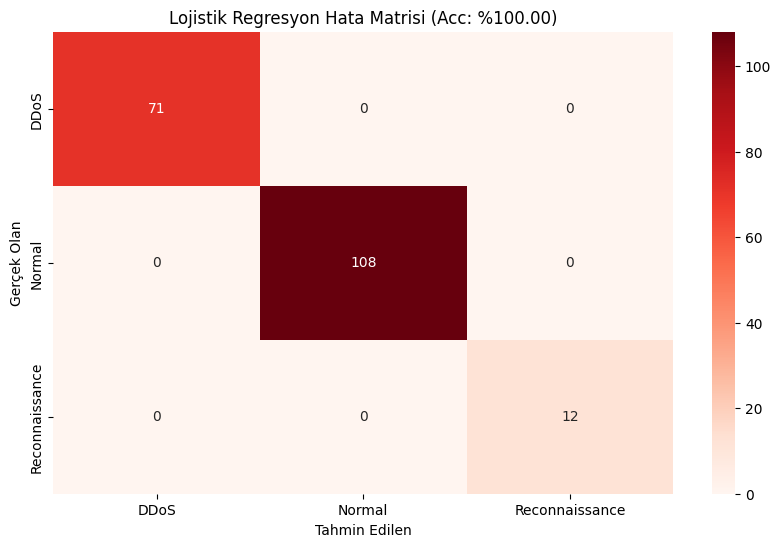

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('dataset_output/balanced_data.csv') 

target_col = 'category' 

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 
    'saddr', 'daddr', 'ip', 
    'attack', 'subcategory', 
    'N_IN_Conn_P_DstIP' 
]
if target_col in drop_cols: drop_cols.remove(target_col)

df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

categorical_cols = ['proto', 'state', 'flgs', 'sport', 'dport']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Sınıflandırma Hedefleri: {y.unique()}")
print("Lojistik Regresyon (Multiclass) Eğitiliyor...")

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred) * 100
print(f"\nBaşarı Oranı: %{acc:.2f}")

print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Lojistik Regresyon Hata Matrisi (Acc: %{acc:.2f})')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Olan')
plt.show()

hep %100 başarı alıyorum?
PCA görselleştirme + Cross Validation (overfitting var mı?)

Veri 2 Boyuta İndirgeniyor (PCA)...


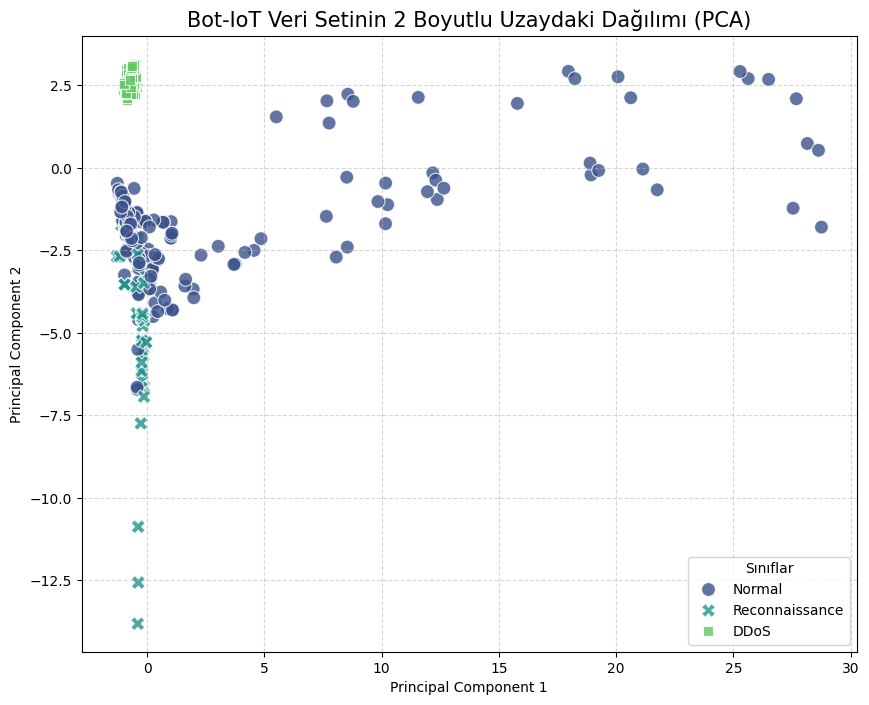

Eğer renkli kümeler birbirinden çok ayrıysa, %100 başarı normaldir.

10-Fold Cross Validation Yapılıyor (Modelin Sağlamlık Testi)...

10 Testin Sonuçları: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ortalama Başarı: %100.00
Standart Sapma: 0.0000

SONUÇ: Model istikrarlı


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('dataset_output/balanced_data.csv') 
target_col = 'category' 

drop_cols = ['pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 'attack', 'subcategory', 'N_IN_Conn_P_DstIP']
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

df_encoded = pd.get_dummies(df_clean, columns=['proto', 'state', 'flgs', 'sport', 'dport'], drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Veri 2 Boyuta İndirgeniyor (PCA)...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=y, palette='viridis', s=100, alpha=0.8)
plt.title('Bot-IoT Veri Setinin 2 Boyutlu Uzaydaki Dağılımı (PCA)', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sınıflar')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Eğer renkli kümeler birbirinden çok ayrıysa, %100 başarı normaldir.")

print("\n10-Fold Cross Validation Yapılıyor (Modelin Sağlamlık Testi)...")
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=10)

print(f"\n10 Testin Sonuçları: {scores}")
print(f"Ortalama Başarı: %{scores.mean() * 100:.2f}")
print(f"Standart Sapma: {scores.std():.4f}")

if scores.mean() > 0.99:
    print("\nSONUÇ: Model istikrarlı")

Hierarchical Labeling

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('dataset_output/balanced_data.csv') 

df['hybrid_label'] = df['attack'].astype(str) + "_" + df['category']

target_col = 'hybrid_label' 

print(f"Yeni Oluşturulan Sınıflar: {df[target_col].unique()}")

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 
    'attack', 'category', 'subcategory', 
    'N_IN_Conn_P_DstIP' 
]
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

df_encoded = pd.get_dummies(df_clean, columns=['proto', 'state', 'flgs', 'sport', 'dport'], drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nHibrit Etiketli Model Eğitiliyor...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\nBaşarı Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred))

Yeni Oluşturulan Sınıflar: ['0_Normal' '1_Reconnaissance' '1_DDoS']

Hibrit Etiketli Model Eğitiliyor...

Başarı Oranı: %100.00

Detaylı Rapor:
                  precision    recall  f1-score   support

        0_Normal       1.00      1.00      1.00       108
          1_DDoS       1.00      1.00      1.00        71
1_Reconnaissance       1.00      1.00      1.00        12

        accuracy                           1.00       191
       macro avg       1.00      1.00      1.00       191
    weighted avg       1.00      1.00      1.00       191



İSTATİSTİKSEL ANALİZ

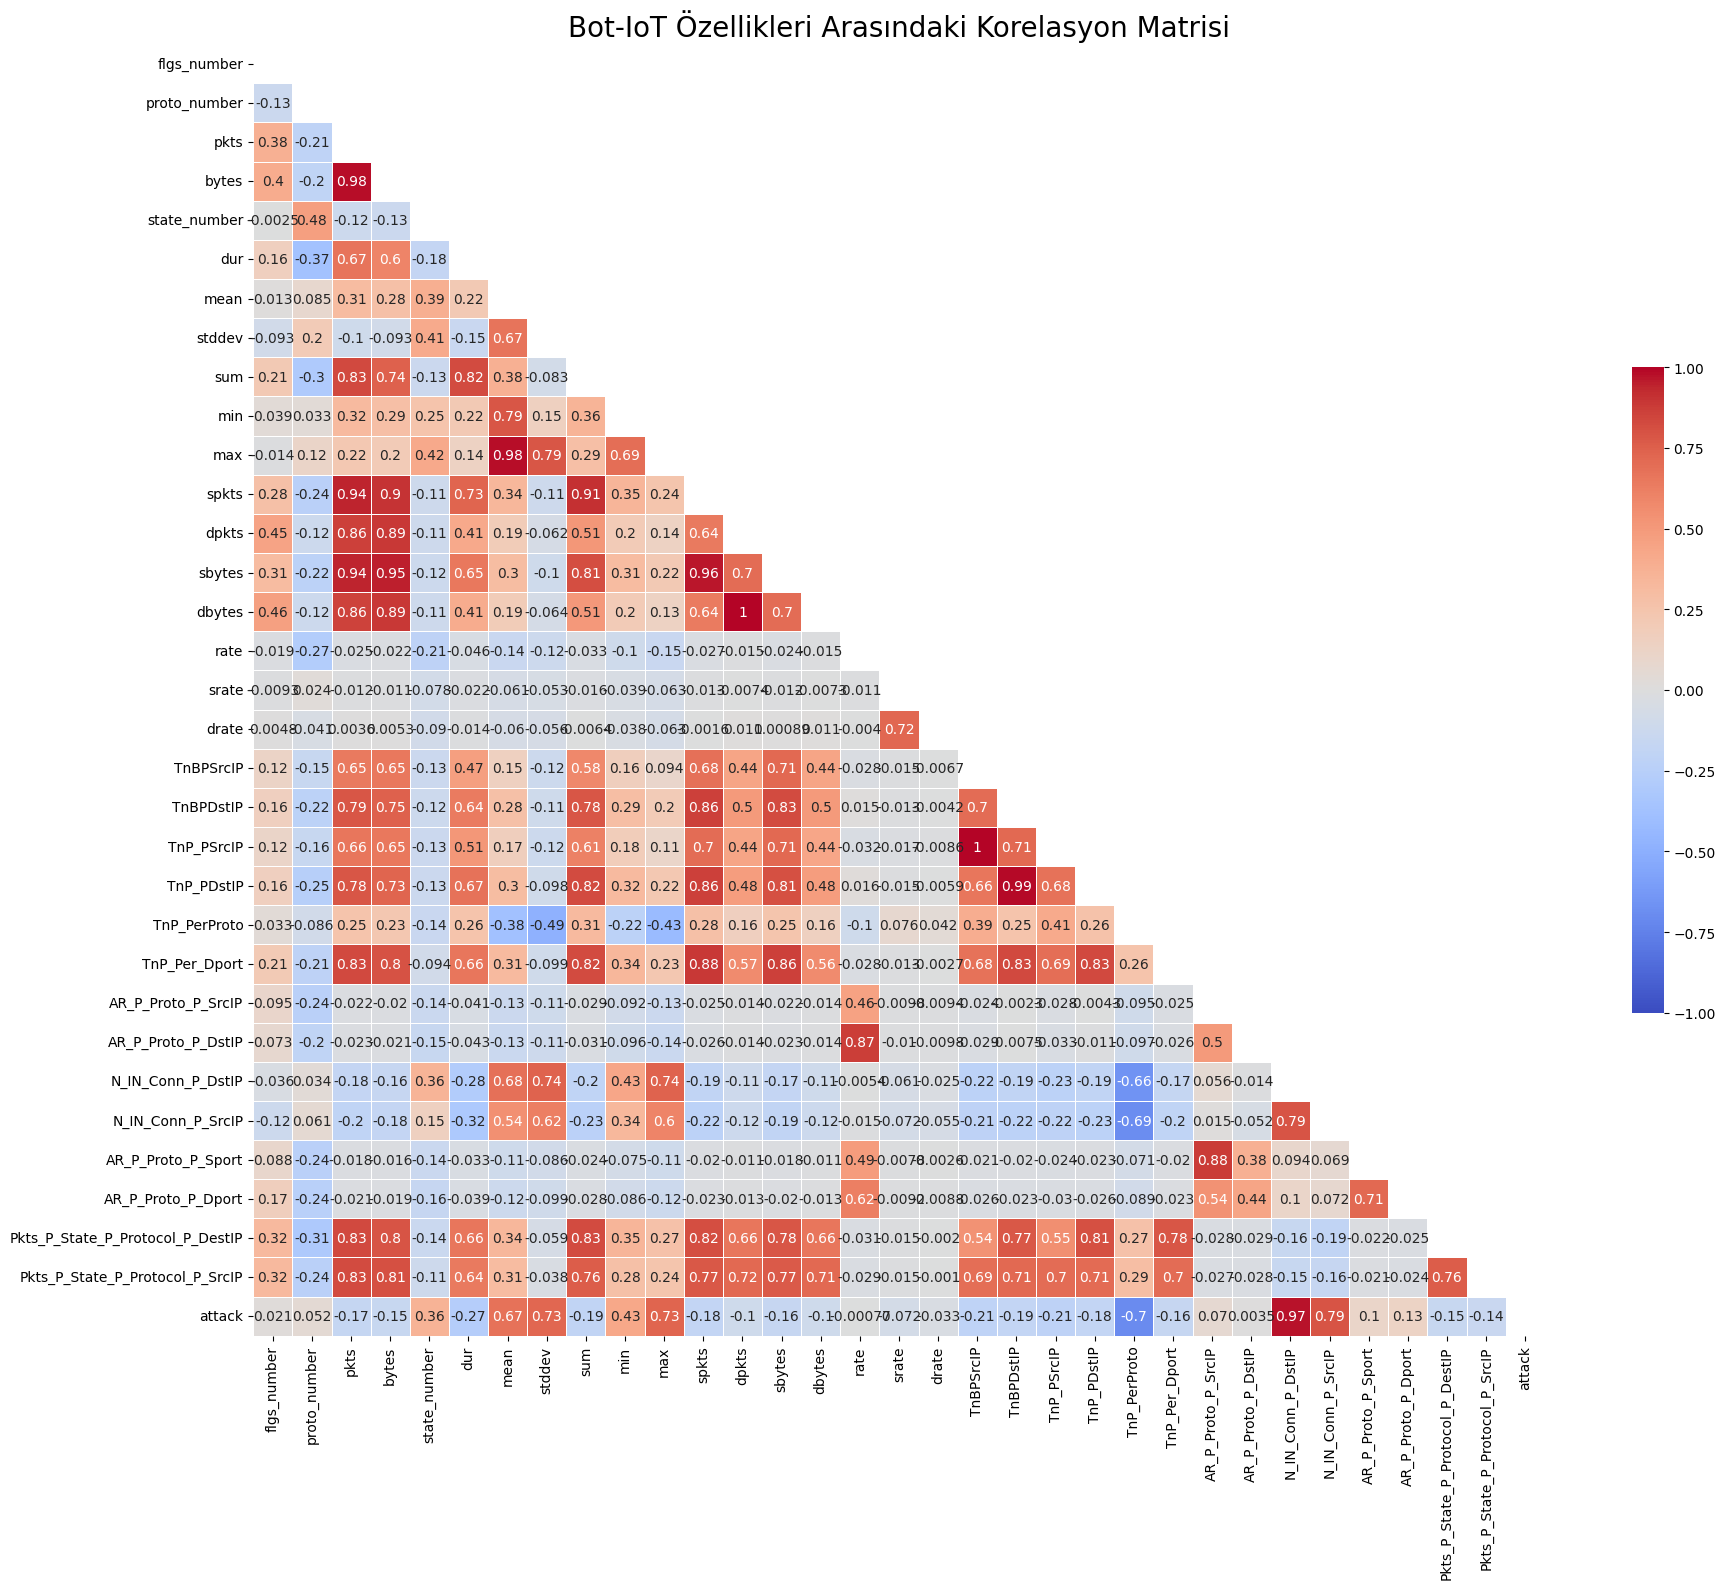

Birbiriyle %95'ten Fazla Benzeşen Sütunlar (Yüksek Korelasyon):
dpkts              dbytes               0.998691
dbytes             dpkts                0.998691
TnBPSrcIP          TnP_PSrcIP           0.996139
TnP_PSrcIP         TnBPSrcIP            0.996139
TnP_PDstIP         TnBPDstIP            0.986784
TnBPDstIP          TnP_PDstIP           0.986784
bytes              pkts                 0.983798
pkts               bytes                0.983798
mean               max                  0.983095
max                mean                 0.983095
attack             N_IN_Conn_P_DstIP    0.974185
N_IN_Conn_P_DstIP  attack               0.974185
sbytes             spkts                0.963535
spkts              sbytes               0.963535
dtype: float64


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset_output/balanced_data.csv')

df_numeric = df.select_dtypes(include=['number'])

drop_cols = ['pkSeqID', 'seq', 'stime', 'ltime'] 
df_numeric = df_numeric.drop(columns=drop_cols, errors='ignore')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Bot-IoT Özellikleri Arasındaki Korelasyon Matrisi', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Birbiriyle %95'ten Fazla Benzeşen Sütunlar (Yüksek Korelasyon):")
c = corr_matrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[(so > 0.95) & (so < 1.0)].head(20))

Korelasyon Matrisine göre Multicollinearity Temizliği + Decision Tree

Gereksiz sütunlar atıldı. Decision Tree Eğitiliyor...

Başarı Oranı: %99.48

--- Modelin Karar Kuralları---
|--- stddev <= 0.54
|   |--- AR_P_Proto_P_Dport <= 250.88
|   |   |--- proto_icmp <= 0.50
|   |   |   |--- N_IN_Conn_P_SrcIP <= 76.00
|   |   |   |   |--- drate <= 22.65
|   |   |   |   |   |--- class: Normal
|   |   |   |   |--- drate >  22.65
|   |   |   |   |   |--- class: Normal
|   |   |   |--- N_IN_Conn_P_SrcIP >  76.00
|   |   |   |   |--- Pkts_P_State_P_Protocol_P_DestIP <= 334.00
|   |   |   |   |   |--- class: Reconnaissance
|   |   |   |   |--- Pkts_P_State_P_Protocol_P_DestIP >  334.00
|   |   |   |   |   |--- class: DDoS
|   |   |--- proto_icmp >  0.50
|   |   |   |--- class: Reconnaissance
|   |--- AR_P_Proto_P_Dport >  250.88
|   |   |--- Pkts_P_State_P_Protocol_P_DestIP <= 11.00
|   |   |   |--- class: Normal
|   |   |--- Pkts_P_State_P_Protocol_P_DestIP >  11.00
|   |   |   |--- class: Reconnaissance
|--- stddev >  0.54
|   |--- state_INT <= 0.50
|   |   |--- cla

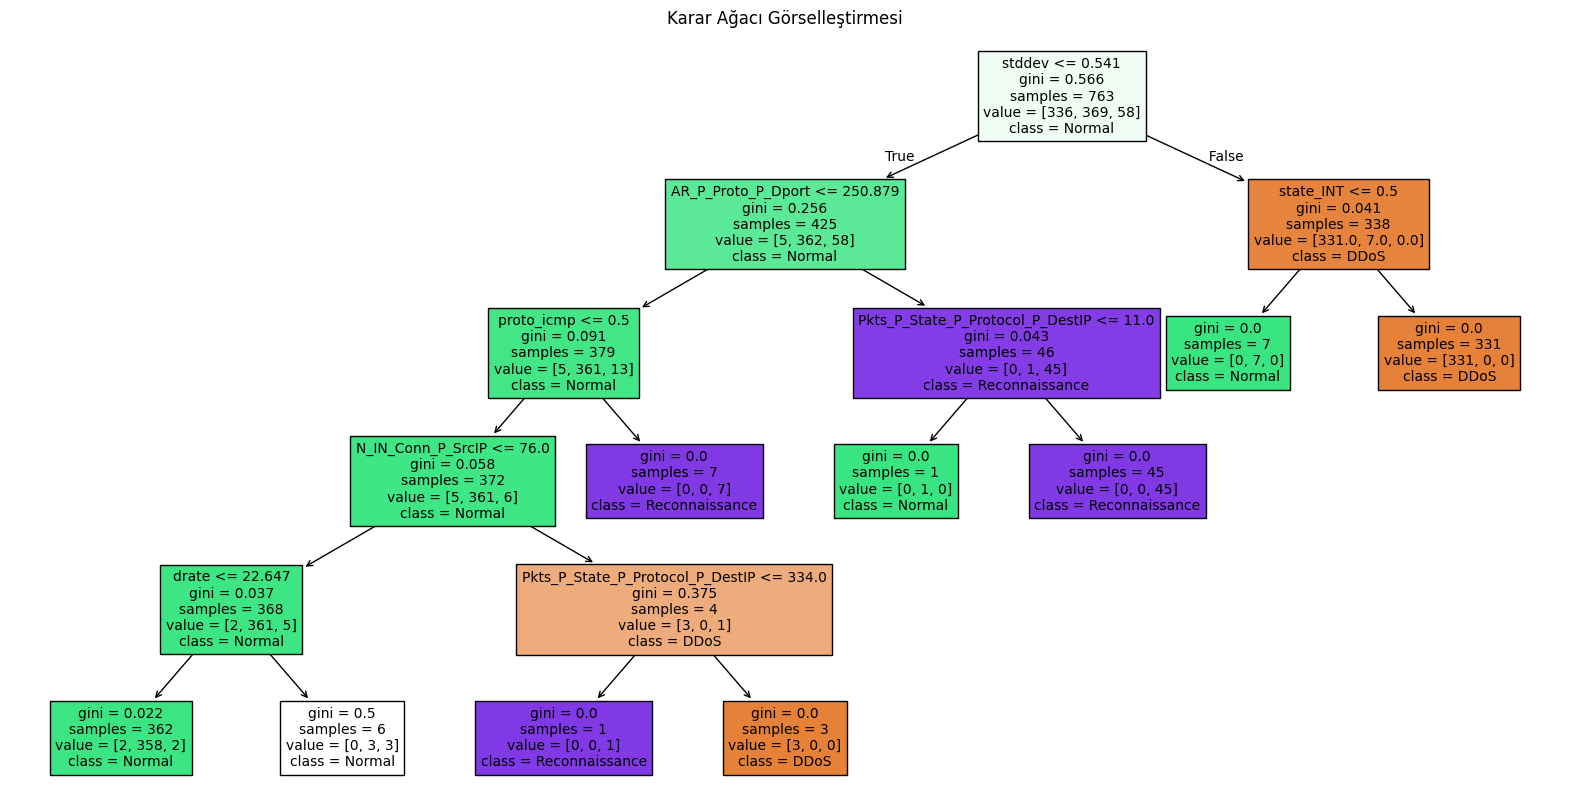

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv('dataset_output/balanced_data.csv')
target_col = 'category'

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 
    'attack', 'subcategory',
    'dbytes',
    'sbytes',
    'TnP_PSrcIP',
    'TnP_PDstIP',
    'max',
    'N_IN_Conn_P_DstIP'
]

if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe

df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

df_encoded = pd.get_dummies(df_clean, columns=['proto', 'state', 'flgs', 'sport', 'dport'], drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Gereksiz sütunlar atıldı. Decision Tree Eğitiliyor...")
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"\nBaşarı Oranı: %{acc:.2f}")

print("\n--- Modelin Karar Kuralları---")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()

Naive Bayes: (Hız testi için)
LSTM: (Zaman serisi/IoT için)
GRU: (LSTM'in daha hızlı, hafif hali - IoT için ideal)
CNN-LSTM (Hibrit): (Hem görsel özellik hem zaman analizi)

In [18]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('dataset_output/balanced_data.csv')
target_col = 'category'

drop_cols = [
    'pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr', 'ip', 
    'attack', 'subcategory', 
    'dbytes', 'sbytes', 'TnP_PSrcIP', 'TnP_PDstIP', 'max', 
    'N_IN_Conn_P_DstIP' 
]
if target_col in drop_cols: drop_cols.remove(target_col)
df_clean = df.drop(columns=drop_cols, errors='ignore')

def handle_top_ports(dataframe, col_name, top_k=10):
    top_ports = dataframe[col_name].value_counts().nlargest(top_k).index
    dataframe[col_name] = dataframe[col_name].astype(str).apply(lambda x: x if x in top_ports.astype(str) else 'Other')
    return dataframe
df_clean = handle_top_ports(df_clean, 'sport', top_k=10)
df_clean = handle_top_ports(df_clean, 'dport', top_k=10)

df_encoded = pd.get_dummies(df_clean, columns=['proto', 'state', 'flgs', 'sport', 'dport'], drop_first=True)

X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
_, _, y_train_cat, y_test_cat = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- 1. NAIVE BAYES EĞİTİLİYOR ---")
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
train_time_nb = time.time() - start_time

y_pred_nb = nb_model.predict(X_test_scaled)
print(f"Naive Bayes Accuracy: %{accuracy_score(y_test, y_pred_nb) * 100:.2f}")
print(f"Eğitim Süresi: {train_time_nb:.4f} saniye")

X_train_dl = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_dl = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
num_classes = y_categorical.shape[1]
input_shape = (1, X_train_scaled.shape[1])

print("\n--- 2. LSTM EĞİTİLİYOR ---")
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=input_shape, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(num_classes, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model_lstm.fit(X_train_dl, y_train_cat, epochs=10, batch_size=32, verbose=0)
train_time_lstm = time.time() - start_time

loss, acc_lstm = model_lstm.evaluate(X_test_dl, y_test_cat, verbose=0)
print(f"LSTM Accuracy: %{acc_lstm * 100:.2f}")
print(f"Eğitim Süresi: {train_time_lstm:.4f} saniye")

print("\n--- 3. GRU (Lightweight DL) EĞİTİLİYOR ---")
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=input_shape, activation='relu'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(num_classes, activation='softmax'))

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model_gru.fit(X_train_dl, y_train_cat, epochs=10, batch_size=32, verbose=0)
train_time_gru = time.time() - start_time

loss, acc_gru = model_gru.evaluate(X_test_dl, y_test_cat, verbose=0)
print(f"GRU Accuracy: %{acc_gru * 100:.2f}")
print(f"Eğitim Süresi: {train_time_gru:.4f} saniye")

print("\n--- 4. HİBRİT CNN-LSTM EĞİTİLİYOR ---")
model_hybrid = Sequential()
model_hybrid.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
model_hybrid.add(MaxPooling1D(pool_size=1))
model_hybrid.add(LSTM(32, activation='relu'))
model_hybrid.add(Dense(num_classes, activation='softmax'))

model_hybrid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model_hybrid.fit(X_train_dl, y_train_cat, epochs=10, batch_size=32, verbose=0)
train_time_hybrid = time.time() - start_time

loss, acc_hybrid = model_hybrid.evaluate(X_test_dl, y_test_cat, verbose=0)
print(f"CNN-LSTM Hybrid Accuracy: %{acc_hybrid * 100:.2f}")
print(f"Eğitim Süresi: {train_time_hybrid:.4f} saniye")

print("\n--- SONUÇ KARŞILAŞTIRMASI ---")
print(f"{'Model':<15} | {'Accuracy':<10} | {'Süre (sn)':<10}")
print("-" * 40)
print(f"{'Naive Bayes':<15} | %{accuracy_score(y_test, y_pred_nb)*100:.2f}     | {train_time_nb:.4f}")
print(f"{'LSTM':<15} | %{acc_lstm*100:.2f}     | {train_time_lstm:.4f}")
print(f"{'GRU':<15} | %{acc_gru*100:.2f}     | {train_time_gru:.4f}")
print(f"{'CNN-LSTM':<15} | %{acc_hybrid*100:.2f}     | {train_time_hybrid:.4f}")


--- 1. NAIVE BAYES EĞİTİLİYOR ---
Naive Bayes Accuracy: %100.00
Eğitim Süresi: 0.0013 saniye

--- 2. LSTM EĞİTİLİYOR ---
LSTM Accuracy: %100.00
Eğitim Süresi: 2.9561 saniye

--- 3. GRU (Lightweight DL) EĞİTİLİYOR ---
GRU Accuracy: %100.00
Eğitim Süresi: 2.9695 saniye

--- 4. HİBRİT CNN-LSTM EĞİTİLİYOR ---
CNN-LSTM Hybrid Accuracy: %100.00
Eğitim Süresi: 3.1950 saniye

--- SONUÇ KARŞILAŞTIRMASI ---
Model           | Accuracy   | Süre (sn) 
----------------------------------------
Naive Bayes     | %100.00     | 0.0013
LSTM            | %100.00     | 2.9561
GRU             | %100.00     | 2.9695
CNN-LSTM        | %100.00     | 3.1950


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("Veri yükleniyor...")
df = pd.read_csv('dataset_output/balanced_data.csv') 

df_numeric = df.select_dtypes(include=['number'])

target_col = 'attack' 
if 'category' in df_numeric.columns:
    target_col = 'category'

print(f"Hedef Sütun: {target_col}")

drop_cols = [
    'pkSeqID', 'seq',
    'stime', 'ltime',
    'saddr', 'daddr', 'ip',
    'sport', 'dport',
    'id',
    target_col
]

X = df_numeric.drop(columns=drop_cols, errors='ignore')
y = df_numeric[target_col]

print(f"Eğitim için kullanılan özellik (sütun) sayısı: {X.shape[1]}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Model eğitiliyor...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Tahmin yapılıyor...")
y_pred = model.predict(X_test)

print("\n--- GERÇEKÇİ SONUÇLAR ---")
acc = accuracy_score(y_test, y_pred) * 100
print(f"Başarı Oranı (Accuracy): %{acc:.2f}")

print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred))

print("\nEn Önemli 5 Özellik:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(5))

Veri yükleniyor...
Hedef Sütun: attack
Eğitim için kullanılan özellik (sütun) sayısı: 32
Model eğitiliyor...
Tahmin yapılıyor...

--- GERÇEKÇİ SONUÇLAR ---
Başarı Oranı (Accuracy): %100.00

Detaylı Rapor:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        83

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191


En Önemli 5 Özellik:
N_IN_Conn_P_DstIP                   0.191918
TnP_PDstIP                          0.147863
Pkts_P_State_P_Protocol_P_DestIP    0.119763
stddev                              0.089155
TnBPDstIP                           0.070601
dtype: float64


Derin öğrenme modellerin (LSTM, GRU) %100 vermesi normaldi ama Naive Bayes'in bile hata yapmaması, veri setinin "Lineer Olarak Ayrılabilir" olduğunu ispatladı.
bu veri setini incelemeyi bu noktada bırakıyorum.
CIC-IoT-2023 denen güncel bir veri seti varmış, Bot-IoT'yi yapan ekip tarafından yayınlanmış. Onu deneyeceğim.

CIC-IoT-2023 veri setinin örneklemi için inceleme

In [20]:
import pandas as pd

file_path = 'dataset_input/ciciot2023_0.csv' 

print(f"Veri okunuyor: {file_path} ...")
df = pd.read_csv(file_path, low_memory=False)

print("\n--- İLK BAKIŞ ---")
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")

print("\n--- SÜTUN İSİMLERİ ---")
df.columns = df.columns.str.strip()
print(df.columns.tolist())

print("\n--- HEDEF ETİKET DAĞILIMI (SALDIRI TÜRLERİ) ---")
if 'label' in df.columns:
    count_series = df['label'].value_counts()
    print(count_series)
    
    print("\n--- NORMAL vs SALDIRI ORANI ---")
    normal_count = count_series.get('BenignTraffic', 0)
    total_count = df.shape[0]
    print(f"Normal Trafik Sayısı: {normal_count} (%{(normal_count/total_count)*100:.2f})")
    print(f"Saldırı Trafik Sayısı: {total_count - normal_count}")
else:
    print("UYARI: 'label' sütunu bulunamadı. Lütfen yukarıdaki sütun isimlerini kontrol et.")

print("\n--- İLK 5 SATIR ---")
print(df.head())

Veri okunuyor: dataset_input/ciciot2023_0.csv ...

--- İLK BAKIŞ ---
Satır Sayısı: 238687
Sütun Sayısı: 47

--- SÜTUN İSİMLERİ ---
['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']

--- HEDEF ETİKET DAĞILIMI (SALDIRI TÜRLERİ) ---
label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood       

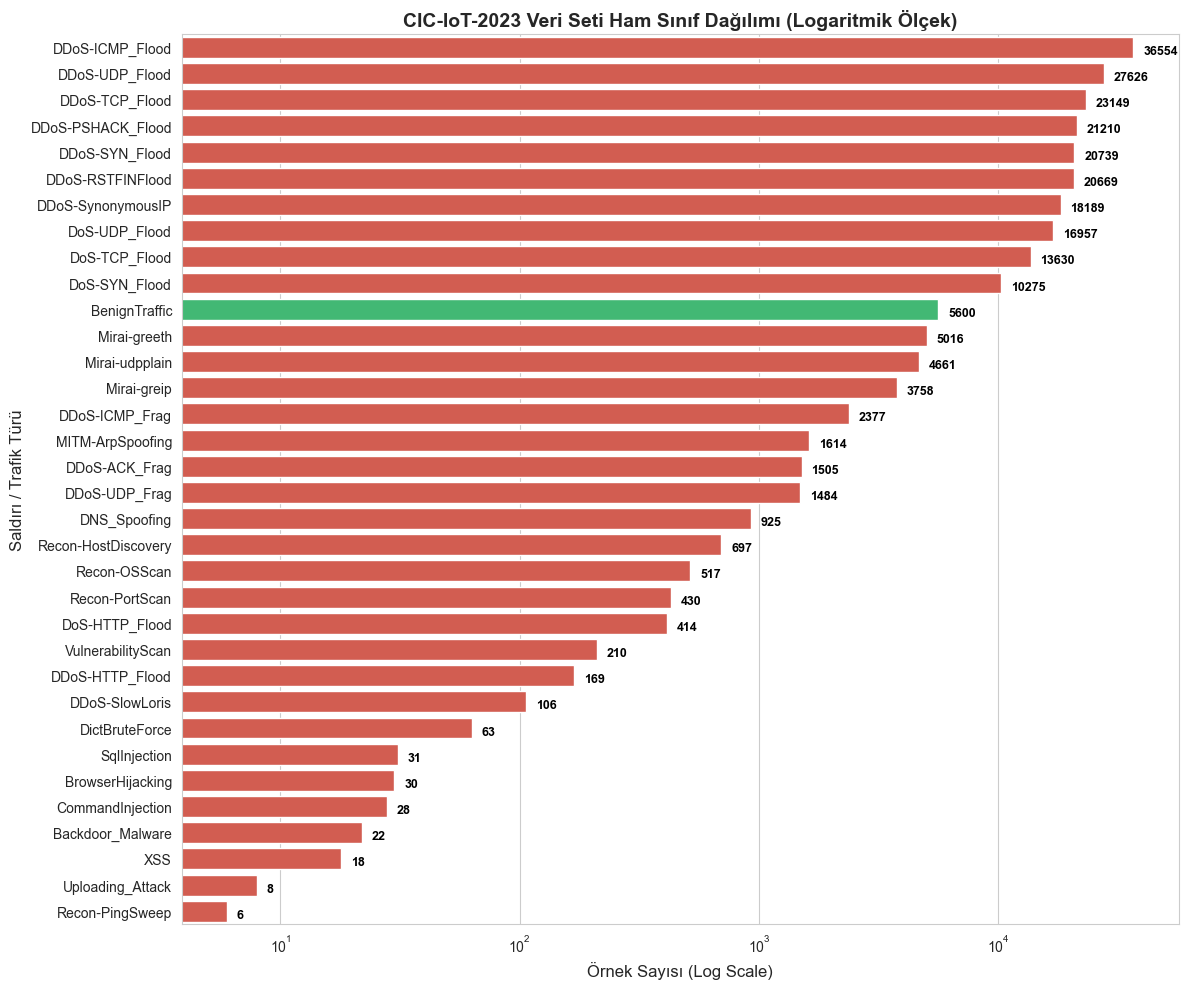

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = {
    'Saldırı Türü': [
        'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood', 
        'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP', 'DoS-UDP_Flood', 
        'DoS-TCP_Flood', 'DoS-SYN_Flood', 'BenignTraffic', 'Mirai-greeth', 
        'Mirai-udpplain', 'Mirai-greip', 'DDoS-ICMP_Frag', 'MITM-ArpSpoofing', 
        'DDoS-ACK_Frag', 'DDoS-UDP_Frag', 'DNS_Spoofing', 'Recon-HostDiscovery', 
        'Recon-OSScan', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 
        'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictBruteForce', 'SqlInjection', 
        'BrowserHijacking', 'CommandInjection', 'Backdoor_Malware', 'XSS', 
        'Uploading_Attack', 'Recon-PingSweep'
    ],
    'Örnek Sayısı': [
        36554, 27626, 23149, 21210, 20739, 20669, 18189, 16957, 13630, 10275, 
        5600, 5016, 4661, 3758, 2377, 1614, 1505, 1484, 925, 697, 517, 430, 
        414, 210, 169, 106, 63, 31, 30, 28, 22, 18, 8, 6
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

colors = ['#2ecc71' if x == 'BenignTraffic' else '#e74c3c' for x in df['Saldırı Türü']]

ax = sns.barplot(x='Örnek Sayısı', y='Saldırı Türü', data=df, palette=colors)

ax.set_xscale("log")

plt.title('CIC-IoT-2023 Veri Seti Ham Sınıf Dağılımı (Logaritmik Ölçek)', fontsize=14, fontweight='bold')
plt.xlabel('Örnek Sayısı (Log Scale)', fontsize=12)
plt.ylabel('Saldırı / Trafik Türü', fontsize=12)

for i, v in enumerate(df['Örnek Sayısı']):
    ax.text(v + (v * 0.1), i + 0.25, str(v), color='black', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

Mapping ve normal-saldırı verileri Dengeleme
Majority Class Bias (Çoğunluk Sınıfı Yanlılığı) için De-biasing

--- VERİ AVCILIĞI BAŞLIYOR (LABEL KORUMALI) ---

İşleniyor: dataset_input/ciciot2023_0.csv ...
  -> [ANA DOSYA] Tüm veriler alındı. Satır: 238687

İşleniyor: dataset_input/ciciot2023_1.csv ...
  -> [EK DOSYA] Sadece nadir sınıflar avlandı. Satır: 9267

İşleniyor: dataset_input/ciciot2023_2.csv ...
  -> [EK DOSYA] Sadece nadir sınıflar avlandı. Satır: 11596

İşleniyor: dataset_input/ciciot2023_3.csv ...
  -> [EK DOSYA] Sadece nadir sınıflar avlandı. Satır: 9637

--- TOPLAMA BİTTİ. TOPLAM SATIR: 269187 ---
Dengeleme Limiti: 22484

--- SON DURUM (34 ALT SINIF İLE BİRLİKTE) ---
Toplam Veri Boyutu: (99102, 48)
BAŞARILI: 'label' sütunu korundu!

Dosya başarıyla kaydedildi: dataset_output/ciciot2023_balanced2.csv

--- 34 ALT SINIFIN DETAYLI ANALİZİ ---


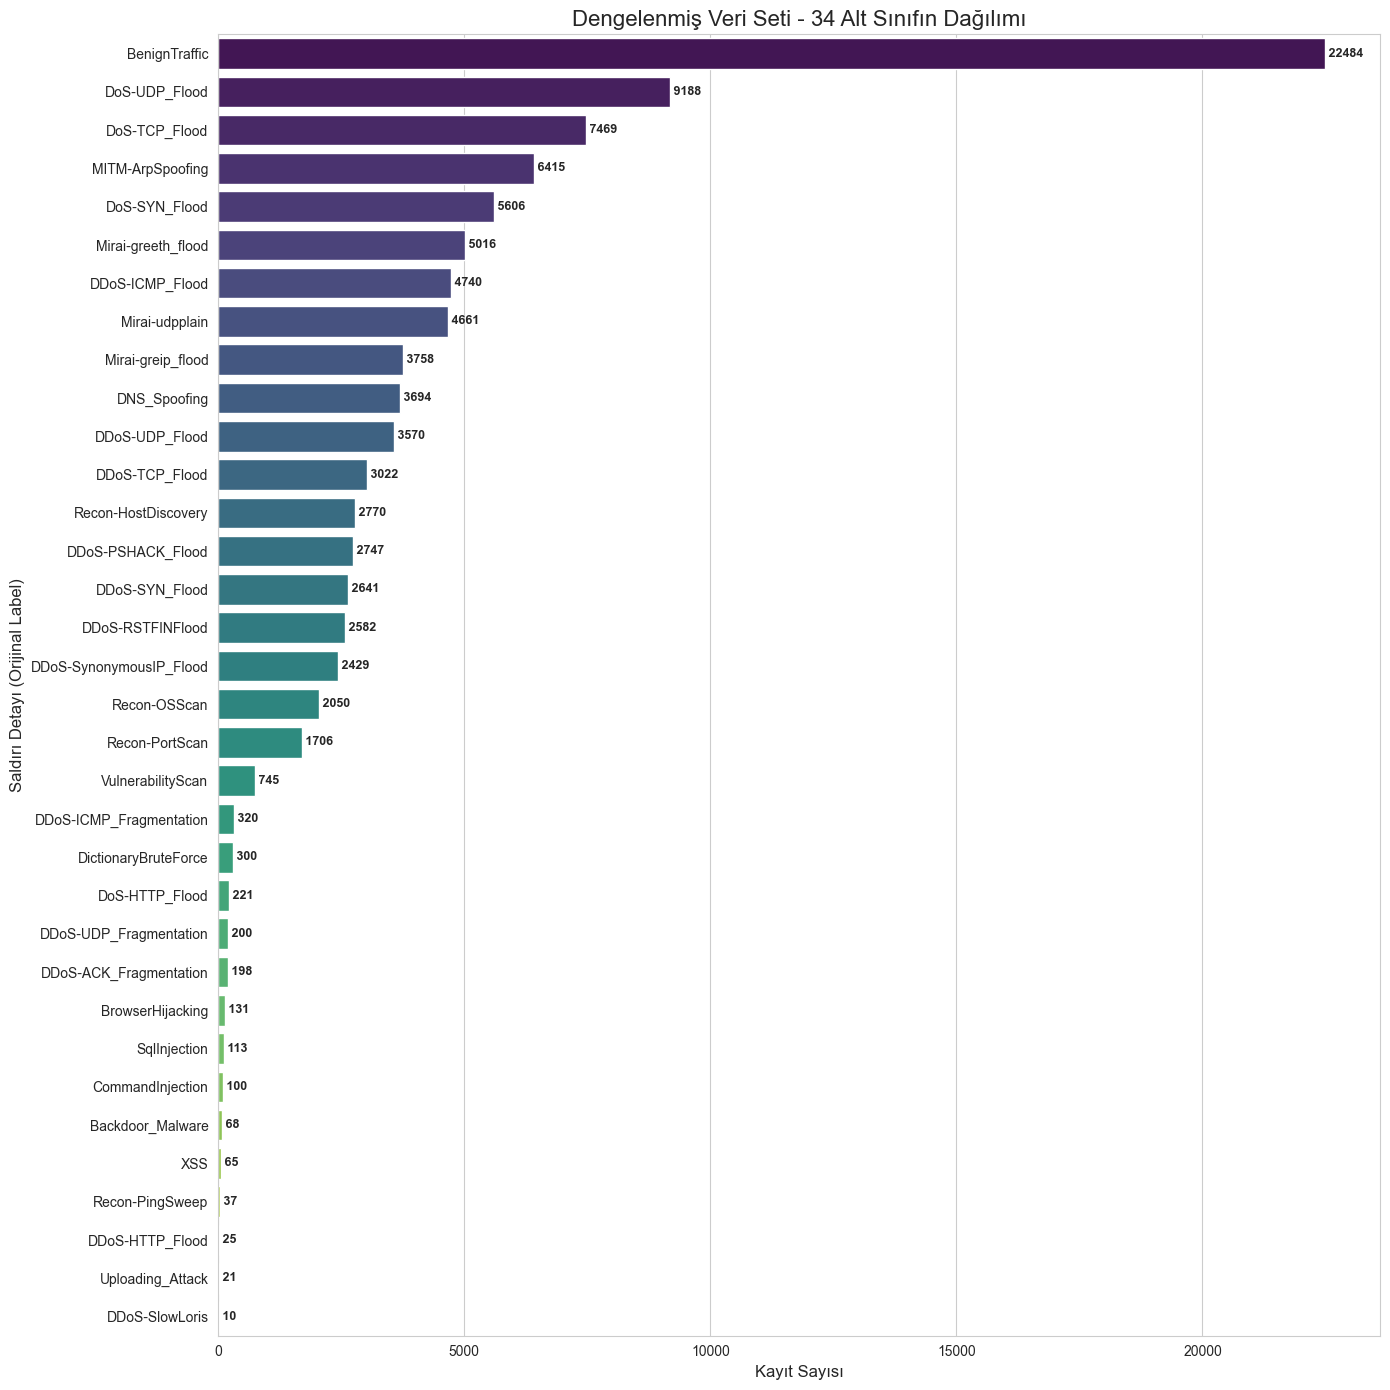

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_list = [
    'dataset_input/ciciot2023_0.csv', 
    'dataset_input/ciciot2023_1.csv', 
    'dataset_input/ciciot2023_2.csv', 
    'dataset_input/ciciot2023_3.csv'
]

if not os.path.exists('dataset_output'):
    os.makedirs('dataset_output')

label_mapping = {
    'DDoS-ICMP_Flood': 'DDoS', 'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS', 'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS', 'DDoS-UDP_Fragmentation': 'DDoS', 
    'DDoS-HTTP_Flood': 'DDoS', 'DDoS-SlowLoris': 'DDoS',
    'DoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai',
    'Recon-HostDiscovery': 'Recon', 'Recon-OSScan': 'Recon', 
    'Recon-PortScan': 'Recon', 'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon',
    'SqlInjection': 'Web', 'XSS': 'Web', 'CommandInjection': 'Web', 
    'BrowserHijacking': 'Web', 'Uploading_Attack': 'Web', 'Backdoor_Malware': 'Web',
    'DictionaryBruteForce': 'BruteForce',
    'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
    'BenignTraffic': 'Normal'
}

abundant_classes = ['DDoS', 'DoS', 'Mirai'] 

combined_df = pd.DataFrame()

print("--- VERİ AVCILIĞI BAŞLIYOR (LABEL KORUMALI) ---")

for filename in file_list:
    if os.path.exists(filename):
        print(f"\nİşleniyor: {filename} ...")
        
        try:
            df_chunk = pd.read_csv(filename, low_memory=False)
        except Exception as e:
            print(f"  HATA: Dosya okunamadı! {e}")
            continue

        df_chunk.columns = df_chunk.columns.str.strip()
        
        if 'label' in df_chunk.columns:
            df_chunk['main_label'] = df_chunk['label'].map(label_mapping)
            
            if 'ciciot2023_0.csv' in filename:
                filtered_data = df_chunk
                print(f"  -> [ANA DOSYA] Tüm veriler alındı. Satır: {len(df_chunk)}")
            else:
                filtered_data = df_chunk[~df_chunk['main_label'].isin(abundant_classes)]
                print(f"  -> [EK DOSYA] Sadece nadir sınıflar avlandı. Satır: {len(filtered_data)}")
            
            combined_df = pd.concat([combined_df, filtered_data])
        else:
            print("  -> 'label' sütunu bulunamadı, atlandı.")
    else:
        print(f"UYARI: Dosya bulunamadı -> {filename}")

print(f"\n--- TOPLAMA BİTTİ. TOPLAM SATIR: {combined_df.shape[0]} ---")

normal_count = len(combined_df[combined_df['main_label'] == 'Normal'])
LIMIT = max(normal_count, 5000)
print(f"Dengeleme Limiti: {LIMIT}")

balanced_df = pd.DataFrame()

for cls in combined_df['main_label'].unique():
    cls_df = combined_df[combined_df['main_label'] == cls]
    count = len(cls_df)
    
    if count > LIMIT:
        sampled = cls_df.sample(n=LIMIT, random_state=42)
    else:
        sampled = cls_df
        
    balanced_df = pd.concat([balanced_df, sampled])

balanced_df = balanced_df.replace([np.inf, -np.inf], np.nan).dropna()

print("\n--- SON DURUM (34 ALT SINIF İLE BİRLİKTE) ---")
print(f"Toplam Veri Boyutu: {balanced_df.shape}")

if 'label' in balanced_df.columns:
    print("BAŞARILI: 'label' sütunu korundu!")
else:
    print("HATA: 'label' sütunu kayboldu!")

output_path = 'dataset_output/ciciot2023_balanced2.csv'
balanced_df.to_csv(output_path, index=False)
print(f"\nDosya başarıyla kaydedildi: {output_path}")

print("\n--- 34 ALT SINIFIN DETAYLI ANALİZİ ---")
if 'label' in balanced_df.columns:
    class_counts = balanced_df['label'].value_counts()
    
    plt.figure(figsize=(14, 14))
    sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')
    
    plt.title("Dengelenmiş Veri Seti - 34 Alt Sınıfın Dağılımı", fontsize=16)
    plt.xlabel("Kayıt Sayısı", fontsize=12)
    plt.ylabel("Saldırı Detayı (Orijinal Label)", fontsize=12)
    
    for i, v in enumerate(class_counts.values):
        plt.text(v, i, f" {v}", va='center', fontsize=9, fontweight='bold')
        
    plt.tight_layout()
    plt.show()
else:
    print("Görselleştirme yapılamadı çünkü 'label' sütunu yok.")

VERİ SETİ İNCELEME

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Saldırı Türü  34 non-null     object
 1   Örnek Sayısı  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


GRAFİKLER

Veri seti yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Veri seti başarıyla yüklendi.
Mevcut Sütunlar: ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate'] ...


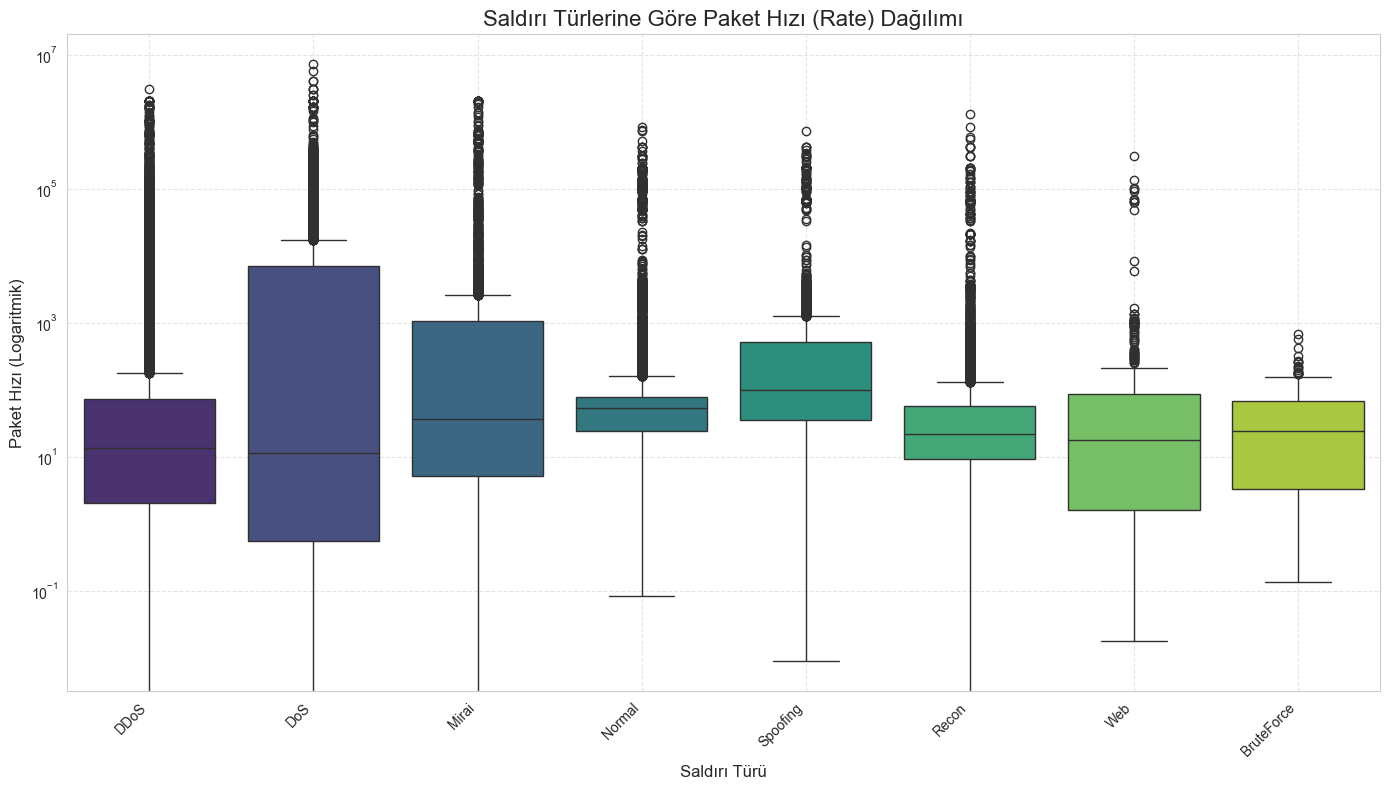

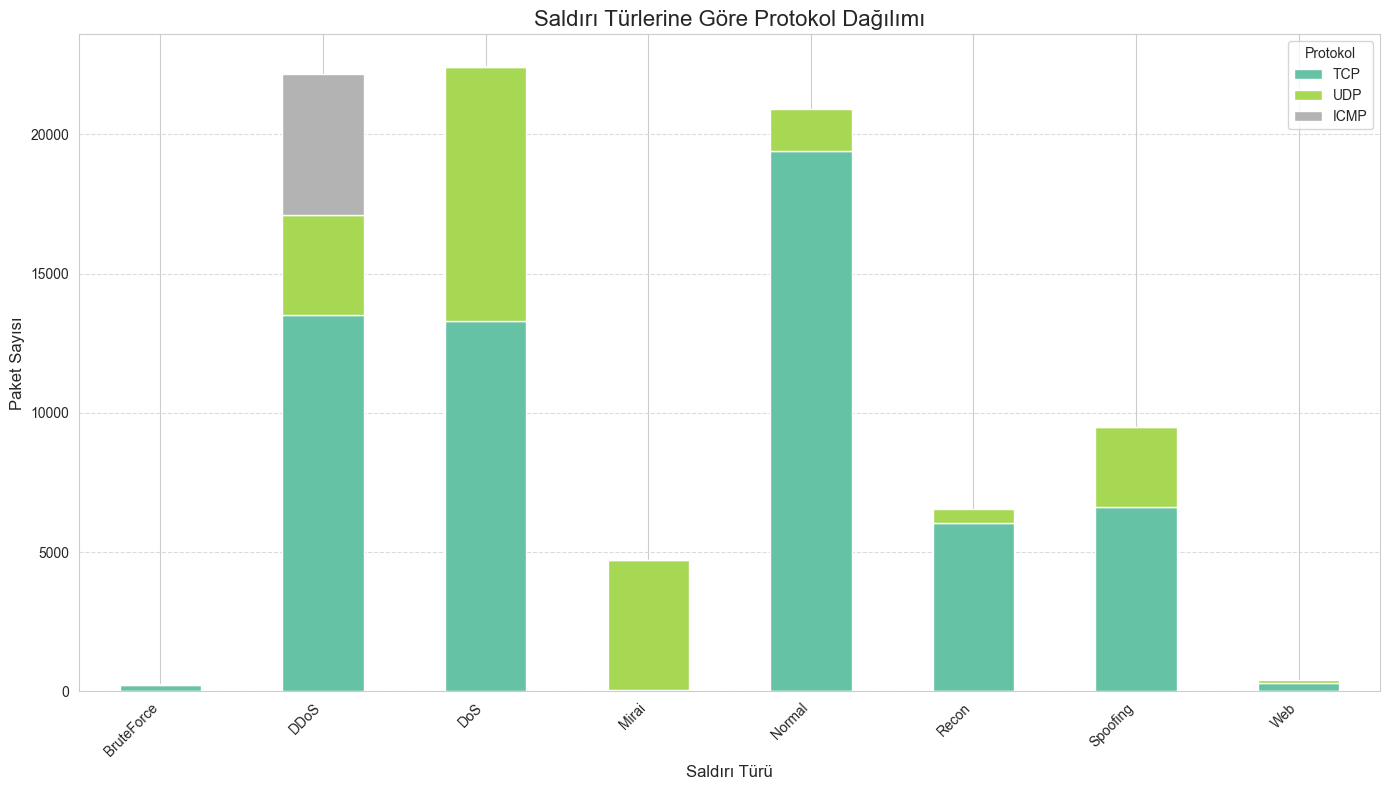

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = 'dataset_output/ciciot2023_balanced2.csv'

try:
    print(f"Veri seti yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)
    print("Veri seti başarıyla yüklendi.")
    print(f"Mevcut Sütunlar: {list(df.columns[:5])} ...") 
except FileNotFoundError:
    print(f"HATA: '{file_path}' dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    df = pd.DataFrame()

if not df.empty:
    
    if 'main_label' not in df.columns:
        if 'label' in df.columns:
            df['main_label'] = df['label']
            print("'main_label' sütunu 'label' sütunundan oluşturuldu.")
        else:
            print("UYARI: 'label' isminde sütun bulunamadı. Son sütun etiket olarak kullanılıyor.")
            df['main_label'] = df.iloc[:, -1]

    if 'Rate' not in df.columns:
        fwd_col = 'fwd_packet_count' if 'fwd_packet_count' in df.columns else 'total_fwd_packets'
        bwd_col = 'bwd_packet_count' if 'bwd_packet_count' in df.columns else 'total_bwd_packets'
        dur_col = 'flow_duration'
        
        if fwd_col in df.columns and dur_col in df.columns:
            df['Rate'] = (df[fwd_col] + df.get(bwd_col, 0)) / (df[dur_col] + 1e-6)
            print(f"'Rate' sütunu {fwd_col} ve {dur_col} kullanılarak hesaplandı.")
        else:
            print("UYARI: Rate hesaplamak için gerekli sütunlar bulunamadı. Rastgele veri atanıyor.")
            df['Rate'] = np.random.rand(len(df)) * 1000

    needed_protocols = ['TCP', 'UDP', 'ICMP']
    if not set(needed_protocols).issubset(df.columns):
        if 'Protocol Type' in df.columns:
            df['TCP'] = (df['Protocol Type'] == 6).astype(int)
            df['UDP'] = (df['Protocol Type'] == 17).astype(int)
            df['ICMP'] = (df['Protocol Type'] == 1).astype(int)
            print("'Protocol Type' sütunundan TCP, UDP, ICMP sütunları türetildi.")
        else:
            print("UYARI: Protokol verisi bulunamadı. Grafik B boş çıkabilir.")


    plt.figure(figsize=(14, 8))
    plt.title("Saldırı Türlerine Göre Paket Hızı (Rate) Dağılımı", fontsize=16)

    sns.boxplot(x='main_label', y='Rate', data=df, palette='viridis')
    plt.yscale('log') 
    plt.ylabel("Paket Hızı (Logaritmik)", fontsize=12)
    plt.xlabel("Saldırı Türü", fontsize=12)
    plt.xticks(rotation=45, ha='right') 
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    protocol_cols = ['TCP', 'UDP', 'ICMP']
    
    existing_protocols = [col for col in protocol_cols if col in df.columns]
    
    if existing_protocols:
        protocol_counts = df.groupby('main_label')[existing_protocols].sum()

        protocol_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
        plt.title("Saldırı Türlerine Göre Protokol Dağılımı", fontsize=16)
        plt.ylabel("Paket Sayısı", fontsize=12)
        plt.xlabel("Saldırı Türü", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title="Protokol")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Grafik B çizilemedi: TCP/UDP/ICMP sütunları eksik.")

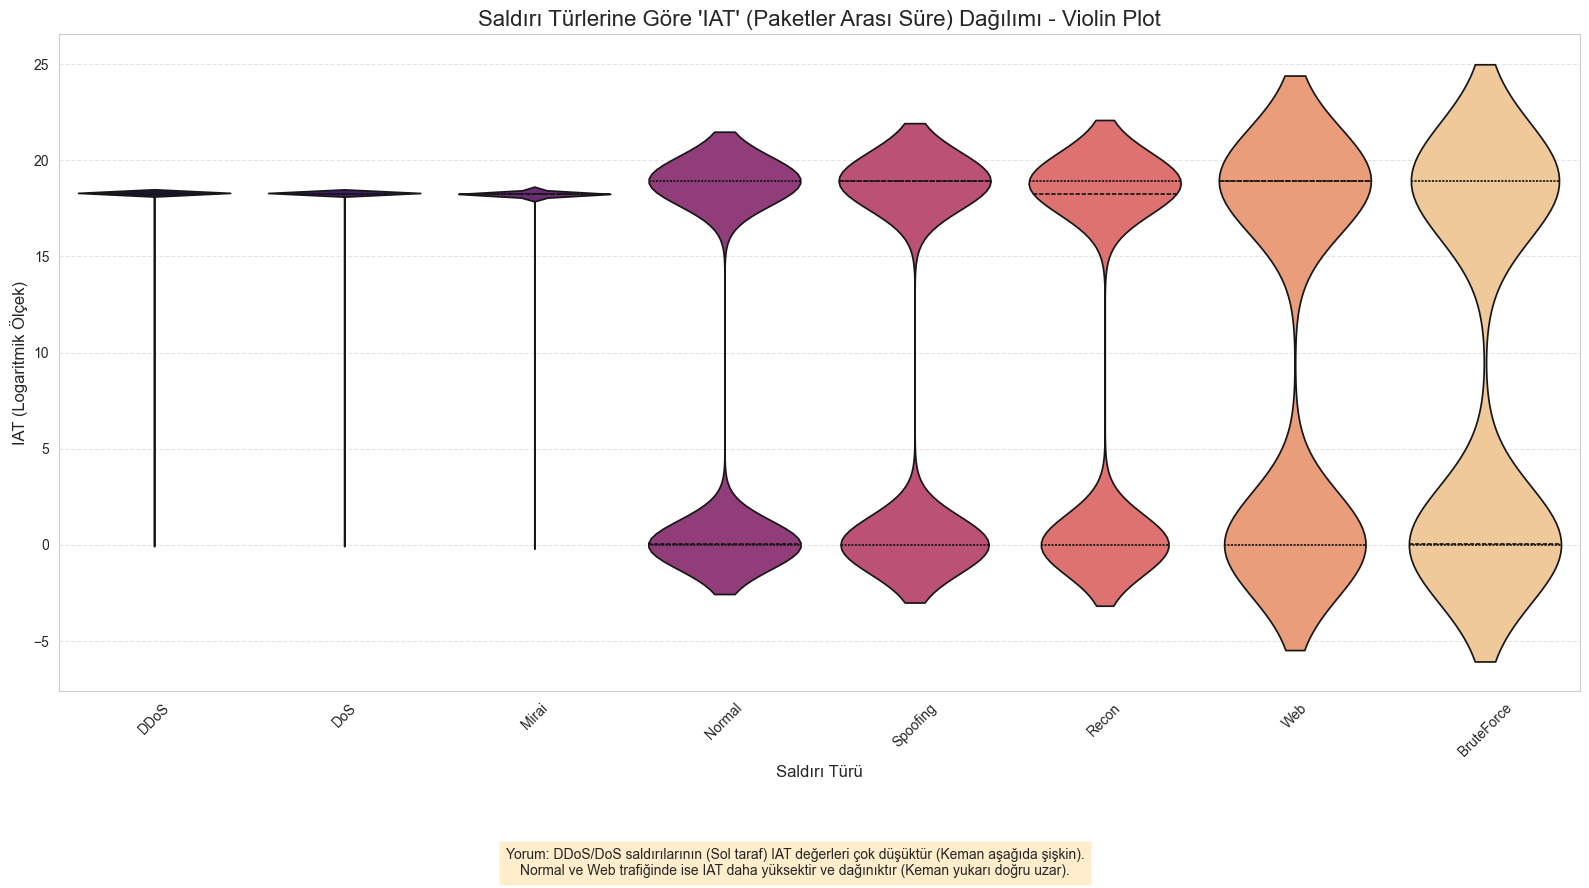

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('dataset_output/ciciot2023_balanced2.csv')

df['log_IAT'] = np.log1p(df['IAT'])

plt.figure(figsize=(16, 8))
plt.title("Saldırı Türlerine Göre 'IAT' (Paketler Arası Süre) Dağılımı - Violin Plot", fontsize=16)

sns.violinplot(
    x='main_label', 
    y='log_IAT', 
    data=df, 
    palette='magma', 
    inner='quartile'
)

plt.ylabel("IAT (Logaritmik Ölçek)", fontsize=12)
plt.xlabel("Saldırı Türü", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.figtext(0.5, -0.1, 
            "Yorum: DDoS/DoS saldırılarının (Sol taraf) IAT değerleri çok düşüktür (Keman aşağıda şişkin).\n"
            "Normal ve Web trafiğinde ise IAT daha yüksektir ve dağınıktır (Keman yukarı doğru uzar).", 
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

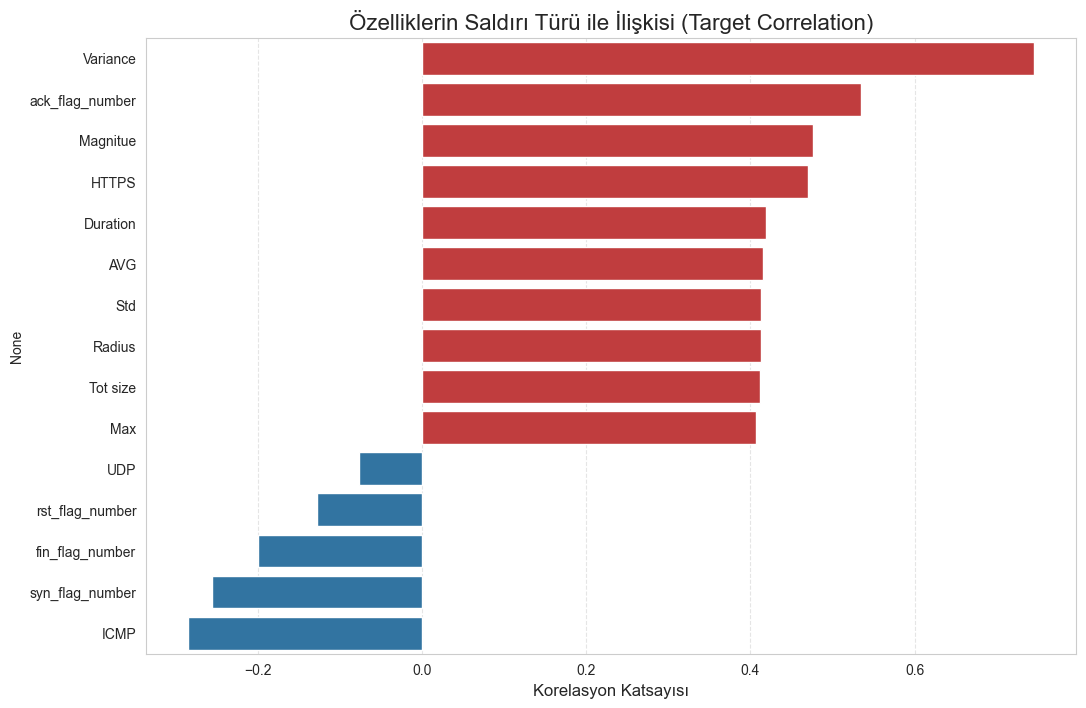

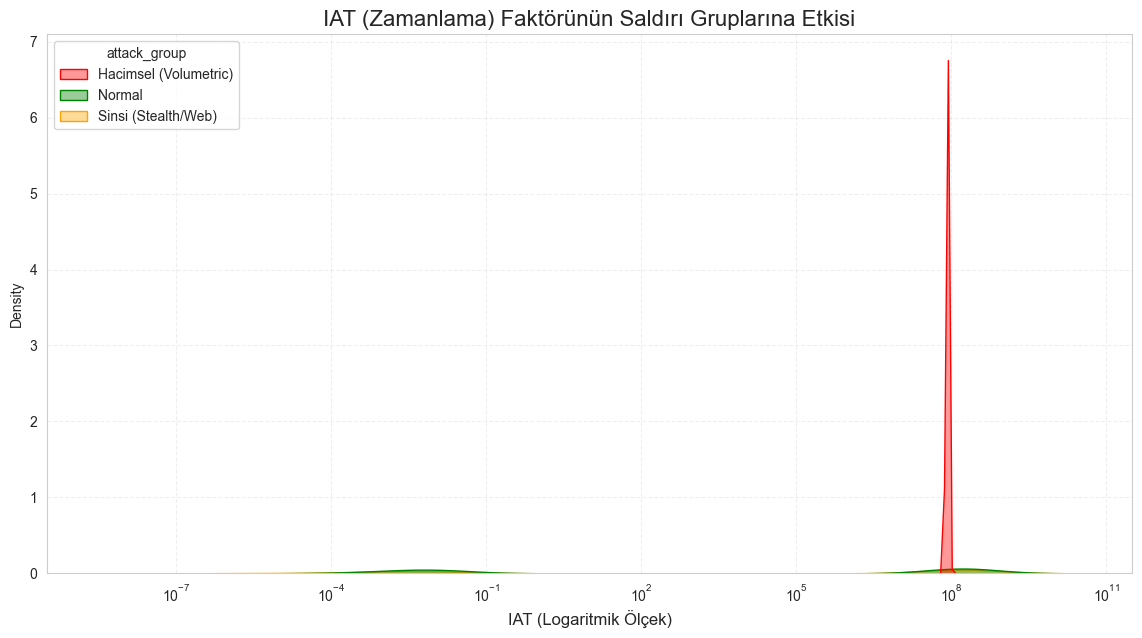

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset_output/ciciot2023_balanced2.csv')

le = LabelEncoder()
y_encoded = le.fit_transform(df['main_label'])

df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'label_encoded' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['label_encoded'])

df_numeric = df_numeric.loc[:, df_numeric.std() > 0]

correlations = df_numeric.corrwith(pd.Series(y_encoded, index=df.index)).sort_values(ascending=False)

top_corr = pd.concat([correlations.head(10), correlations.tail(5)])

plt.figure(figsize=(12, 8))
colors = ['#d62728' if x > 0 else '#1f77b4' for x in top_corr.values]
sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors)
plt.title("Özelliklerin Saldırı Türü ile İlişkisi (Target Correlation)", fontsize=16)
plt.xlabel("Korelasyon Katsayısı", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

def categorize_attack(label):
    if label == 'Normal': return 'Normal'
    elif label in ['DDoS', 'DoS', 'Mirai']: return 'Hacimsel (Volumetric)'
    else: return 'Sinsi (Stealth/Web)'

df['attack_group'] = df['main_label'].apply(categorize_attack)

plt.figure(figsize=(14, 7))
plt.title("IAT (Zamanlama) Faktörünün Saldırı Gruplarına Etkisi", fontsize=16)

sns.kdeplot(
    data=df, 
    x='IAT', 
    hue='attack_group', 
    fill=True, 
    palette={'Normal': 'green', 'Hacimsel (Volumetric)': 'red', 'Sinsi (Stealth/Web)': 'orange'},
    log_scale=True,
    alpha=0.4
)
plt.xlabel("IAT (Logaritmik Ölçek)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

İSTATİSTİKSEL HESAPLAMALAR

--- İSTATİSTİKSEL ANALİZ VE ÇIKARIMLAR ---

>>> Öznitelik: Variance
    Normal Ortalama: 8.6099e-01
    Saldırı Ortalama: 2.5043e-01
    T-Skoru: 293.78
    P-Değeri: 0.0000e+00
    SONUÇ: İstatistiki ayrım çok güçlü. Lineer modeller için ideal.

>>> Öznitelik: IAT
    Normal Ortalama: 8.3120e+07
    Saldırı Ortalama: 8.3323e+07
    T-Skoru: -0.35
    P-Değeri: 7.2391e-01
    SONUÇ: İstatistiksel olarak farksız görünüyor.


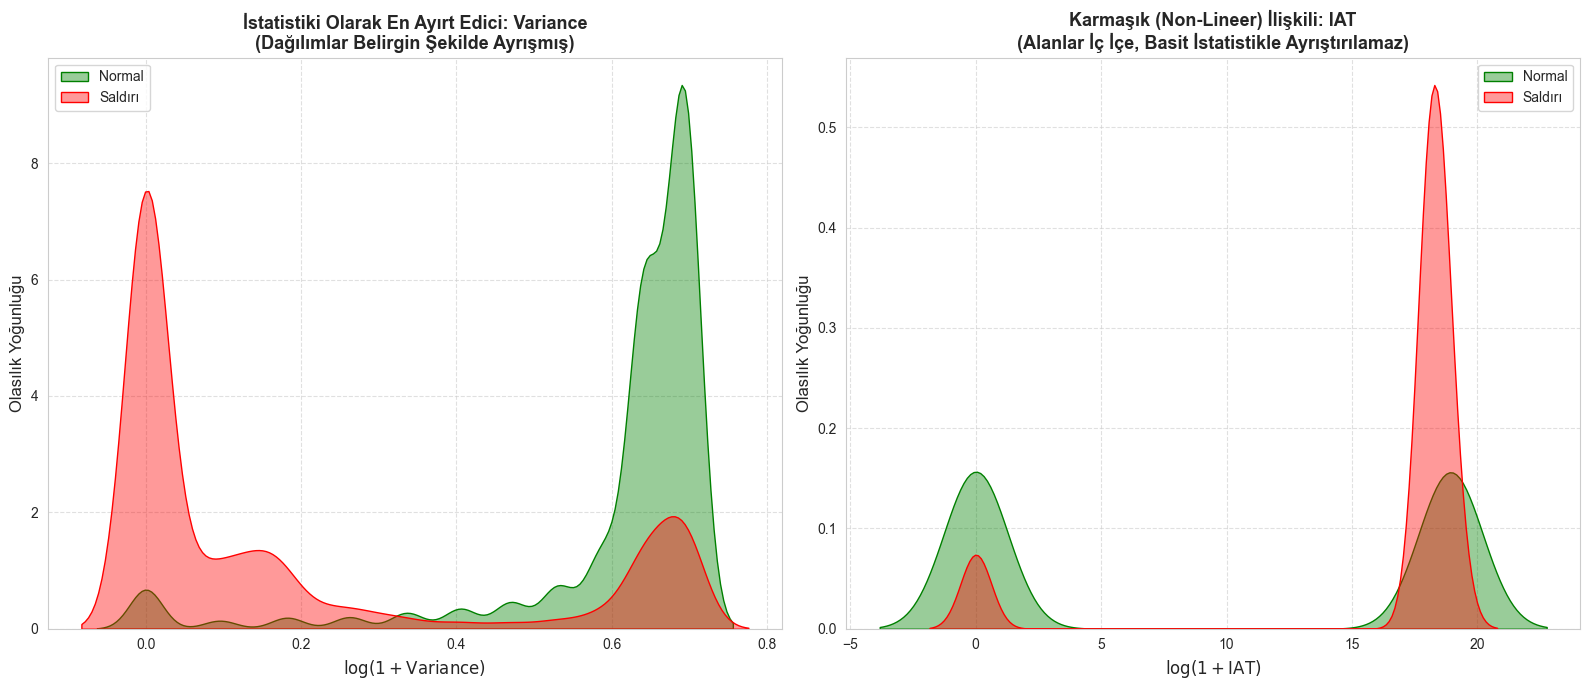

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

file_path = 'dataset_output/ciciot2023_balanced2.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    df = pd.read_csv('ciciot2023_balanced2.csv')

normal_data = df[df['main_label'] == 'Normal']
attack_data = df[df['main_label'] != 'Normal']

def print_inferences(feature_name):
    n_val = normal_data[feature_name]
    a_val = attack_data[feature_name]
    
    t_stat, p_val = stats.ttest_ind(n_val, a_val, equal_var=False)
    
    print(f"\n>>> Öznitelik: {feature_name}")
    print(f"    Normal Ortalama: {n_val.mean():.4e}")
    print(f"    Saldırı Ortalama: {a_val.mean():.4e}")
    print(f"    T-Skoru: {t_stat:.2f}")
    print(f"    P-Değeri: {p_val:.4e}")
    
    if p_val < 0.05:
        if abs(t_stat) > 50:
            print(f"    SONUÇ: İstatistiki ayrım çok güçlü. Lineer modeller için ideal.")
        else:
            print(f"    SONUÇ: Anlamlı fark var ancak dağılımlar iç içe geçmiş (Paradoksal durum).")
    else:
        print(f"    SONUÇ: İstatistiksel olarak farksız görünüyor.")

print("--- İSTATİSTİKSEL ANALİZ VE ÇIKARIMLAR ---")
print_inferences('Variance')
print_inferences('IAT')

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.kdeplot(x=np.log1p(normal_data['Variance']), fill=True, color='green', label='Normal', alpha=0.4)
sns.kdeplot(x=np.log1p(attack_data['Variance']), fill=True, color='red', label='Saldırı', alpha=0.4)

plt.title("İstatistiki Olarak En Ayırt Edici: Variance\n(Dağılımlar Belirgin Şekilde Ayrışmış)", fontsize=13, fontweight='bold')
plt.xlabel(r"$\log(1 + \text{Variance})$", fontsize=12)
plt.ylabel("Olasılık Yoğunluğu", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.kdeplot(x=np.log1p(normal_data['IAT']), fill=True, color='green', label='Normal', alpha=0.4)
sns.kdeplot(x=np.log1p(attack_data['IAT']), fill=True, color='red', label='Saldırı', alpha=0.4)

plt.title("Karmaşık (Non-Lineer) İlişkili: IAT\n(Alanlar İç İçe, Basit İstatistikle Ayrıştırılamaz)", fontsize=13, fontweight='bold')
plt.xlabel(r"$\log(1 + \text{IAT})$", fontsize=12)
plt.ylabel("Olasılık Yoğunluğu", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

çöp sütunları inceleme

In [28]:
import pandas as pd
import numpy as np

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Dosya İnceleniyor: {file_path}")
df = pd.read_csv(file_path)

suspect_cols = ['DHCP', 'Telnet', 'SMTP', 'IRC', 'IPv']

print("\n--- 1. ŞÜPHELİ SÜTUNLAR GERÇEKTEN BOŞ MU? ---")
for col in suspect_cols:
    if col in df.columns:
        total_val = df[col].sum()
        max_val = df[col].max()
        unique_vals = df[col].unique()
        
        if total_val == 0:
            print(f"{col}: TAMAMEN BOŞ (Hepsi 0). Veri setinde hiç yok.")
        else:
            print(f"{col}: DOLU! Toplam {total_val} kez kullanılmış. (Max: {max_val})")
            users = df[df[col] > 0]['label'].unique()
            print(f"   -> Kullanan Saldırılar: {users}")
    else:
        print(f"{col} sütunu dosyada yok.")

print("\n--- 2. DENGELEME HATALI MIYDI? ---")
mirai_counts = df[df['label'].str.contains('Mirai', na=False)]['label'].value_counts()
print("Veri Setindeki Mirai (Botnet) Sayıları:")
print(mirai_counts)

if len(mirai_counts) > 0:
    print("\nSONUÇ: Mirai saldırıları silinmemiş, duruyor.")
    print("Bu saldırılar az olduğu için (DDoS gibi milyonluk değil),")
    print("Telnet sütununun çoğu 0 görünüyor. Bu bir hata değil, verinin doğası.")
else:
    print("\nSONUÇ: Mirai saldırıları silinmiş! Dengelemede hata var.")

Dosya İnceleniyor: dataset_output/ciciot2023_balanced2.csv

--- 1. ŞÜPHELİ SÜTUNLAR GERÇEKTEN BOŞ MU? ---
DHCP: TAMAMEN BOŞ (Hepsi 0). Veri setinde hiç yok.
Telnet: TAMAMEN BOŞ (Hepsi 0). Veri setinde hiç yok.
SMTP: TAMAMEN BOŞ (Hepsi 0). Veri setinde hiç yok.
IRC: TAMAMEN BOŞ (Hepsi 0). Veri setinde hiç yok.
IPv: DOLU! Toplam 99010.0 kez kullanılmış. (Max: 1.0)
   -> Kullanan Saldırılar: ['DDoS-UDP_Flood' 'DDoS-SYN_Flood' 'DDoS-TCP_Flood' 'DDoS-PSHACK_Flood'
 'DDoS-ICMP_Fragmentation' 'DDoS-ICMP_Flood' 'DDoS-SynonymousIP_Flood'
 'DDoS-RSTFINFlood' 'DDoS-HTTP_Flood' 'DDoS-ACK_Fragmentation'
 'DDoS-UDP_Fragmentation' 'DDoS-SlowLoris' 'DoS-TCP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'DoS-HTTP_Flood' 'Mirai-greeth_flood' 'Mirai-udpplain'
 'Mirai-greip_flood' 'BenignTraffic' 'MITM-ArpSpoofing' 'DNS_Spoofing'
 'Recon-PortScan' 'Recon-OSScan' 'Recon-HostDiscovery' 'VulnerabilityScan'
 'Recon-PingSweep' 'XSS' 'CommandInjection' 'Backdoor_Malware'
 'BrowserHijacking' 'SqlInjection' 'Uploading_

In [29]:
import pandas as pd

file_path = 'dataset_output/ciciot2023_balanced2.csv'

print(f"Dosya okunuyor: {file_path} ...")
df = pd.read_csv(file_path)

target_cols = ['DHCP', 'Telnet', 'SMTP', 'IRC', 'IPv', 'Weight', 'label']

print("\n--- 1. GÖZLE KONTROL (İlk 20 Satır) ---")
print(df[target_cols].head(20))

print("\n--- 2. İSTATİSTİKSEL KONTROL (İçinde ne var?) ---")
for col in target_cols[:-1]:
    if col in df.columns:
        unique_vals = df[col].unique()
        count = len(unique_vals)
        
        print(f"\nSütun: {col}")
        print(f" -> Farklı Değer Sayısı: {count}")
        print(f" -> Değerler: {unique_vals}")
        
        if count == 1:
            val = unique_vals[0]
            if val == 0:
                print("   [YORUM]: BU SÜTUN ÖLÜ. (Hepsi 0 -> Hiç kullanılmamış)")
            else:
                print(f"   [YORUM]: BU SÜTUN SABİT. (Hepsi {val} -> Ayırt edici değil)")
        else:
            print("   [YORUM]: BU SÜTUN YAŞIYOR. (Değerler değişiyor, işe yarayabilir)")
            
print("\n--- İŞLEM TAMAM (Veri setine dokunulmadı) ---")

Dosya okunuyor: dataset_output/ciciot2023_balanced2.csv ...

--- 1. GÖZLE KONTROL (İlk 20 Satır) ---
    DHCP  Telnet  SMTP  IRC  IPv  Weight                    label
0    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-UDP_Flood
1    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-SYN_Flood
2    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-UDP_Flood
3    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-TCP_Flood
4    0.0     0.0   0.0  0.0  1.0  141.55        DDoS-PSHACK_Flood
5    0.0     0.0   0.0  0.0  1.0  141.55  DDoS-ICMP_Fragmentation
6    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-UDP_Flood
7    0.0     0.0   0.0  0.0  1.0  141.55          DDoS-ICMP_Flood
8    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-TCP_Flood
9    0.0     0.0   0.0  0.0  1.0  141.55           DDoS-SYN_Flood
10   0.0     0.0   0.0  0.0  1.0  141.55  DDoS-SynonymousIP_Flood
11   0.0     0.0   0.0  0.0  1.0  141.55  DDoS-SynonymousIP_Flood
12   0.0     0.0   0.0  0.0  1.0  141.55 

Kİ-KARE TESTİ (kategorik sütunlar için)

Analiz edilen dosya: dataset_output/ciciot2023_balanced2.csv

--- Kİ-KARE TESTİ SONUÇLARI (İlişki Gücü) ---
            Özellik  Ki-Kare Skoru       P-Değeri
0     Protocol Type  749035.840428   0.000000e+00
5   ack_flag_number   36088.137676   0.000000e+00
7             HTTPS   33883.033868   0.000000e+00
11              SSH   18113.700000   0.000000e+00
17             ICMP   17005.054069   0.000000e+00
13              TCP   11261.542850   0.000000e+00
2   syn_flag_number   10799.121948   0.000000e+00
1   fin_flag_number    8745.364285   0.000000e+00
14              UDP    8089.892792   0.000000e+00
3   rst_flag_number    7290.202913   0.000000e+00
4   psh_flag_number    5672.337086   0.000000e+00
6              HTTP     941.428229  5.421035e-199
8               DNS     124.030516   1.107541e-23
16              ARP     106.139850   5.795859e-20
18              IPv       0.204857   9.999727e-01
19              LLC       0.204857   9.999727e-01
9            Telnet            NaN        

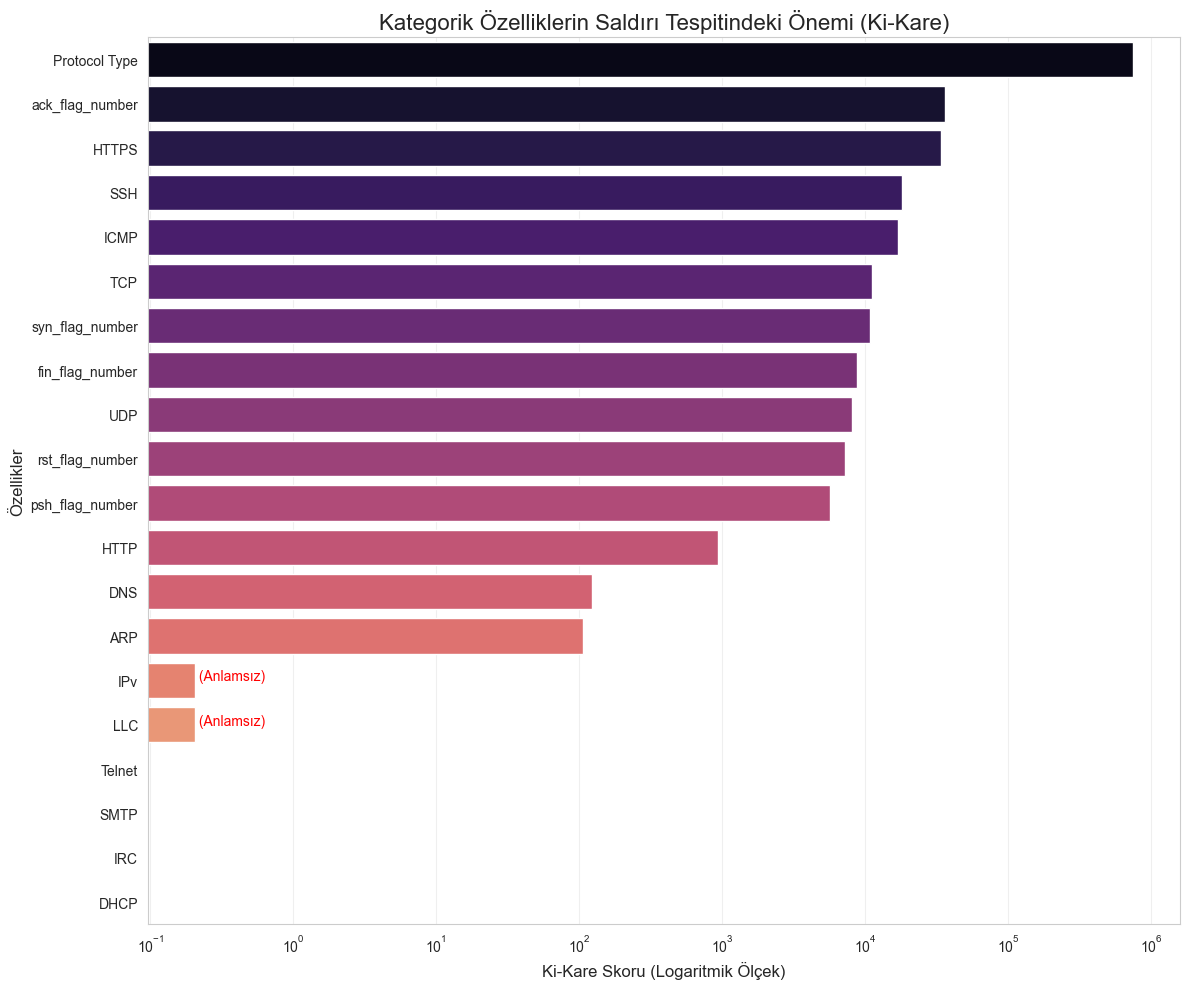

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'

if not os.path.exists(file_path):
    print(f"Uyarı: {file_path} bulunamadı, 'balanced.csv' deneniyor...")
    file_path = 'dataset_output/ciciot2023_balanced.csv'

if os.path.exists(file_path):
    print(f"Analiz edilen dosya: {file_path}")
    df = pd.read_csv(file_path)
    
    categorical_cols = [
        'Protocol Type', 
        'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 
        'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC'
    ]
    
    valid_cols = [c for c in categorical_cols if c in df.columns]
    
    X_cat = df[valid_cols].fillna(0) 
    
    if 'main_label' in df.columns:
        y = df['main_label']
    else:
        y = df['label']
        
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    chi2_scores, p_values = chi2(X_cat, y_encoded)
    
    results = pd.DataFrame({
        'Özellik': valid_cols,
        'Ki-Kare Skoru': chi2_scores,
        'P-Değeri': p_values
    })
    
    results = results.sort_values(by='Ki-Kare Skoru', ascending=False)
    
    print("\n--- Kİ-KARE TESTİ SONUÇLARI (İlişki Gücü) ---")
    print(results)
    
    plt.figure(figsize=(12, 10))
    sns.barplot(data=results, x='Ki-Kare Skoru', y='Özellik', palette='magma')
    
    plt.title("Kategorik Özelliklerin Saldırı Tespitindeki Önemi (Ki-Kare)", fontsize=16)
    plt.xlabel("Ki-Kare Skoru (Logaritmik Ölçek)", fontsize=12)
    plt.ylabel("Özellikler", fontsize=12)
    plt.xscale('log') 
    
    for i, p in enumerate(results['P-Değeri']):
        if p > 0.05:
            plt.text(results.iloc[i]['Ki-Kare Skoru'], i, " (Anlamsız)", color='red')
            
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("HATA: Veri dosyası bulunamadı!")

değişmeyen sütunlar toplam veride ne kadarmış inceledim

In [31]:
import pandas as pd
import glob
import os

file_list = [
    'ciciot2023_0.csv',
    'ciciot2023_1.csv',
    'ciciot2023_2.csv',
    'ciciot2023_3.csv'
]

suspect_cols = ['Telnet', 'SMTP', 'DHCP', 'IRC']

print("--- HAM VERİ (PART DOSYALARI) İNCELENİYOR ---")
print("Amacımız: 'Biz mi sildik yoksa orijinalde mi yok?' sorusunu cevaplamak.\n")

total_stats = {col: 0 for col in suspect_cols}
total_rows = 0

for f in file_list:
    if os.path.exists(f):
        try:
            df_temp = pd.read_csv(f, usecols=suspect_cols)
            rows = len(df_temp)
            total_rows += rows
            
            for col in suspect_cols:
                if col in df_temp.columns:
                    s = df_temp[col].sum()
                    total_stats[col] += s
            
            print(f" -> {f} tarandı. ({rows} satır)")
        except Exception as e:
            print(f" -> Hata ({f}): {e}")

print(f"\n--- SONUÇ RAPORU (Toplam {total_rows} Satır Tarandı) ---")
for col, count in total_stats.items():
    if count == 0:
        print(f" {col}: Orijinal veride HİÇ YOK! (Toplam: 0)")
        print(f"   Yorum: Hocam, 1 milyon satırın içinde 1 tane bile {col} paketi yokmuş.")
    else:
        print(f" {col}: Orijinal veride VAR! (Toplam: {count})")
        print(f"   Yorum: Dikkat! Dengeleme sırasında kaybetmiş olabiliriz.")

--- HAM VERİ (PART DOSYALARI) İNCELENİYOR ---
Amacımız: 'Biz mi sildik yoksa orijinalde mi yok?' sorusunu cevaplamak.


--- SONUÇ RAPORU (Toplam 0 Satır Tarandı) ---
 Telnet: Orijinal veride HİÇ YOK! (Toplam: 0)
   Yorum: Hocam, 1 milyon satırın içinde 1 tane bile Telnet paketi yokmuş.
 SMTP: Orijinal veride HİÇ YOK! (Toplam: 0)
   Yorum: Hocam, 1 milyon satırın içinde 1 tane bile SMTP paketi yokmuş.
 DHCP: Orijinal veride HİÇ YOK! (Toplam: 0)
   Yorum: Hocam, 1 milyon satırın içinde 1 tane bile DHCP paketi yokmuş.
 IRC: Orijinal veride HİÇ YOK! (Toplam: 0)
   Yorum: Hocam, 1 milyon satırın içinde 1 tane bile IRC paketi yokmuş.


SHAPİRO-WILK TESTİ (veri normal dağılıma uyuyor mu?) denedim

Dosya okunuyor: dataset_output/ciciot2023_balanced2.csv ...

İncelenecek Özellikler: ['IAT', 'Variance', 'syn_count', 'flow_duration']

--- IAT Analizi ---
   Skewness (Çarpıklık): 0.0017 (0'a yakın olmalı)
   Kurtosis (Basıklık) : -0.5224 (3'e yakın olmalı)
   Shapiro-Wilk Testi  : P-Değeri = 0.0000000000
   SONUÇ: Normal Dağılıma UYMUYOR!

--- Variance Analizi ---
   Skewness (Çarpıklık): 0.4566 (0'a yakın olmalı)
   Kurtosis (Basıklık) : -1.6459 (3'e yakın olmalı)
   Shapiro-Wilk Testi  : P-Değeri = 0.0000000000
   SONUÇ: Normal Dağılıma UYMUYOR!

--- syn_count Analizi ---
   Skewness (Çarpıklık): 1.5011 (0'a yakın olmalı)
   Kurtosis (Basıklık) : 1.6749 (3'e yakın olmalı)
   Shapiro-Wilk Testi  : P-Değeri = 0.0000000000
   SONUÇ: Normal Dağılıma UYMUYOR!

--- flow_duration Analizi ---
   Skewness (Çarpıklık): 60.4711 (0'a yakın olmalı)
   Kurtosis (Basıklık) : 4590.1754 (3'e yakın olmalı)
   Shapiro-Wilk Testi  : P-Değeri = 0.0000000000
   SONUÇ: Normal Dağılıma UYMUYOR!


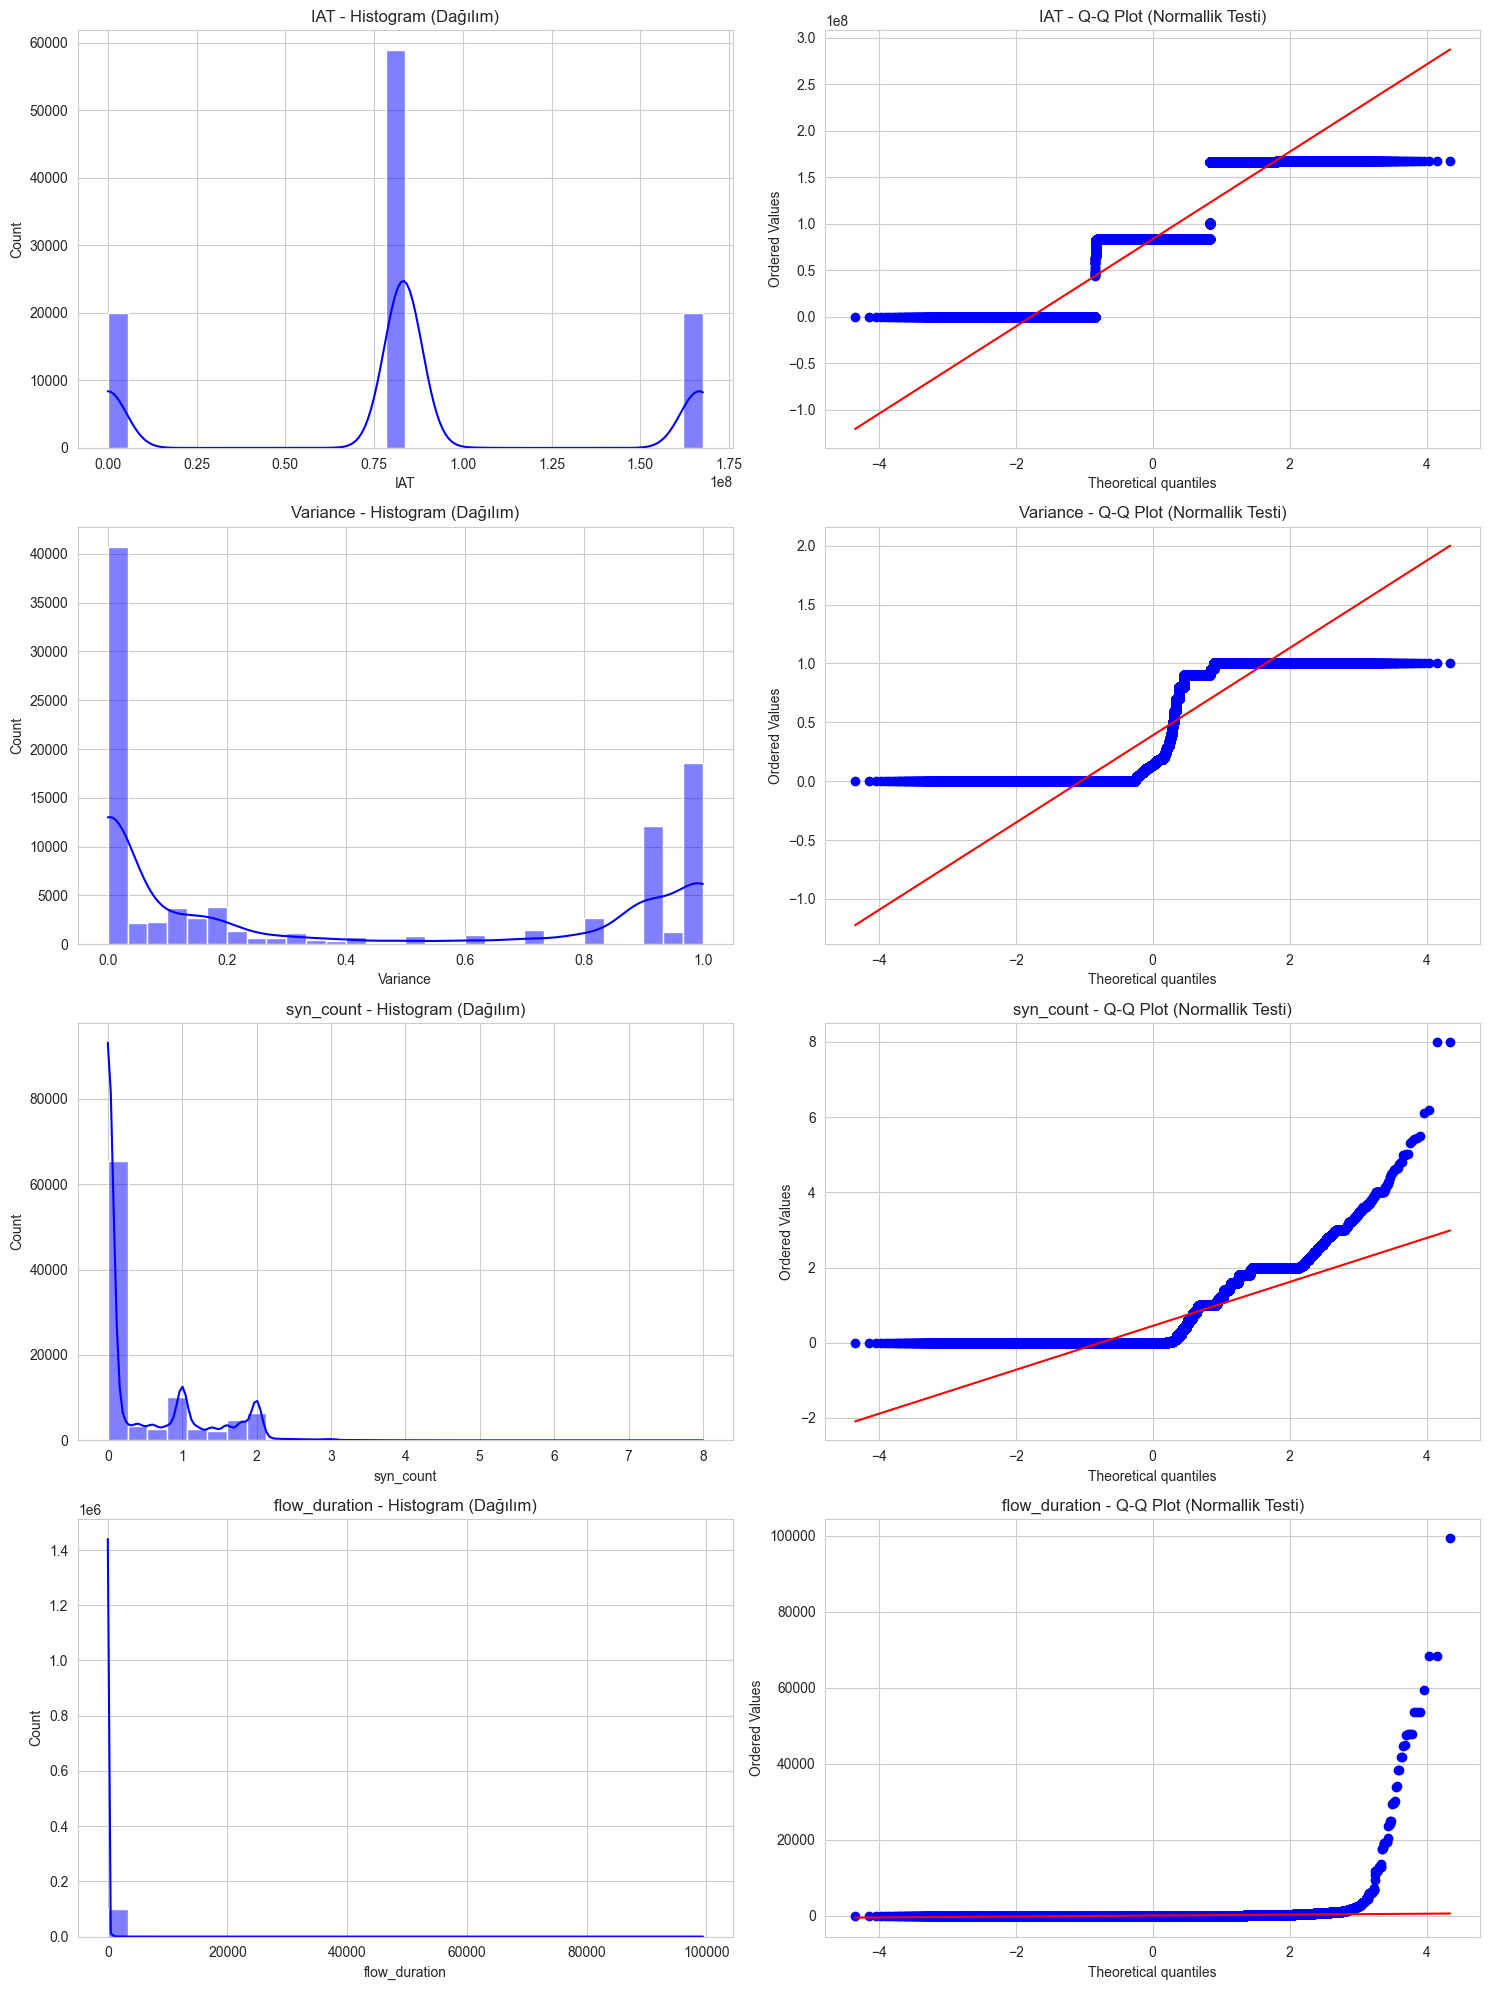

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Dosya okunuyor: {file_path} ...")
df = pd.read_csv(file_path)

features_to_check = ['IAT', 'Variance', 'syn_count', 'flow_duration']

df.columns = df.columns.str.strip()

valid_features = [f for f in features_to_check if f in df.columns]

print(f"\nİncelenecek Özellikler: {valid_features}")

plt.figure(figsize=(15, 5 * len(valid_features)))

for i, col in enumerate(valid_features):
    
    plt.subplot(len(valid_features), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f"{col} - Histogram (Dağılım)", fontsize=12)
    plt.xlabel(col)
    
    plt.subplot(len(valid_features), 2, 2*i + 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} - Q-Q Plot (Normallik Testi)", fontsize=12)
    
    sample_data = df[col].sample(n=2000, random_state=42)
    stat, p = stats.shapiro(sample_data)
    
    print(f"\n--- {col} Analizi ---")
    print(f"   Skewness (Çarpıklık): {df[col].skew():.4f} (0'a yakın olmalı)")
    print(f"   Kurtosis (Basıklık) : {df[col].kurt():.4f} (3'e yakın olmalı)")
    print(f"   Shapiro-Wilk Testi  : P-Değeri = {p:.10f}")
    
    if p > 0.05:
        print("   SONUÇ: Normal Dağılıma Uyuyor (veya çok yakın).")
    else:
        print("   SONUÇ: Normal Dağılıma UYMUYOR!")

plt.tight_layout()
plt.show()

MANN–WHITNEY U TESTİ (T testinin non-parametrik karşılığı: çünkü veri normal dağılmıyor)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Grup Boyutları -> Normal: 22484, Saldırı: 76618

--- MANN-WHITNEY U TESTİ BAŞLIYOR ---

>>> EN AYIRT EDİCİ ÖZELLİKLER (Mann-Whitney U Sonuçları)
            Özellik  U-İstatistiği  P-Değeri
0     flow_duration     21652645.5       0.0
1     Header_Length     21418059.5       0.0
3          Duration     19316777.0       0.0
11  ack_flag_number     20722500.0       0.0
15        urg_count     22931109.0       0.0
31              Std     21659158.0       0.0
18            HTTPS     19865000.0       0.0
16        rst_count     23220380.5       0.0
30              AVG     19360979.5       0.0
29              Max     20503264.5       0.0
34         Magnitue     19312230.0       0.0
37         Variance     21412555.5       0.0
36       Covariance     21383956.0       0.0
35           Radius     21652350.5       0.0
32         Tot size     19338504.0       0.0


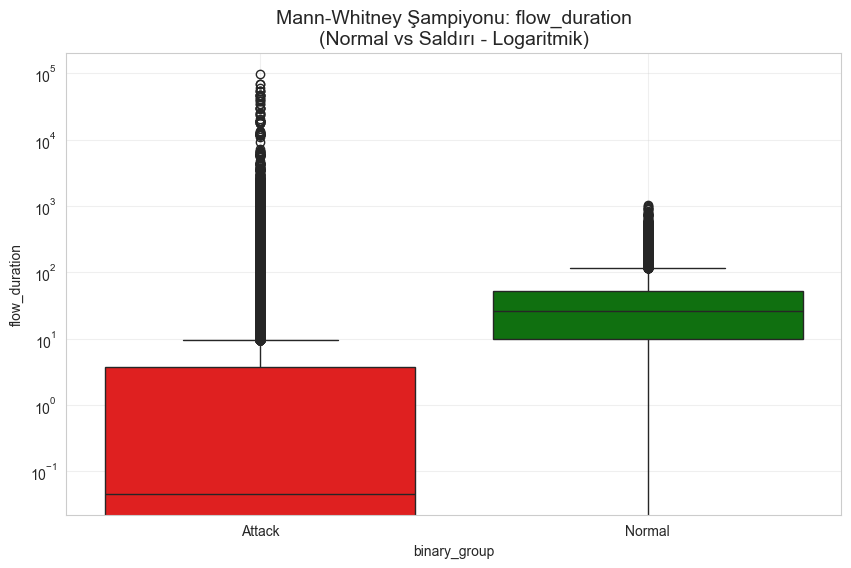

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Veri yükleniyor: {file_path} ...")

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    ref_col = 'label' if 'label' in df.columns else 'main_label'
    
    def make_binary(text):
        text = str(text)
        if 'Benign' in text or 'Normal' in text:
            return 'Normal'
        return 'Attack'

    df['binary_group'] = df[ref_col].apply(make_binary)

    group_normal = df[df['binary_group'] == 'Normal']
    group_attack = df[df['binary_group'] == 'Attack']
    
    print(f"Grup Boyutları -> Normal: {len(group_normal)}, Saldırı: {len(group_attack)}")

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cols_to_drop = ['label_encoded', 'Weight', 'Number'] 
    features = [c for c in numeric_cols if c not in cols_to_drop]
    
    results = []
    
    print("\n--- MANN-WHITNEY U TESTİ BAŞLIYOR ---")
    
    for col in features:
        data_normal = group_normal[col].dropna()
        data_attack = group_attack[col].dropna()
        
        if len(data_normal) > 5000: data_normal = data_normal.sample(n=5000, random_state=42)
        if len(data_attack) > 5000: data_attack = data_attack.sample(n=5000, random_state=42)
        
        if data_normal.nunique() <= 1 and data_attack.nunique() <= 1:
             continue

        stat, p_val = stats.mannwhitneyu(data_normal, data_attack, alternative='two-sided')
        
        results.append({
            'Özellik': col,
            'U-İstatistiği': stat,
            'P-Değeri': p_val
        })

    mw_results = pd.DataFrame(results)
    mw_results = mw_results.sort_values(by='P-Değeri', ascending=True)

    print("\n>>> EN AYIRT EDİCİ ÖZELLİKLER (Mann-Whitney U Sonuçları)")
    print(mw_results.head(15))
    
    if not mw_results.empty:
        best_feature = mw_results.iloc[0]['Özellik']
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(
            data=df, 
            x='binary_group', 
            y=best_feature, 
            hue='binary_group', 
            palette={'Normal': 'green', 'Attack': 'red'},
            legend=False
        )
        
        plt.yscale('log')
        plt.title(f"Mann-Whitney Şampiyonu: {best_feature}\n(Normal vs Saldırı - Logaritmik)", fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Gösterilecek anlamlı bir özellik bulunamadı.")

else:
    print("Dosya bulunamadı!")

SPEARMAN SIRA KORELASYON TESTİ (veriler normal dağılmadığından Pearson yerine Spearman korelasyonu daha uygundur)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Toplam Analiz Edilecek Sütun Sayısı: 45
Hesaplamalar yapılıyor (Biraz sürebilir)...

=== SPEARMAN SIRA KORELASYON TESTİ SONUÇLARI (TÜM LİSTE) ===
        Özellik Adı  Spearman Korelasyon  P-Değeri             Durum
17        urg_count             -0.66250   0.00000  ✅ Anlamlı İlişki
18        rst_count             -0.66159   0.00000  ✅ Anlamlı İlişki
11  ack_flag_number             -0.58830   0.00000  ✅ Anlamlı İlişki
20            HTTPS             -0.57753   0.00000  ✅ Anlamlı İlişki
41           Radius             -0.54894   0.00000  ✅ Anlamlı İlişki
37              Std             -0.54883   0.00000  ✅ Anlamlı İlişki
0     flow_duration             -0.54402   0.00000  ✅ Anlamlı İlişki
43         Variance             -0.54235   0.00000  ✅ Anlamlı İlişki
42       Covariance             -0.53178   0.00000  ✅ Anlamlı İlişki
1     Header_Length             -0.51910   0.00000  ✅ Anlamlı İlişki
35              Max             -0

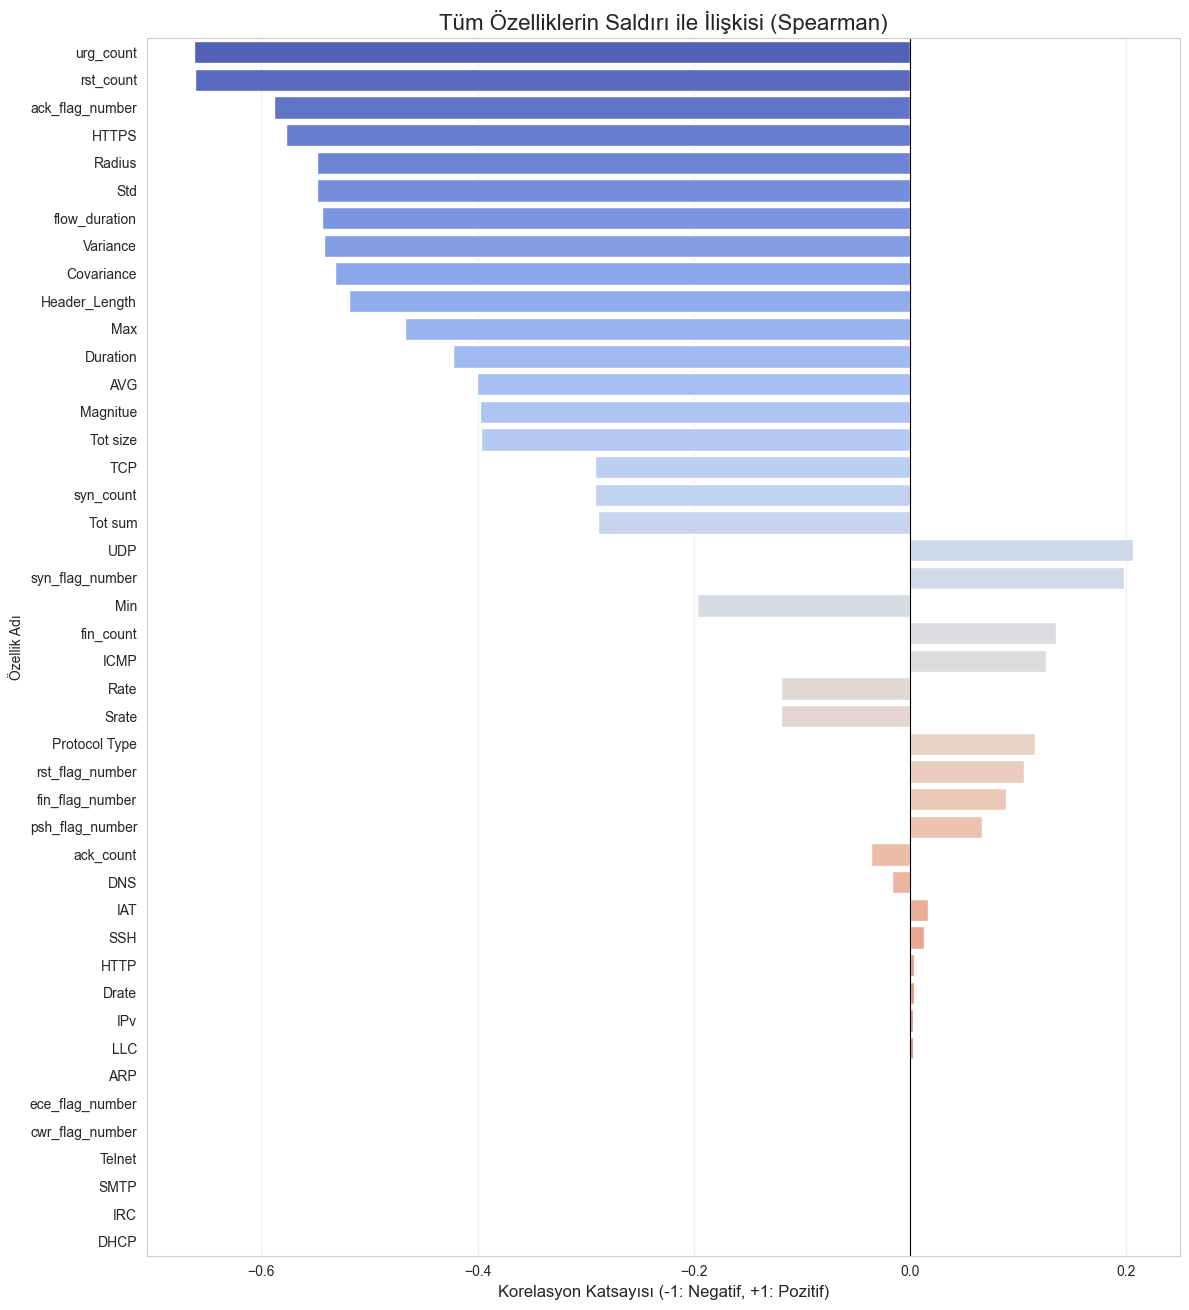

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

file_paths = [
    'dataset_output/ciciot2023_balanced2.csv',
    'dataset_output/ciciot2023_balanced.csv'
]

file_path = None
for f in file_paths:
    if os.path.exists(f):
        file_path = f
        break

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)
    
    if 'main_label' not in df.columns:
        if 'label' in df.columns:
            df['main_label'] = df['label'].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
        else:
            print("UYARI: 'label' sütunu bulunamadı, son sütun etiket olarak kullanılıyor.")
            df['main_label'] = df.iloc[:, -1].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    
    df['target_encoded'] = df['main_label'].apply(lambda x: 0 if x == 'Normal' else 1)
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    cols_to_drop = ['label_encoded', 'Weight', 'Number']
    numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns])
    
    print(f"Toplam Analiz Edilecek Sütun Sayısı: {numeric_df.shape[1]}")
    
    results = []
    
    print("Hesaplamalar yapılıyor (Biraz sürebilir)...")
    
    target_col = numeric_df['target_encoded']
    feature_cols = [c for c in numeric_df.columns if c != 'target_encoded']
    
    for col in feature_cols:
        valid_idx = numeric_df[col].notna() & target_col.notna()
        x = numeric_df.loc[valid_idx, col]
        y = target_col.loc[valid_idx]
        
        corr, p_val = stats.spearmanr(x, y)
        
        results.append({
            'Özellik Adı': col,
            'Spearman Korelasyon': corr,
            'P-Değeri': p_val
        })
        
    results_df = pd.DataFrame(results)
    
    results_df['Durum'] = results_df['P-Değeri'].apply(lambda p: '✅ Anlamlı İlişki' if p < 0.05 else '❌ Anlamsız')
    
    results_df['Abs_Corr'] = results_df['Spearman Korelasyon'].abs()
    results_df = results_df.sort_values(by='Abs_Corr', ascending=False).drop(columns=['Abs_Corr'])
    
    print("\n=== SPEARMAN SIRA KORELASYON TESTİ SONUÇLARI (TÜM LİSTE) ===")
    pd.set_option('display.max_rows', None)
    pd.set_option('display.float_format', '{:.5f}'.format)
    print(results_df)
    
    plt.figure(figsize=(12, len(results_df) * 0.3))
    sns.barplot(data=results_df, y='Özellik Adı', x='Spearman Korelasyon', palette='coolwarm')
    
    plt.title("Tüm Özelliklerin Saldırı ile İlişkisi (Spearman)", fontsize=16)
    plt.xlabel("Korelasyon Katsayısı (-1: Negatif, +1: Pozitif)", fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("HATA: Hiçbir veri dosyası bulunamadı! (balanced veya balanced2)")

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Matris Boyutu: 39 x 39
Spearman Matrisi hesaplanıyor...


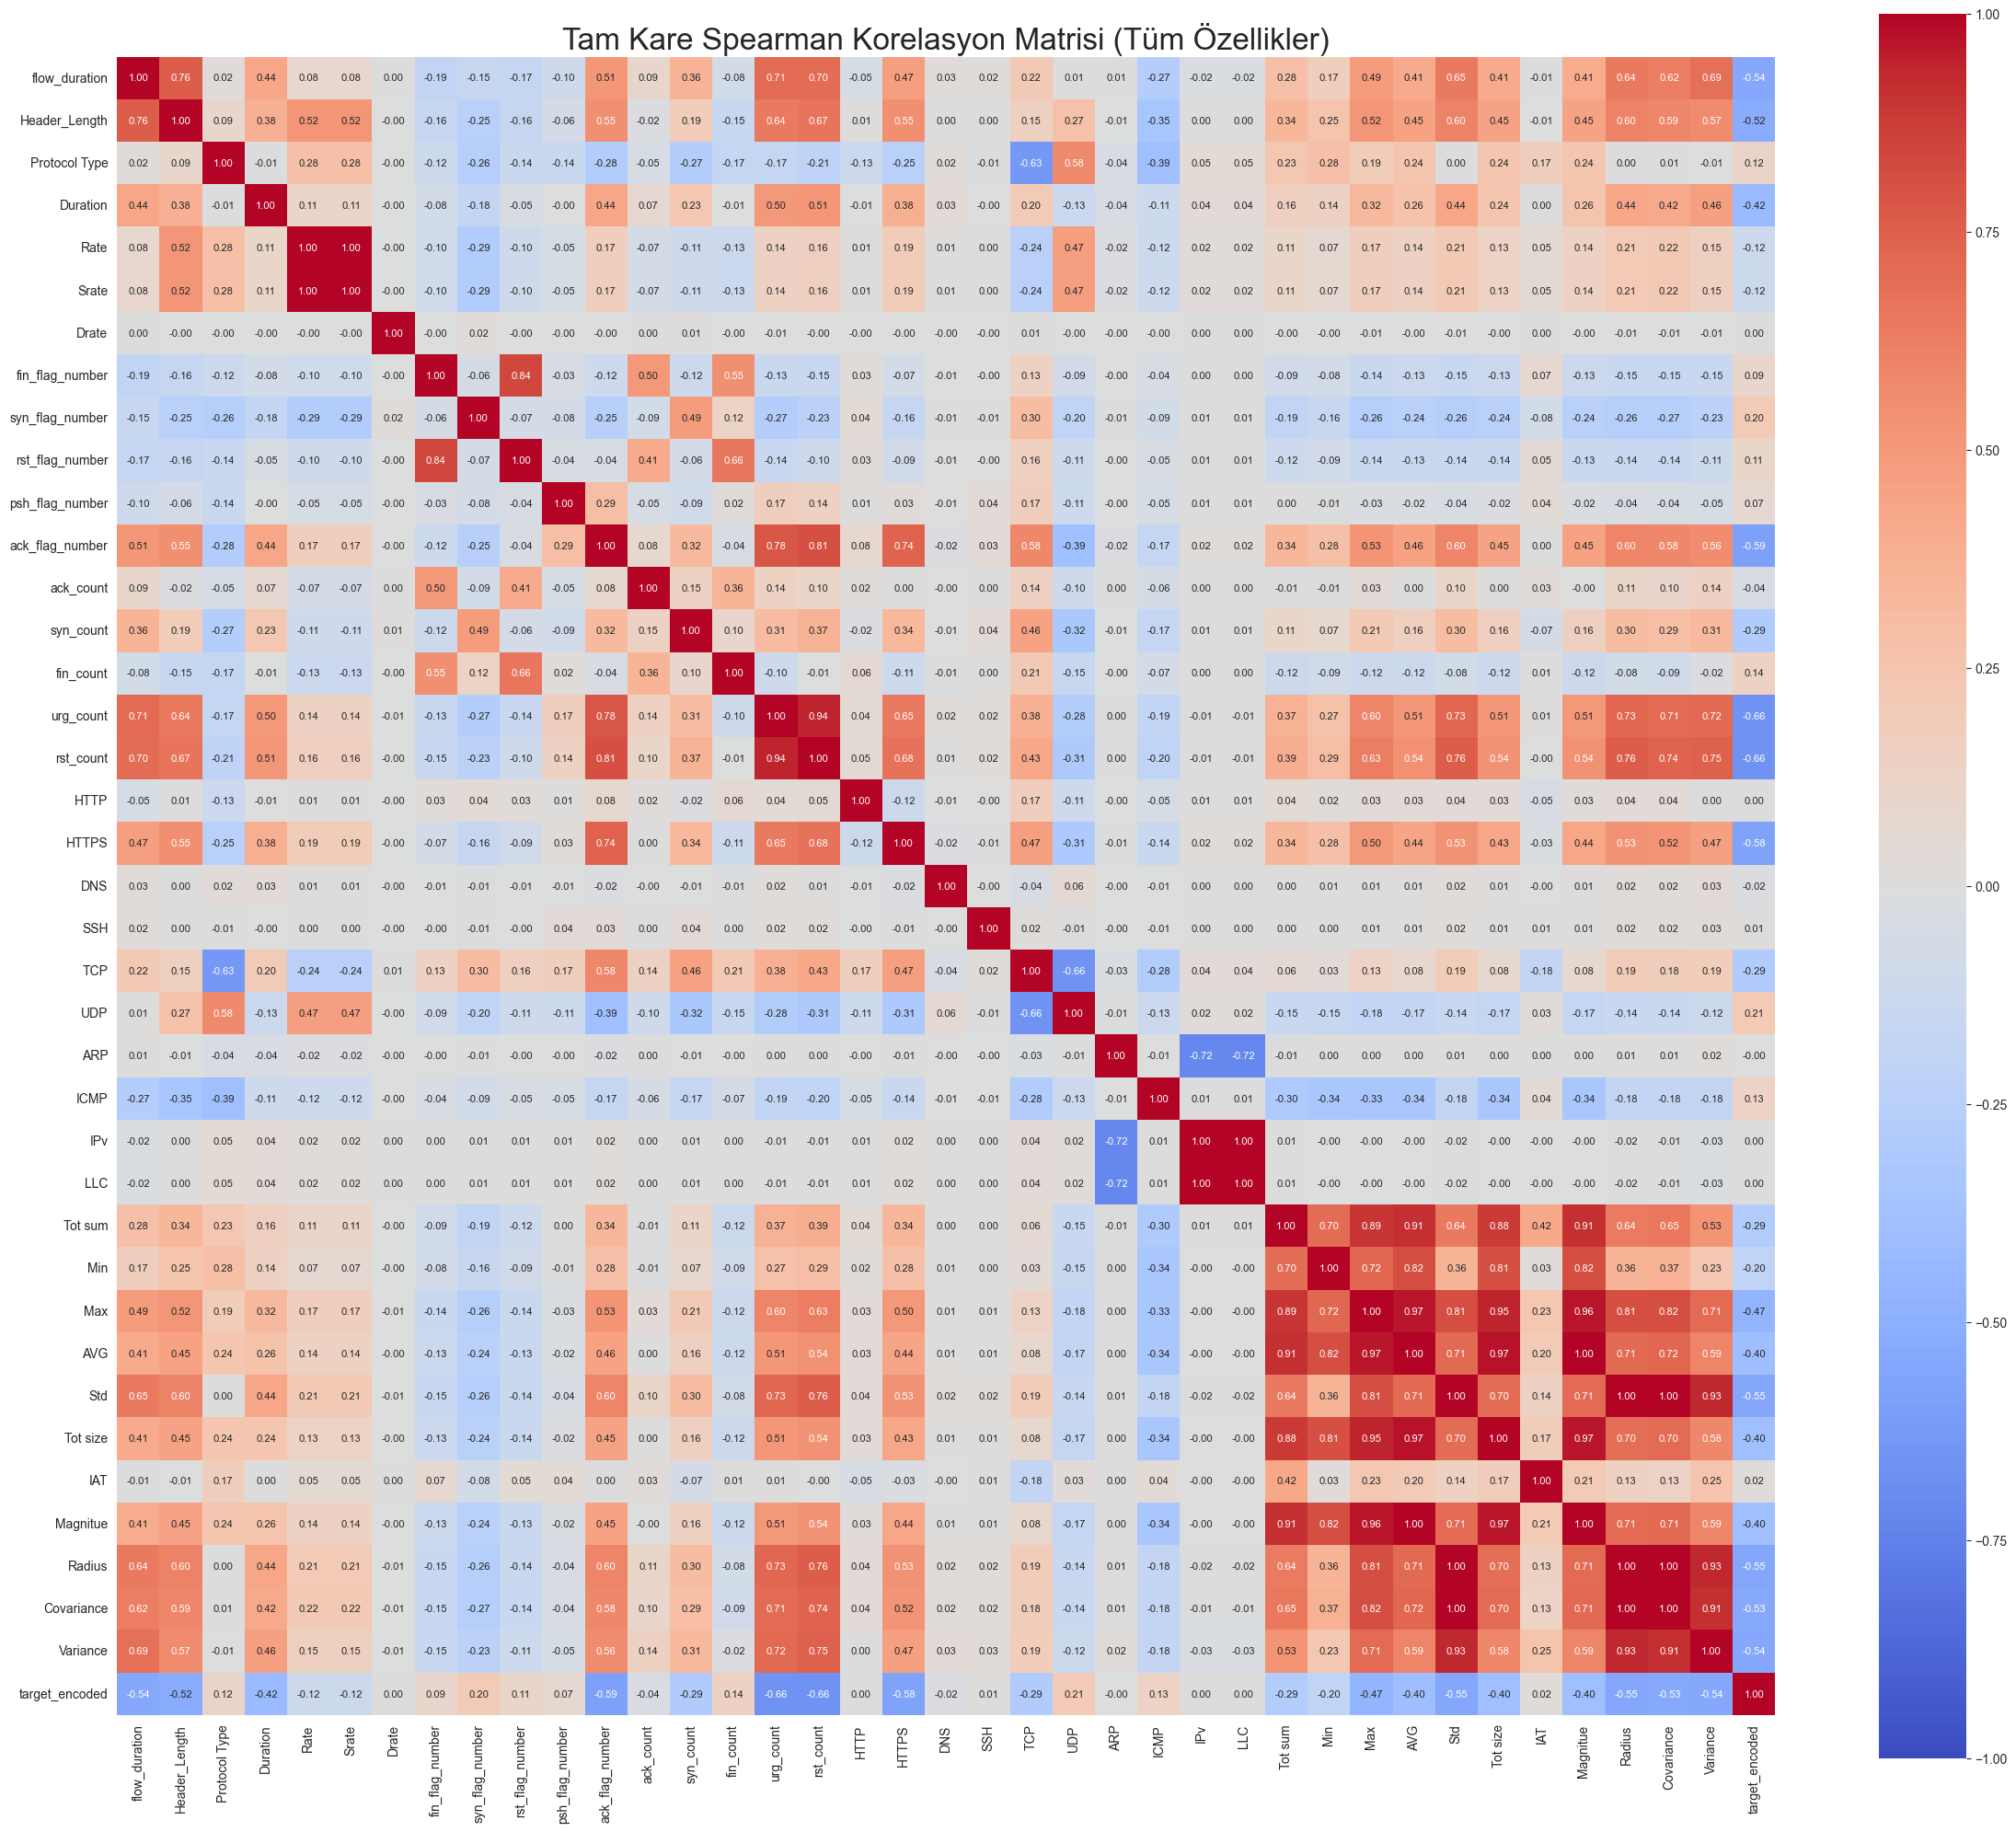

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv', 'dataset_output/ciciot2023_balanced.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        df['main_label'] = df['label'].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    
    df['target_encoded'] = df['main_label'].apply(lambda x: 0 if x == 'Normal' else 1)

    numeric_df = df.select_dtypes(include=[np.number])
    
    numeric_df = numeric_df.loc[:, (numeric_df != numeric_df.iloc[0]).any()] 
    
    cols_to_drop = ['label_encoded', 'Weight', 'Number']
    numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns])

    print(f"Matris Boyutu: {numeric_df.shape[1]} x {numeric_df.shape[1]}")
    print("Spearman Matrisi hesaplanıyor...")

    corr_matrix = numeric_df.corr(method='spearman')

    plt.figure(figsize=(24, 24)) 
    
    sns.heatmap(
        corr_matrix, 
        annot=True,           
        fmt=".2f",            
        cmap='coolwarm',      
        vmin=-1, vmax=1,      
        square=True,          
        cbar_kws={"shrink": 0.8}, 
        annot_kws={"size": 8} 
    )

    plt.title("Tam Kare Spearman Korelasyon Matrisi (Tüm Özellikler)", fontsize=24)
    plt.xticks(rotation=90, fontsize=10) 
    plt.yticks(rotation=0, fontsize=10)
    
    plt.tight_layout()
    plt.show()

else:
    print("Dosya bulunamadı!")

KRUSKAL WALLIS TESTİ

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Karşılaştırılacak Gruplar (8 Adet): ['DDoS' 'DoS' 'Mirai' 'Normal' 'Spoofing' 'Recon' 'Web' 'BruteForce']

--- KRUSKAL-WALLIS TESTİ SONUÇLARI ---
Hipotez H0: Tüm grupların (DDoS, Mirai, Normal...) medyanları EŞİTTİR.
Hipotez H1: En az bir grubun medyanı diğerlerinden FARKLIDIR.

         Özellik  H-İstatistiği  P-Değeri
1      rst_count    71692.11703   0.00000
2      urg_count    68919.64744   0.00000
0  flow_duration    59091.41060   0.00000
3  Header_Length    50665.31684   0.00000
4  Protocol Type    38163.33882   0.00000
5            IAT    18097.19917   0.00000


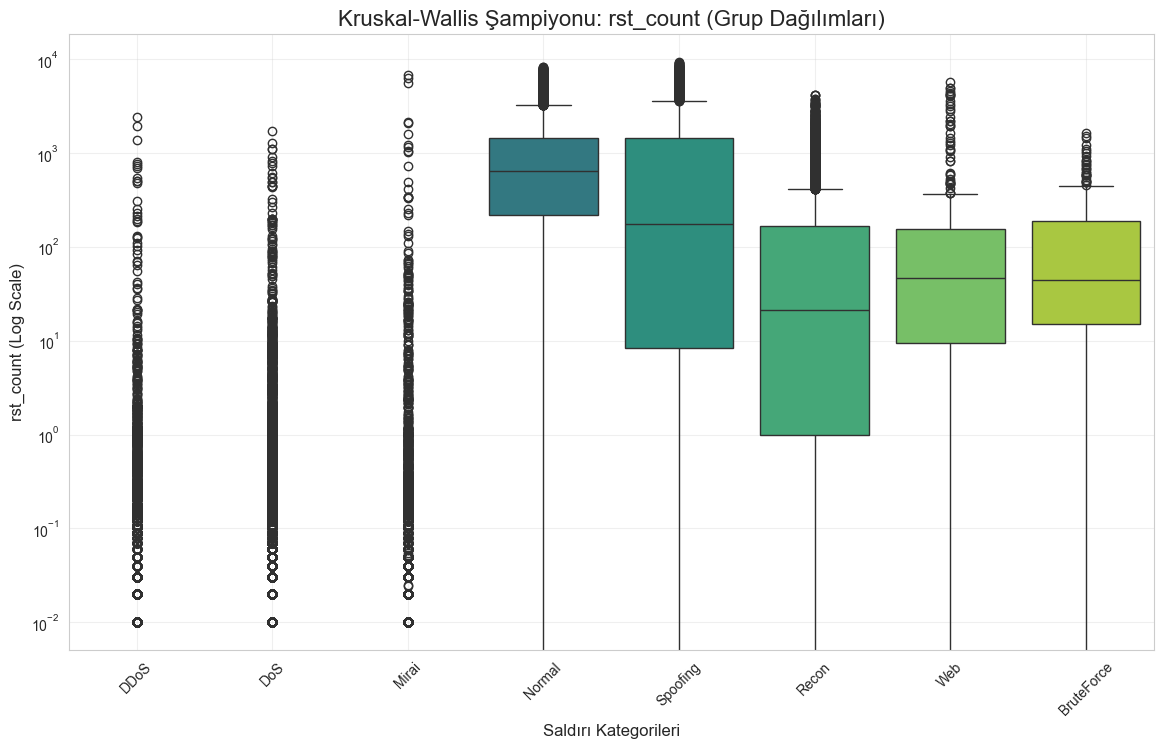

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'

if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

if os.path.exists(file_path):
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        mapping = {
            'DDoS': 'DDoS', 'DoS': 'DoS', 'Mirai': 'Mirai', 
            'Benign': 'Normal', 'Normal': 'Normal',
            'Recon': 'Recon', 'Web': 'Web', 'Brute': 'BruteForce', 
            'Spoof': 'Spoofing'
        }
        def get_category(lbl):
            for k, v in mapping.items():
                if k in str(lbl): return v
            return 'Other'
        df['main_label'] = df['label'].apply(get_category)

    groups_list = df['main_label'].unique()
    print(f"Karşılaştırılacak Gruplar ({len(groups_list)} Adet): {groups_list}")

    target_features = ['flow_duration', 'rst_count', 'urg_count', 'Header_Length', 'Protocol Type', 'IAT']
    
    df.columns = df.columns.str.strip()
    valid_features = [f for f in target_features if f in df.columns]

    print("\n--- KRUSKAL-WALLIS TESTİ SONUÇLARI ---")
    print("Hipotez H0: Tüm grupların (DDoS, Mirai, Normal...) medyanları EŞİTTİR.")
    print("Hipotez H1: En az bir grubun medyanı diğerlerinden FARKLIDIR.\n")
    
    results = []

    for col in valid_features:
        group_data = []
        for g in groups_list:
            subset = df[df['main_label'] == g][col].dropna()
            group_data.append(subset)
        
        stat, p = stats.kruskal(*group_data)
        
        results.append({
            'Özellik': col,
            'H-İstatistiği': stat,
            'P-Değeri': p
        })

    res_df = pd.DataFrame(results).sort_values(by='H-İstatistiği', ascending=False)
    print(res_df)

    best_feat = res_df.iloc[0]['Özellik']
    
    plt.figure(figsize=(14, 8))
    
    sns.boxplot(data=df, x='main_label', y=best_feat, palette='viridis')
    
    plt.yscale('log') 
    plt.title(f"Kruskal-Wallis Şampiyonu: {best_feat} (Grup Dağılımları)", fontsize=16)
    plt.ylabel(f"{best_feat} (Log Scale)", fontsize=12)
    plt.xlabel("Saldırı Kategorileri", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.show()

else:
    print("Dosya bulunamadı!")

label'ın tüm saldırı tiplerini görelim

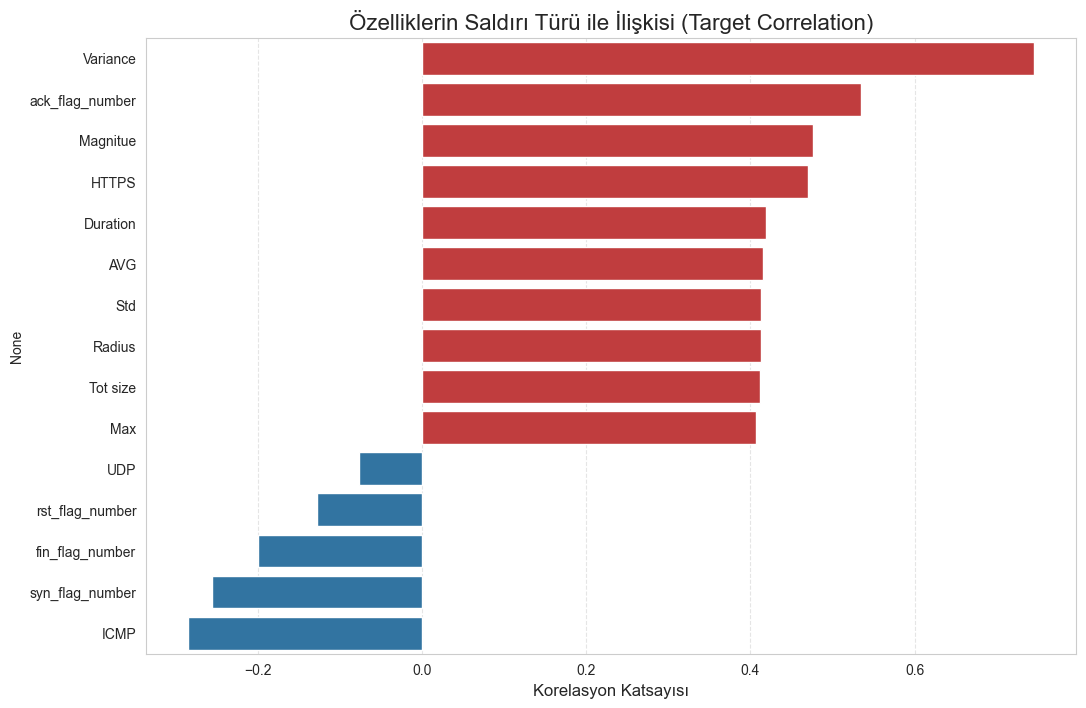

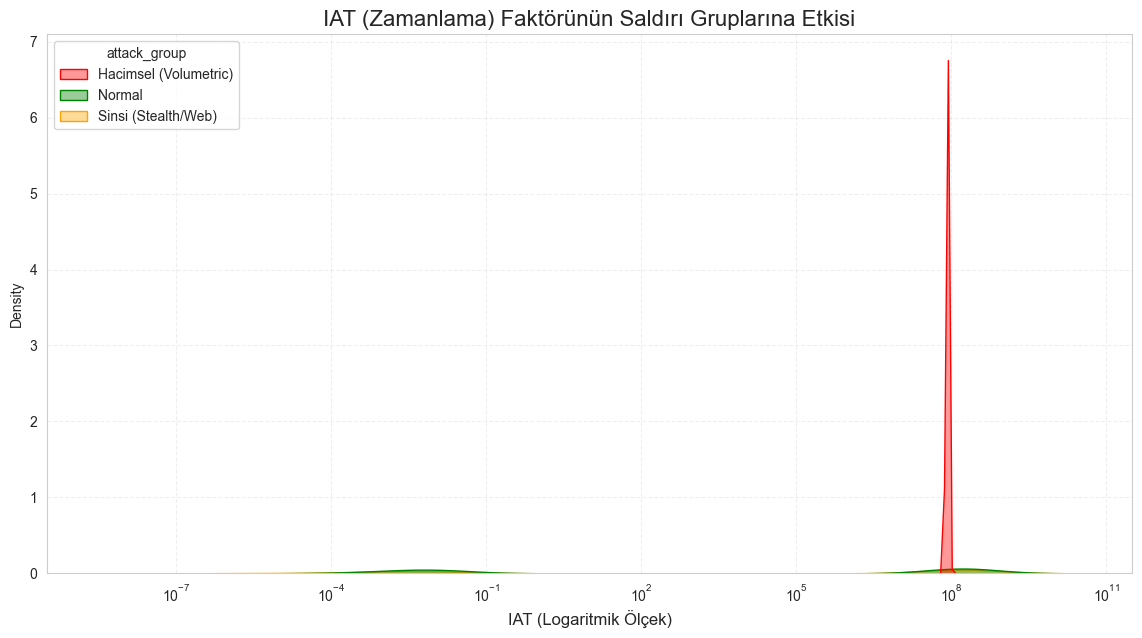

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset_output/ciciot2023_balanced.csv')

le = LabelEncoder()
y_encoded = le.fit_transform(df['main_label'])

df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'label_encoded' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['label_encoded'])

df_numeric = df_numeric.loc[:, df_numeric.std() > 0]

correlations = df_numeric.corrwith(pd.Series(y_encoded, index=df.index)).sort_values(ascending=False)

top_corr = pd.concat([correlations.head(10), correlations.tail(5)])

plt.figure(figsize=(12, 8))
colors = ['#d62728' if x > 0 else '#1f77b4' for x in top_corr.values]
sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors)
plt.title("Özelliklerin Saldırı Türü ile İlişkisi (Target Correlation)", fontsize=16)
plt.xlabel("Korelasyon Katsayısı", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


def categorize_attack(label):
    if label == 'Normal': return 'Normal'
    elif label in ['DDoS', 'DoS', 'Mirai']: return 'Hacimsel (Volumetric)'
    else: return 'Sinsi (Stealth/Web)'

df['attack_group'] = df['main_label'].apply(categorize_attack)

plt.figure(figsize=(14, 7))
plt.title("IAT (Zamanlama) Faktörünün Saldırı Gruplarına Etkisi", fontsize=16)

sns.kdeplot(
    data=df, 
    x='IAT', 
    hue='attack_group', 
    fill=True, 
    palette={'Normal': 'green', 'Hacimsel (Volumetric)': 'red', 'Sinsi (Stealth/Web)': 'orange'},
    log_scale=True, 
    alpha=0.4
)
plt.xlabel("IAT (Logaritmik Ölçek)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

BİRLEŞİK RİSK ANALİZİ

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

Toplam 4 çift için Risk Analizi yapılıyor...



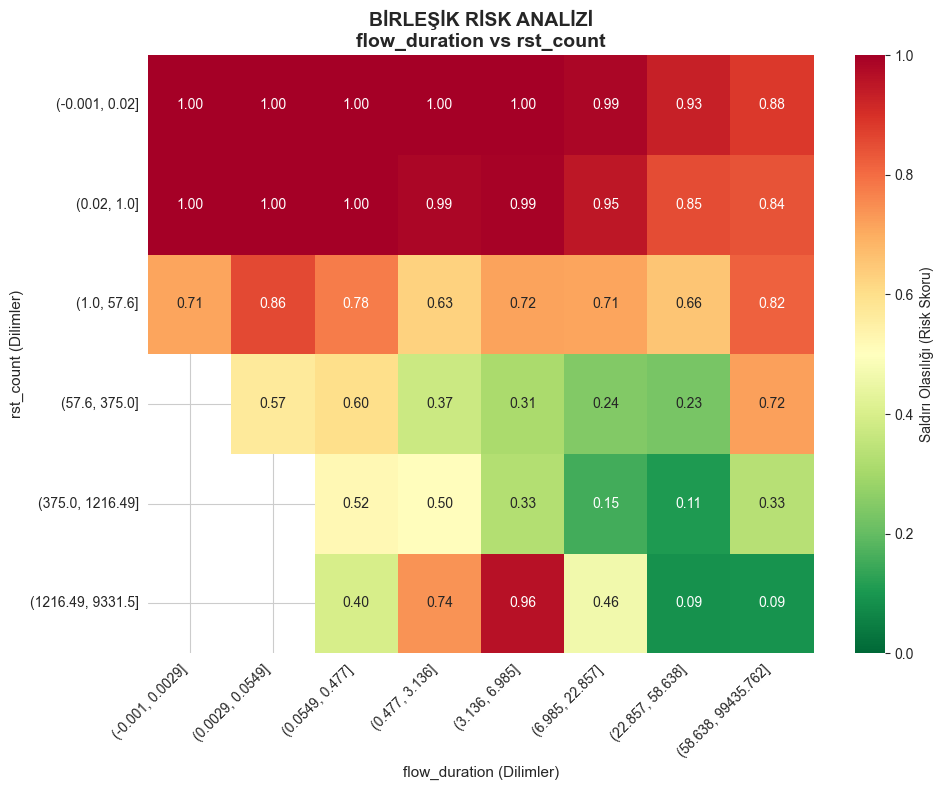

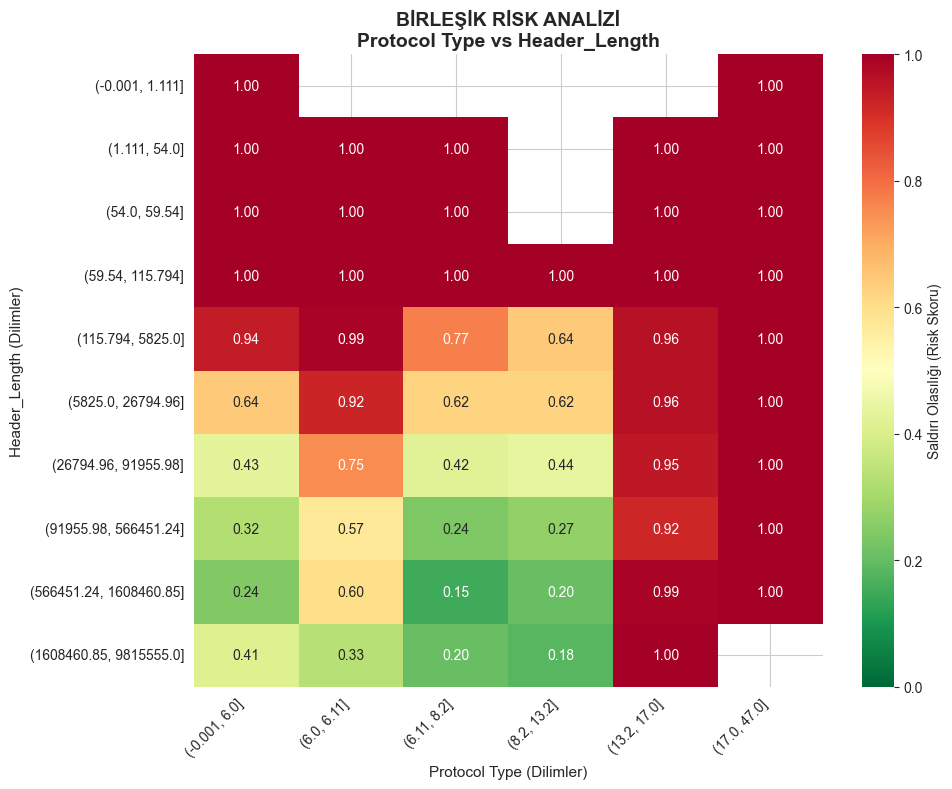

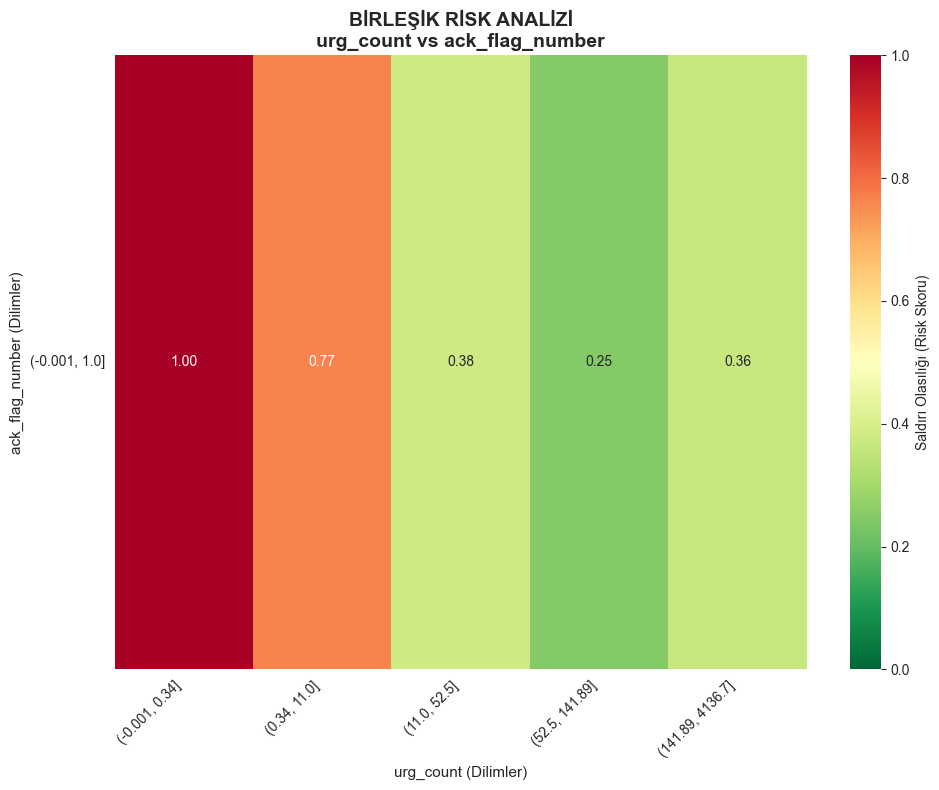

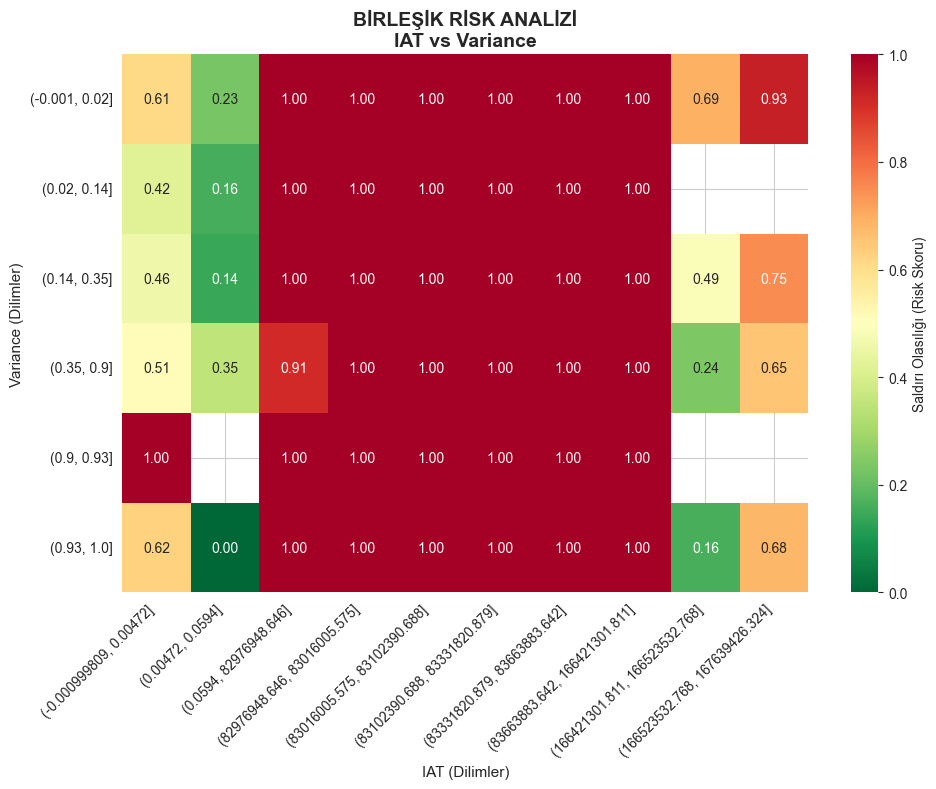

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv', 'dataset_output/ciciot2023_balanced.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        df['main_label'] = df['label'].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    df['target'] = df['main_label'].apply(lambda x: 0 if x == 'Normal' else 1)

    pairs_to_analyze = [
        ('flow_duration', 'rst_count'),
        ('Protocol Type', 'Header_Length'),
        ('urg_count', 'ack_flag_number'),
        ('IAT', 'Variance')
    ]

    print(f"\nToplam {len(pairs_to_analyze)} çift için Risk Analizi yapılıyor...\n")

    def plot_joint_risk(data, f1, f2, bins=10):
        if f1 not in data.columns or f2 not in data.columns:
            print(f"UYARI: {f1} veya {f2} sütunu bulunamadı, geçiliyor.")
            return

        temp_df = data[[f1, f2, 'target']].copy()

        try:
            temp_df[f'{f1}_bin'] = pd.qcut(temp_df[f1], q=bins, duplicates='drop')
            temp_df[f'{f2}_bin'] = pd.qcut(temp_df[f2], q=bins, duplicates='drop')
        except:
            temp_df[f'{f1}_bin'] = pd.cut(temp_df[f1], bins=bins)
            temp_df[f'{f2}_bin'] = pd.cut(temp_df[f2], bins=bins)

        risk_matrix = temp_df.pivot_table(index=f'{f2}_bin', columns=f'{f1}_bin', values='target', aggfunc='mean')
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            risk_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='RdYlGn_r',
            vmin=0, vmax=1,
            cbar_kws={'label': 'Saldırı Olasılığı (Risk Skoru)'}
        )
        
        plt.title(f"BİRLEŞİK RİSK ANALİZİ\n{f1} vs {f2}", fontsize=14, fontweight='bold')
        plt.xlabel(f"{f1} (Dilimler)", fontsize=11)
        plt.ylabel(f"{f2} (Dilimler)", fontsize=11)
        
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        plt.tight_layout()
        plt.show()

    for p1, p2 in pairs_to_analyze:
        plot_joint_risk(df, p1, p2)

else:
    print("Dosya bulunamadı!")

DENGELEYİCİ / GÜÇLENDİRİCİ ETKİLEŞİM ANALİZİ

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

--- ETKİLEŞİM ANALİZİ BAŞLIYOR (4 Senaryo) ---

>>> SENARYO: Kısa Süre + Reset
    - Sadece flow_duration (Low) Riski: %98.4
    - Sadece rst_count (High) Riski: %54.6
    - BİRLİKTE RİSK               : %93.3
    - SONUÇ: DENGELEYİCİ (Dampening)

>>> SENARYO: Yüksek Hız + HTTPS
    - Sadece Rate (High) Riski: %69.1
    - Sadece HTTPS (High) Riski: %35.7
    - BİRLİKTE RİSK               : %31.6
    - SONUÇ: DENGELEYİCİ (Dampening)

>>> SENARYO: Yüksek SYN + Düşük ACK
    - Sadece syn_count (High) Riski: %64.3
    - Sadece ack_flag_number (Low) Riski: %94.9
    - BİRLİKTE RİSK               : %91.5
    - SONUÇ: NÖTR (Etkisiz)

>>> SENARYO: Hızlı Paket + Sabit Boyut
    - Sadece IAT (Low) Riski: %77.3
    - Sadece Variance (Low) Riski: %98.1
    - BİRLİKTE RİSK               : %96.7
    - SONUÇ: NÖTR (Etkisiz)



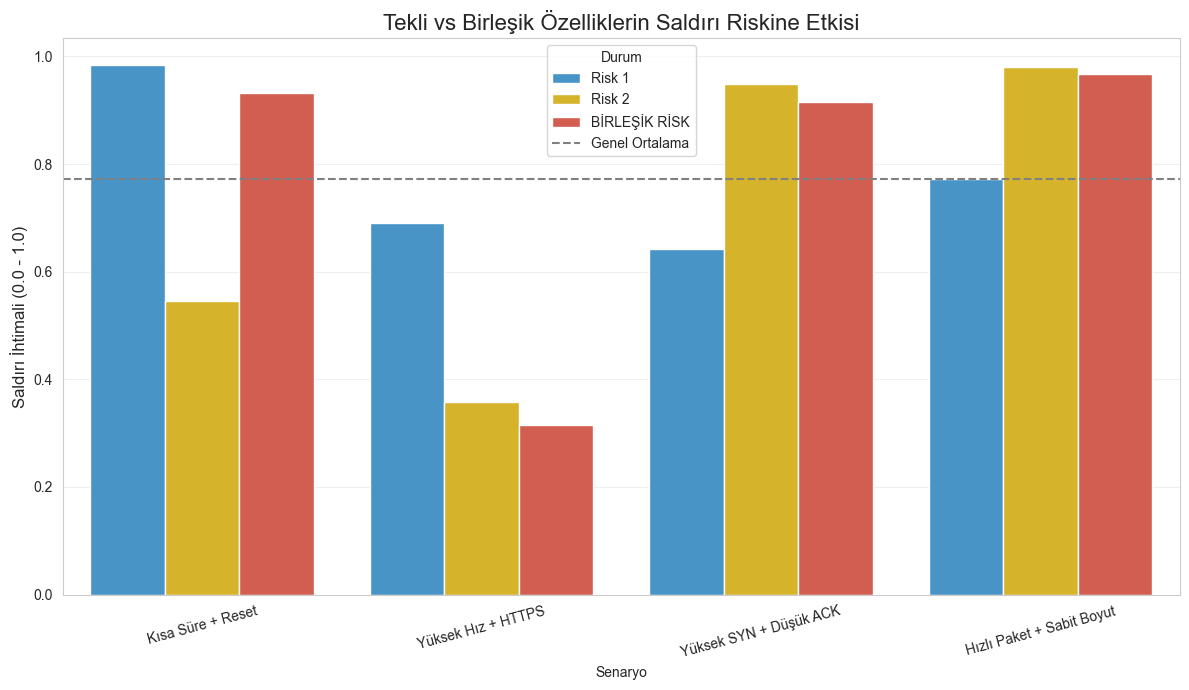

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv', 'dataset_output/ciciot2023_balanced.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        df['main_label'] = df['label'].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    df['target'] = df['main_label'].apply(lambda x: 0 if x == 'Normal' else 1)

    interactions = [
        {'f1': 'flow_duration', 'cond1': 'Low', 'f2': 'rst_count', 'cond2': 'High', 'name': 'Kısa Süre + Reset'},
        {'f1': 'Rate', 'cond1': 'High', 'f2': 'HTTPS', 'cond2': 'High', 'name': 'Yüksek Hız + HTTPS'},
        {'f1': 'syn_count', 'cond1': 'High', 'f2': 'ack_flag_number', 'cond2': 'Low', 'name': 'Yüksek SYN + Düşük ACK'},
        {'f1': 'IAT', 'cond1': 'Low', 'f2': 'Variance', 'cond2': 'Low', 'name': 'Hızlı Paket + Sabit Boyut'}
    ]

    print(f"\n--- ETKİLEŞİM ANALİZİ BAŞLIYOR ({len(interactions)} Senaryo) ---\n")

    results = []

    for scenario in interactions:
        f1, c1 = scenario['f1'], scenario['cond1']
        f2, c2 = scenario['f2'], scenario['cond2']
        
        th1 = df[f1].median()
        th2 = df[f2].median()
        
        if df[f1].nunique() <= 2: th1 = 0.5
        if df[f2].nunique() <= 2: th2 = 0.5

        if c1 == 'High': mask1 = df[f1] > th1
        else:            mask1 = df[f1] <= th1
            
        if c2 == 'High': mask2 = df[f2] > th2
        else:            mask2 = df[f2] <= th2
        
        base_risk = df['target'].mean()
        risk_f1 = df[mask1]['target'].mean()
        risk_f2 = df[mask2]['target'].mean()
        risk_combined = df[mask1 & mask2]['target'].mean()
        
        expected = max(risk_f1, risk_f2)
        
        if risk_combined > expected * 1.05:
            effect_type = "GÜÇLENDİRİCİ (Synergy)"
        elif risk_combined < expected * 0.95:
            effect_type = "DENGELEYİCİ (Dampening)"
        else:
            effect_type = "NÖTR (Etkisiz)"

        results.append({
            'Senaryo': scenario['name'],
            'Faktör 1': f"{f1} ({c1})",
            'Risk 1': risk_f1,
            'Faktör 2': f"{f2} ({c2})",
            'Risk 2': risk_f2,
            'BİRLEŞİK RİSK': risk_combined,
            'ETKİ TÜRÜ': effect_type
        })

    res_df = pd.DataFrame(results)
    
    for index, row in res_df.iterrows():
        print(f">>> SENARYO: {row['Senaryo']}")
        print(f"    - Sadece {row['Faktör 1']} Riski: %{row['Risk 1']*100:.1f}")
        print(f"    - Sadece {row['Faktör 2']} Riski: %{row['Risk 2']*100:.1f}")
        print(f"    - BİRLİKTE RİSK               : %{row['BİRLEŞİK RİSK']*100:.1f}")
        print(f"    - SONUÇ: {row['ETKİ TÜRÜ']}\n")

    plot_data = res_df[['Senaryo', 'Risk 1', 'Risk 2', 'BİRLEŞİK RİSK']].melt(id_vars='Senaryo', var_name='Durum', value_name='Risk Skoru')
    
    plt.figure(figsize=(12, 7))
    sns.barplot(data=plot_data, x='Senaryo', y='Risk Skoru', hue='Durum', palette=['#3498db', '#f1c40f', '#e74c3c'])
    
    plt.title("Tekli vs Birleşik Özelliklerin Saldırı Riskine Etkisi", fontsize=16)
    plt.ylabel("Saldırı İhtimali (0.0 - 1.0)", fontsize=12)
    plt.axhline(y=df['target'].mean(), color='gray', linestyle='--', label='Genel Ortalama')
    plt.legend(title='Durum')
    plt.xticks(rotation=15)
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Dosya bulunamadı!")

ROC EĞRİSİ

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Model Eğitiliyor... (Satır: 99102, Sütun: 44)


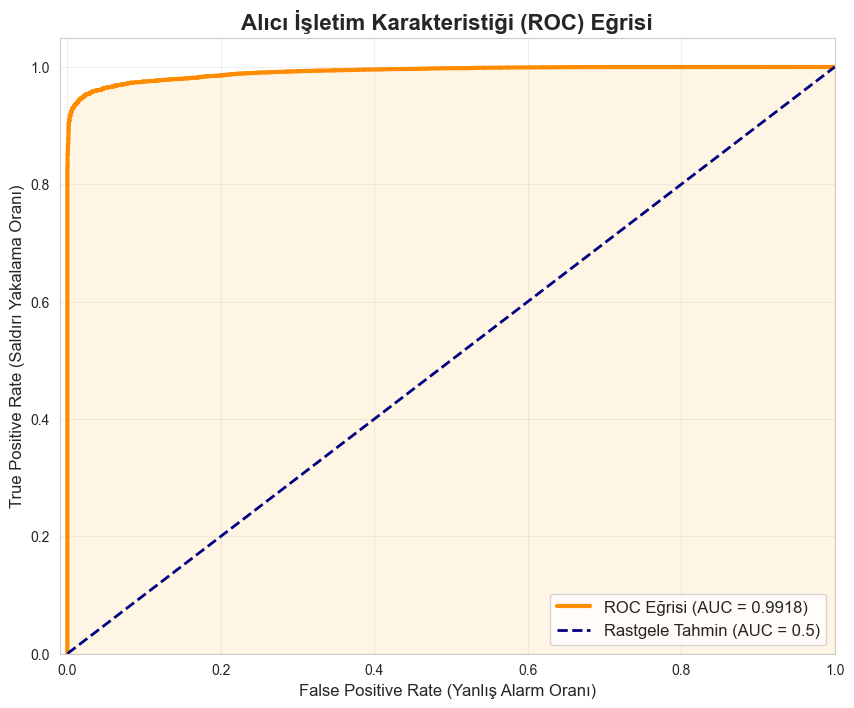


SONUÇ: AUC Skoru = 0.9918
   Yorum: Model Mükemmel! Neredeyse hatasız ayrım yapıyor.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        df['main_label'] = df['label'].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    
    y = df['main_label'].apply(lambda x: 0 if x == 'Normal' else 1)
    
    X = df.select_dtypes(include=[np.number])
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])
    
    print(f"Model Eğitiliyor... (Satır: {len(X)}, Sütun: {len(X.columns)})")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    
    plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC Eğrisi (AUC = {roc_auc:.4f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Rastgele Tahmin (AUC = 0.5)')

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)', fontsize=12)
    plt.ylabel('True Positive Rate (Saldırı Yakalama Oranı)', fontsize=12)
    plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.fill_between(fpr, tpr, color='orange', alpha=0.1)

    plt.show()

    print(f"\nSONUÇ: AUC Skoru = {roc_auc:.4f}")
    if roc_auc > 0.99:
        print("   Yorum: Model Mükemmel! Neredeyse hatasız ayrım yapıyor.")
    elif roc_auc > 0.90:
        print("   Yorum: Model Çok Başarılı.")

else:
    print("Dosya bulunamadı!")

RANDOM FOREST CLASSIFIER denemesi

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Sınıflar: ['BruteForce' 'DDoS' 'DoS' 'Mirai' 'Normal' 'Recon' 'Spoofing' 'Web']

Sınıf Ağırlıkları:
  BruteForce: 41.29
  DDoS: 0.55
  DoS: 0.55
  Mirai: 0.92
  Normal: 0.55
  Recon: 1.70
  Spoofing: 1.23
  Web: 24.84

Random Forest Eğitiliyor...

--- SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

  BruteForce       1.00      0.38      0.55        60
        DDoS       1.00      1.00      1.00      4497
         DoS       1.00      1.00      1.00      4497
       Mirai       1.00      1.00      1.00      2687
      Normal       0.88      0.98      0.93      4497
       Recon       0.86      0.78      0.82      1462
    Spoofing       0.90      0.81      0.85      2022
         Web       1.00      0.27      0.43        99

    accuracy                           0.95     19821
   macro avg       0.96      0.78      0.82     19821
weighted avg       0.95      0.95      0.95     19821



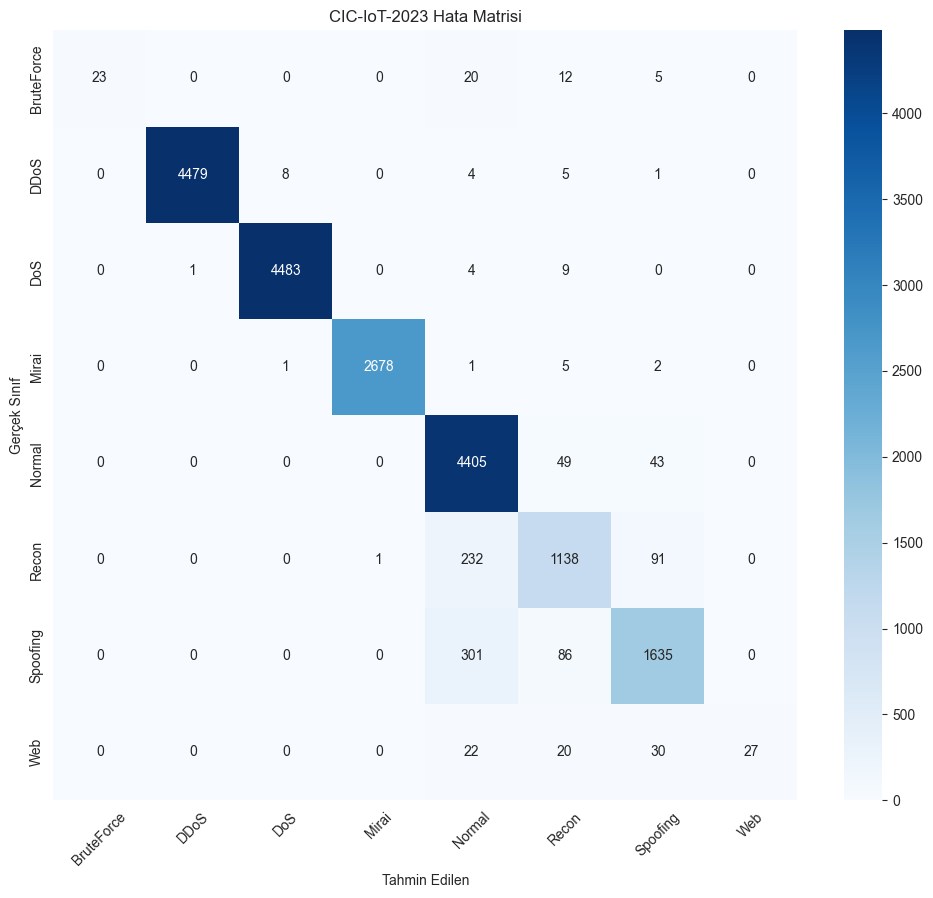

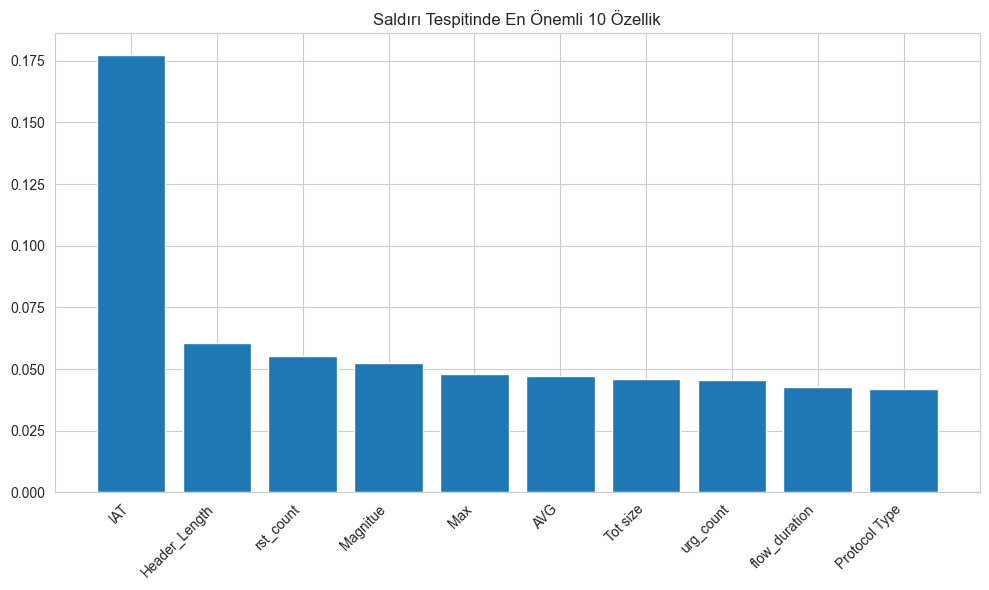

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

cols_to_drop = ['main_label', 'label']
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
y = df['main_label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

print(f"Sınıflar: {class_names}")

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

print("\nSınıf Ağırlıkları:")
for i, name in enumerate(class_names):
    print(f"  {name}: {class_weights[i]:.2f}")

print("\nRandom Forest Eğitiliyor...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("\n--- SINIFLANDIRMA RAPORU ---")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CIC-IoT-2023 Hata Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen')
plt.xticks(rotation=45)
plt.show()

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10 

plt.figure(figsize=(10, 6))
plt.title("Saldırı Tespitinde En Önemli 10 Özellik")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

RANDOM FOREST SELECTOR (GENETİK ALGORİTMA bnezeri) denedim

Veri yükleniyor...
Sayısal olmayan sütunlar çıkarılıyor: ['label']
Genetik Algoritma 3000 satır üzerinde en iyi özellikleri arıyor...

--- Alternatif: Random Forest Tabanlı Özellik Seçimi ---

Toplam Özellik Sayısı: 46

>>> EN İYİ 10 ÖZELLİK (Sırasıyla):
1. IAT (Önem: 0.2233)
2. Magnitue (Önem: 0.0681)
3. rst_count (Önem: 0.0668)
4. urg_count (Önem: 0.0452)
5. Header_Length (Önem: 0.0424)
6. Min (Önem: 0.0423)
7. Max (Önem: 0.0418)
8. Tot sum (Önem: 0.0418)
9. flow_duration (Önem: 0.0409)
10. Tot size (Önem: 0.0402)


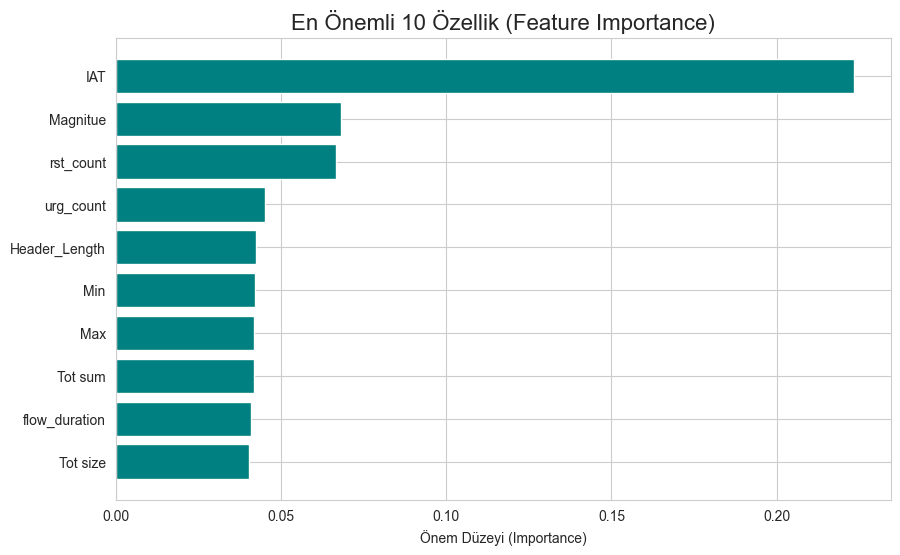

In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("Veri yükleniyor...")
try:
    df = pd.read_csv('dataset_output/ciciot2023_balanced2.csv')
except FileNotFoundError:
    print("Dosya bulunamadı! Lütfen dosya yolunu kontrol edin.")
    exit()

le = LabelEncoder()
y = le.fit_transform(df['main_label'])

X = df.drop(columns=['main_label'], errors='ignore')

non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Sayısal olmayan sütunlar çıkarılıyor: {list(non_numeric_columns)}")
    X = X.drop(columns=non_numeric_columns)

try:
    X_small, _, y_small, _ = train_test_split(X, y, train_size=3000, stratify=y, random_state=42)
except ValueError as e:
    print(f"Hata: {e}")
    print("Stratify işlemi başarısız oldu. Sınıf dağılımı çok dengesiz olabilir veya veri sayısı yetersiz.")
    X_small, _, y_small, _ = train_test_split(X, y, train_size=3000, random_state=42)

print(f"Genetik Algoritma {len(X_small)} satır üzerinde en iyi özellikleri arıyor...")

clf = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

print("\n--- Alternatif: Random Forest Tabanlı Özellik Seçimi ---")

rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_small, y_small)

importances = rf_selector.feature_importances_
indices = np.argsort(importances)[::-1] 

print(f"\nToplam Özellik Sayısı: {X.shape[1]}")
print("\n>>> EN İYİ 10 ÖZELLİK (Sırasıyla):")

top_10_features = []
for i in range(10):
    if i < len(indices): 
        feature_name = X.columns[indices[i]]
        importance_score = importances[indices[i]]
        top_10_features.append(feature_name)
        print(f"{i+1}. {feature_name} (Önem: {importance_score:.4f})")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("En Önemli 10 Özellik (Feature Importance)", fontsize=16)
if len(indices) > 0:
    plt.barh(range(min(10, len(indices))), importances[indices[:min(10, len(indices))]][::-1], color='teal', align='center')
    plt.yticks(range(min(10, len(indices))), [X.columns[i] for i in indices[:min(10, len(indices))]][::-1])
    plt.xlabel("Önem Düzeyi (Importance)")
    plt.show()
else:
    print("Görselleştirilecek özellik bulunamadı.")

LSTM ve CNN-LSTM denemesi

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Sınıflar (8 adet): ['BruteForce' 'DDoS' 'DoS' 'Mirai' 'Normal' 'Recon' 'Spoofing' 'Web']

--- Sınıf Ağırlıkları ---
BruteForce: 41.29
DDoS: 0.55
DoS: 0.55
Mirai: 0.92
Normal: 0.55
Recon: 1.70
Spoofing: 1.23
Web: 24.84

--- MODEL 1: LSTM EĞİTİLİYOR ---
Epoch 1/15
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6354 - loss: 1.1499 - val_accuracy: 0.6959 - val_loss: 0.7301
Epoch 2/15
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6899 - loss: 0.9108 - val_accuracy: 0.7073 - val_loss: 0.6717
Epoch 3/15
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7027 - loss: 0.8616 - val_accuracy: 0.7219 - val_loss: 0.6454
Epoch 4/15
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7124 - loss: 0.8355 - val_accuracy: 0.7199 - val_loss: 0.6391
Epoch 5/15
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7166 - loss: 0.8156 - val_accuracy: 0.7175 - val_loss: 0.6314
Epoch 6/15
1115/1115 ━━━━━━━━━━━━━━━━

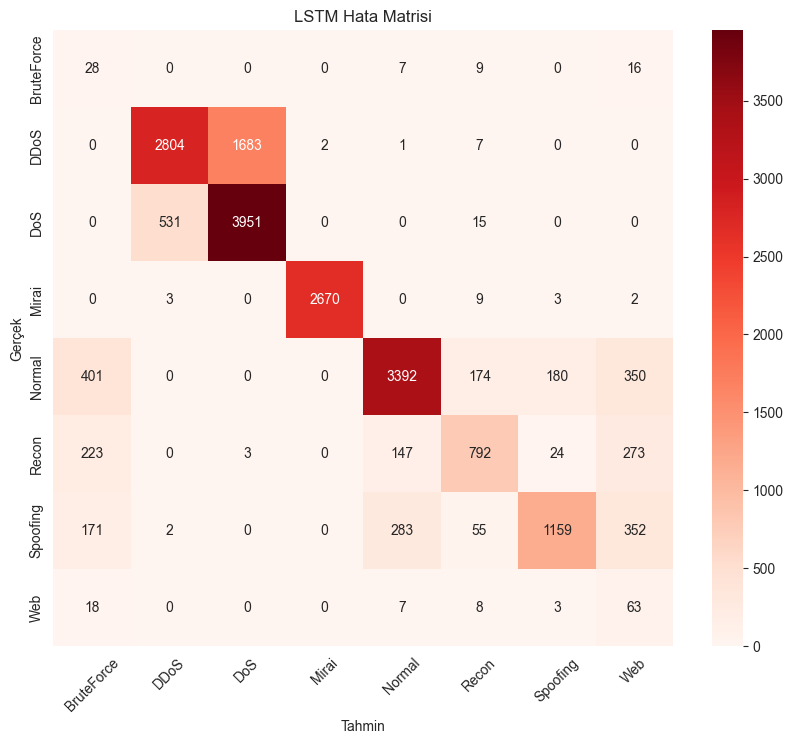


==================== CNN-LSTM SONUÇLARI ====================
Genel Doğruluk (Accuracy): %76.92
              precision    recall  f1-score   support

  BruteForce       0.05      0.42      0.09        60
        DDoS       0.85      0.65      0.73      4497
         DoS       0.71      0.88      0.79      4497
       Mirai       1.00      0.99      1.00      2687
      Normal       0.88      0.79      0.83      4497
       Recon       0.73      0.58      0.65      1462
    Spoofing       0.80      0.60      0.69      2022
         Web       0.06      0.63      0.12        99

    accuracy                           0.77     19821
   macro avg       0.64      0.69      0.61     19821
weighted avg       0.83      0.77      0.79     19821



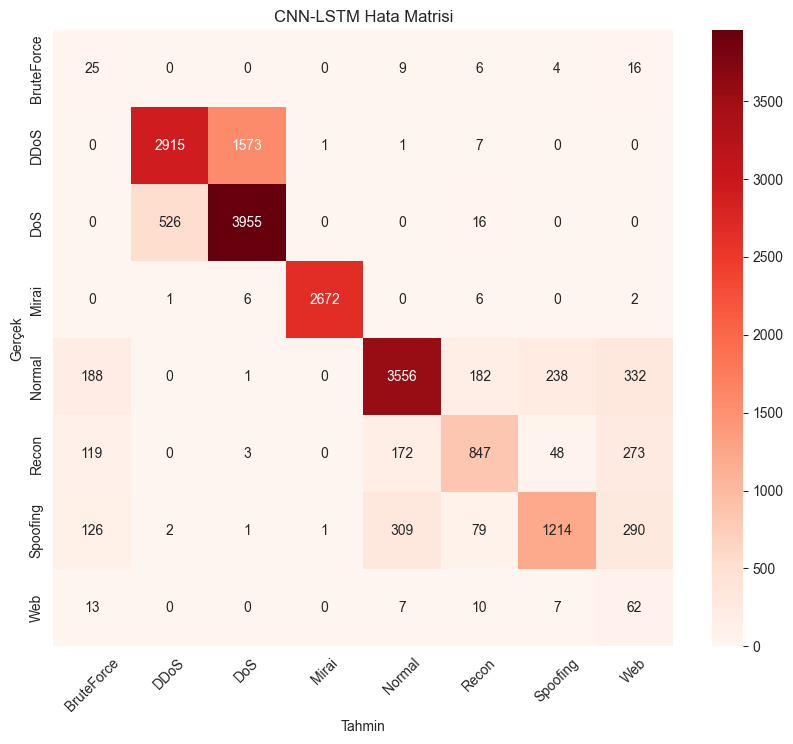

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Input
from tensorflow.keras.utils import to_categorical

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

cols_to_drop = ['main_label', 'label']
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
y = df['main_label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
num_classes = len(class_names)

print(f"Sınıflar ({num_classes} adet): {class_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

print("\n--- Sınıf Ağırlıkları ---")
for i, name in enumerate(class_names):
    print(f"{name}: {class_weights_dict[i]:.2f}")

X_train_dl = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_dl = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
input_shape = (1, X_train_scaled.shape[1])

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("\n--- MODEL 1: LSTM EĞİTİLİYOR ---")
model_lstm = Sequential([
    Input(shape=input_shape),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_lstm = model_lstm.fit(
    X_train_dl, y_train_cat, 
    epochs=15, 
    batch_size=64, 
    validation_split=0.1, 
    class_weight=class_weights_dict,
    verbose=1
)
time_lstm = time.time() - start
print(f"LSTM Eğitim Süresi: {time_lstm:.2f} saniye")

print("\n--- MODEL 2: CNN-LSTM EĞİTİLİYOR ---")
model_hybrid = Sequential([
    Input(shape=input_shape),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_hybrid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_hybrid = model_hybrid.fit(
    X_train_dl, y_train_cat, 
    epochs=15, 
    batch_size=64, 
    validation_split=0.1, 
    class_weight=class_weights_dict,
    verbose=1
)
time_hybrid = time.time() - start
print(f"CNN-LSTM Eğitim Süresi: {time_hybrid:.2f} saniye")

def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n{'='*20} {model_name} SONUÇLARI {'='*20}")
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Genel Doğruluk (Accuracy): %{acc*100:.2f}")
    
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))
    
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Hata Matrisi')
    plt.ylabel('Gerçek')
    plt.xlabel('Tahmin')
    plt.xticks(rotation=45)
    plt.show()

evaluate_model(model_lstm, X_test_dl, y_test, "LSTM")
evaluate_model(model_hybrid, X_test_dl, y_test, "CNN-LSTM")

XGBoost (Extreme Gradient Boosting) denedim

XGBoost için veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

--- XGBoost Eğitiliyor (Bu biraz sürebilir) ---

>>> XGBoost Accuracy: %94.99

--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

  BruteForce       0.25      0.70      0.37        60
        DDoS       1.00      1.00      1.00      4497
         DoS       1.00      1.00      1.00      4497
       Mirai       1.00      1.00      1.00      2687
      Normal       0.95      0.92      0.93      4497
       Recon       0.87      0.83      0.85      1462
    Spoofing       0.90      0.84      0.87      2022
         Web       0.21      0.76      0.33        99

    accuracy                           0.95     19821
   macro avg       0.77      0.88      0.79     19821
weighted avg       0.96      0.95      0.95     19821



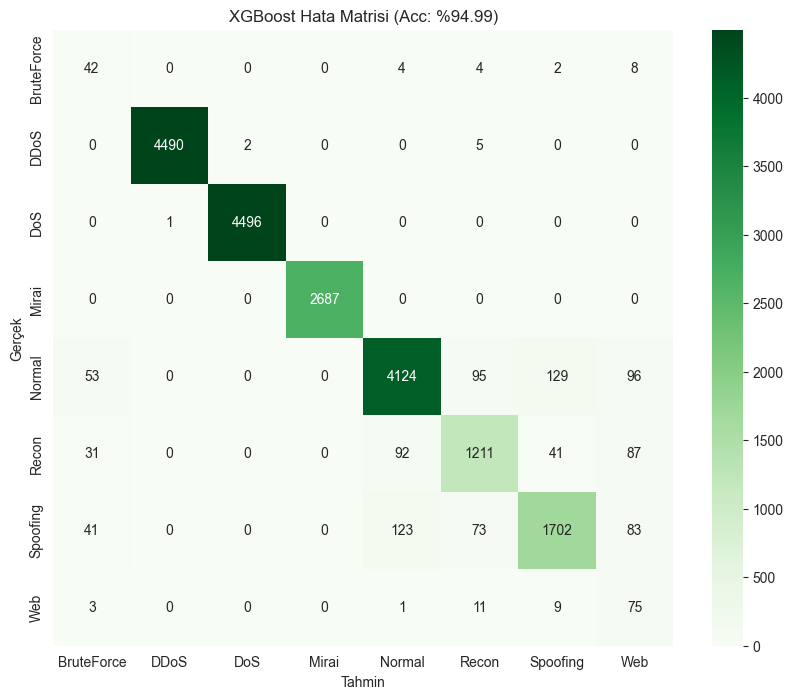

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"XGBoost için veri yükleniyor: {file_path} ...")

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    df = pd.read_csv('ciciot2023_balanced2.csv')

cols_to_drop = ['main_label', 'label']
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
y = df['main_label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

print("\n--- XGBoost Eğitiliyor (Bu biraz sürebilir) ---")
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(class_names),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_pred = model_xgb.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"\n>>> XGBoost Accuracy: %{acc*100:.2f}")
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title(f'XGBoost Hata Matrisi (Acc: %{acc*100:.2f})')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

ANN (Yapay Sinir Ağları / MLP) denedim


--- ANN (Yapay Sinir Ağı) Hazırlanıyor ---
ANN Eğitiliyor...
Epoch 1/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6520 - loss: 1.0904 - val_accuracy: 0.6919 - val_loss: 0.7373
Epoch 2/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6931 - loss: 0.9075 - val_accuracy: 0.6996 - val_loss: 0.6806
Epoch 3/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7062 - loss: 0.8637 - val_accuracy: 0.7156 - val_loss: 0.6416
Epoch 4/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7166 - loss: 0.8363 - val_accuracy: 0.7191 - val_loss: 0.6277
Epoch 5/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7204 - loss: 0.8119 - val_accuracy: 0.7411 - val_loss: 0.6061
Epoch 6/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7225 - loss: 0.8003 - val_accuracy: 0.7387 - val_loss: 0.5881
Epoch 7/20
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7300 - loss: 0.7850 - val_accuracy: 0.7316 - val_loss: 0.6141
Epoch 8/20
2230/2230 ━━━━━━━

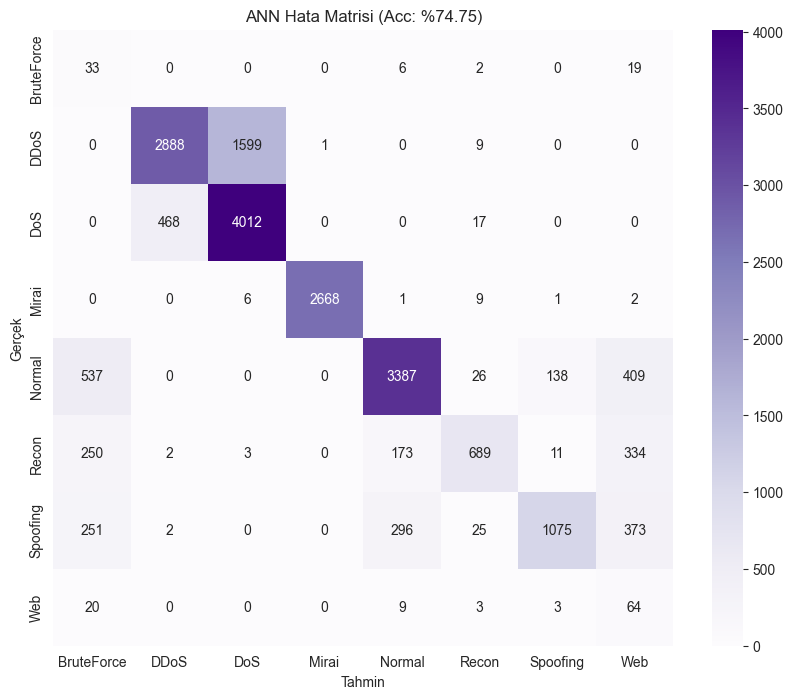

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

print("\n--- ANN (Yapay Sinir Ağı) Hazırlanıyor ---")

num_classes = len(class_names)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

input_dim = X_train_scaled.shape[1]

class_weights_vals = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights_vals))

model_ann = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("ANN Eğitiliyor...")
history = model_ann.fit(
    X_train_scaled, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights_dict,
    verbose=1
)

print("\n--- ANN Değerlendirmesi ---")
y_pred_prob = model_ann.predict(X_test_scaled)
y_pred_ann = np.argmax(y_pred_prob, axis=1)

acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"\n>>> ANN Accuracy: %{acc_ann*100:.2f}")
print(classification_report(y_test, y_pred_ann, target_names=class_names, zero_division=0))

plt.figure(figsize=(10, 8))
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title(f'ANN Hata Matrisi (Acc: %{acc_ann*100:.2f})')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

Literatürde DECISION TREE ve NAIVE BAYES deneyenler vardı, denedim

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- 1. DECISION TREE EĞİTİLİYOR ---")
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: %{acc_dt*100:.2f}")
print(classification_report(y_test, y_pred_dt, target_names=class_names, zero_division=0))

print("\n--- 2. NAIVE BAYES EĞİTİLİYOR ---")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: %{acc_nb*100:.2f}")
print(classification_report(y_test, y_pred_nb, target_names=class_names, zero_division=0))

print("\n" + "="*40)
print(f"{'MODEL':<20} | {'ACCURACY':<10}")
print("-" * 40)
print(f"{'XGBoost':<20} | %94.99 (Referans)")
print(f"{'Decision Tree':<20} | %{acc_dt*100:.2f}")
print(f"{'Naive Bayes':<20} | %{acc_nb*100:.2f}")
print(f"{'ANN (YSA)':<20} | %74.71")
print("="*40)


--- 1. DECISION TREE EĞİTİLİYOR ---
Decision Tree Accuracy: %94.40
              precision    recall  f1-score   support

  BruteForce       0.51      0.62      0.56        60
        DDoS       1.00      1.00      1.00      4497
         DoS       1.00      1.00      1.00      4497
       Mirai       1.00      1.00      1.00      2687
      Normal       0.91      0.92      0.91      4497
       Recon       0.81      0.80      0.81      1462
    Spoofing       0.84      0.83      0.83      2022
         Web       0.53      0.57      0.55        99

    accuracy                           0.94     19821
   macro avg       0.82      0.84      0.83     19821
weighted avg       0.94      0.94      0.94     19821


--- 2. NAIVE BAYES EĞİTİLİYOR ---
Naive Bayes Accuracy: %52.27
              precision    recall  f1-score   support

  BruteForce       0.01      0.98      0.02        60
        DDoS       0.98      0.35      0.51      4497
         DoS       0.65      0.98      0.78      4497


KORELASYON MATRİSİ

Analiz için veri yükleniyor...


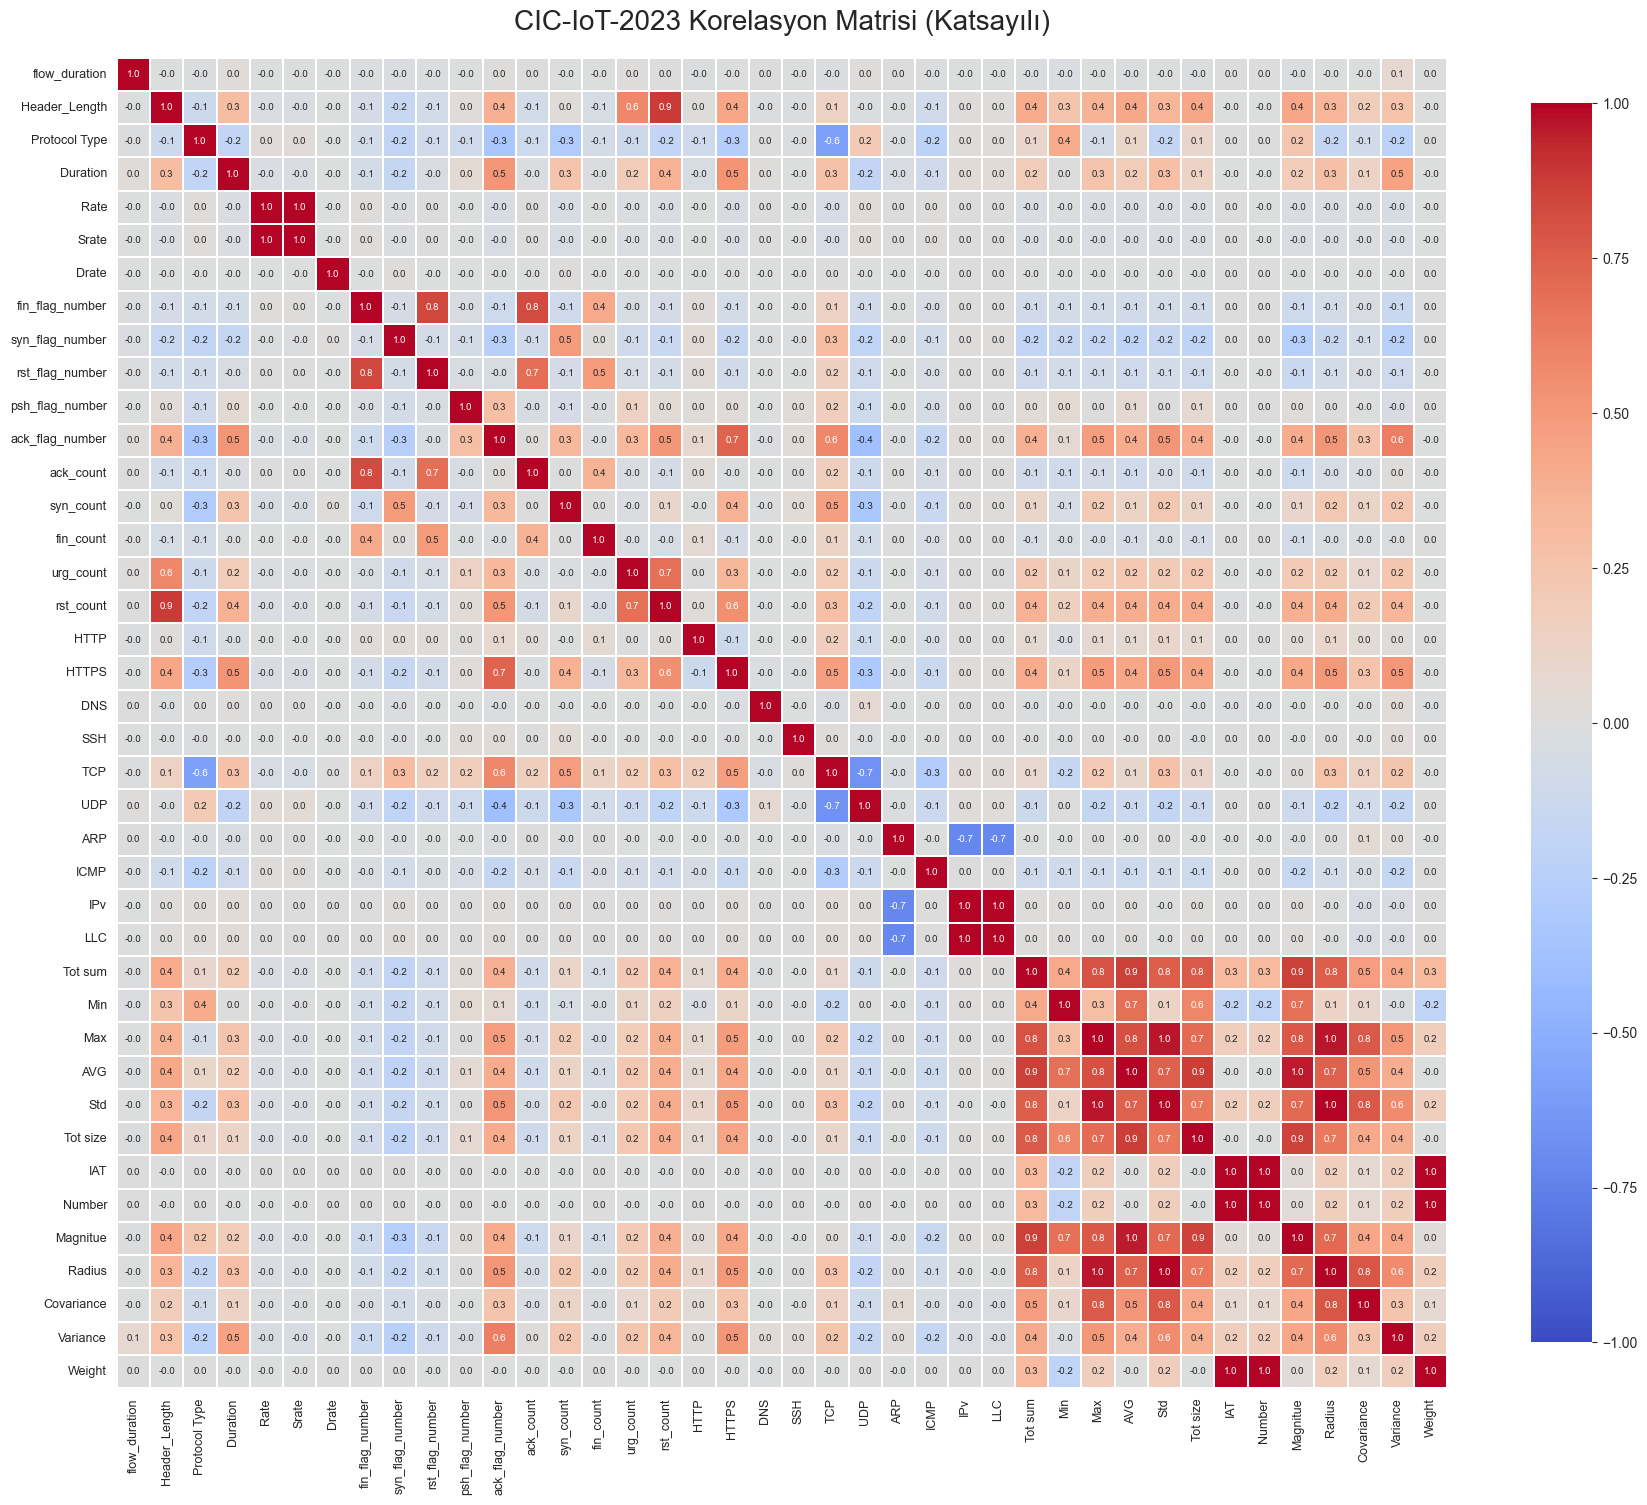

Matris Boyutu: 40x40


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'dataset_output/ciciot2023_balanced2.csv'
print(f"Analiz için veri yükleniyor...")
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    df = pd.read_csv('ciciot2023_balanced2.csv')

df_corr = df.select_dtypes(include=[np.number])

cols_to_drop = ['main_label', 'label', 'target_encoded', 'label_encoded'] 
df_corr = df_corr.drop(columns=[c for c in cols_to_drop if c in df_corr.columns], errors='ignore')

df_corr = df_corr.loc[:, df_corr.std() > 0]

corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 18)) 
plt.title("CIC-IoT-2023 Korelasyon Matrisi (Katsayılı)", fontsize=20, pad=20)

sns.heatmap(
    corr_matrix, 
    cmap='coolwarm',
    vmax=1, 
    vmin=-1, 
    center=0,
    annot=True,
    fmt='.1f',
    square=True, 
    linewidths=.3,
    cbar_kws={"shrink": .7},
    annot_kws={"size": 7}
)

plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

print(f"Matris Boyutu: {df_corr.shape[1]}x{df_corr.shape[1]}")

PCA, Feature Importance (Random Forest ile) ve Confusion Matrix

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Sınıflandırma Grupları Oluşturuldu:
binary_group
Attack    76618
Normal    22484
Name: count, dtype: int64

1. PCA Analizi Yapılıyor (Boyut İndirgeme)...


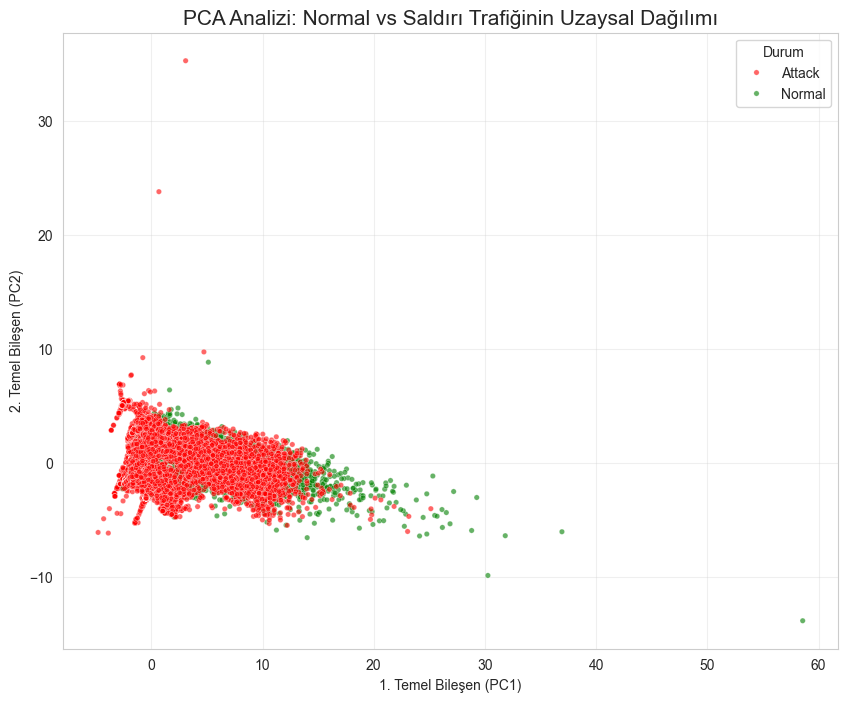

   > Yorum: Kümeler birbirinden uzaksa, modelin bunları ayırt etmesi kolay olacaktır.

2. Model Bazlı Öznitelik Önemi Hesaplanıyor...


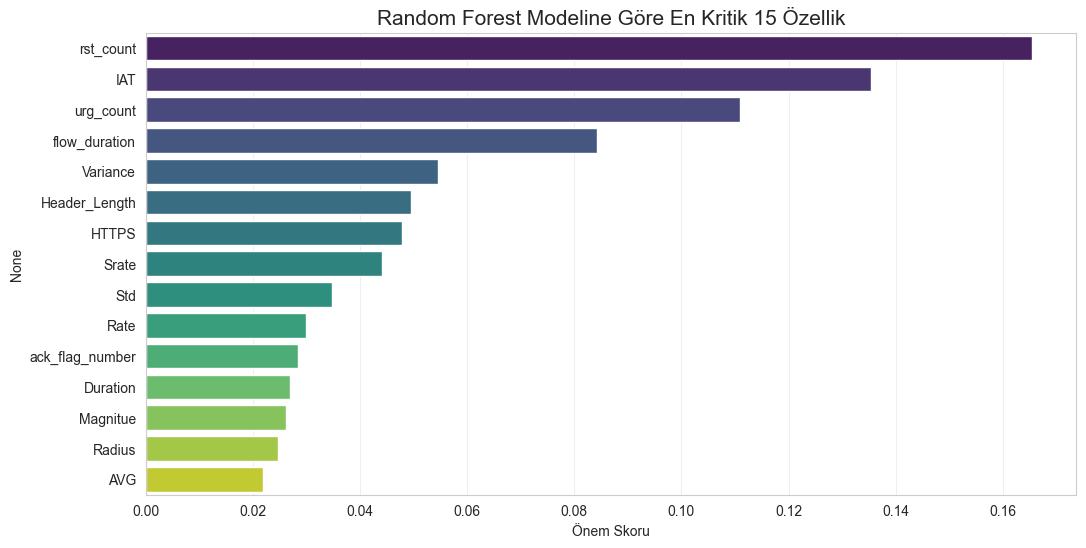


3. Confusion Matrix Çiziliyor...


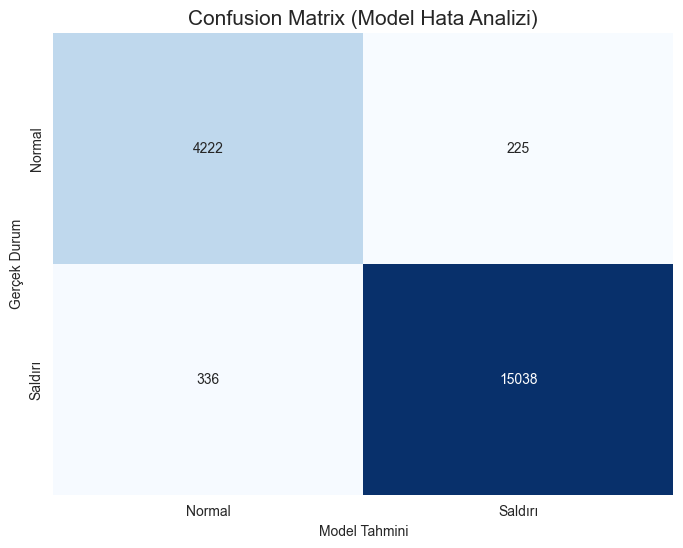


--- SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94      4447
     Saldırı       0.99      0.98      0.98     15374

    accuracy                           0.97     19821
   macro avg       0.96      0.96      0.96     19821
weighted avg       0.97      0.97      0.97     19821



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    source_col = 'label' if 'label' in df.columns else 'main_label'
    
    df['binary_group'] = df[source_col].apply(lambda x: 'Normal' if 'Benign' in str(x) or 'Normal' in str(x) else 'Attack')
    
    print("Sınıflandırma Grupları Oluşturuldu:")
    print(df['binary_group'].value_counts())

    X = df.select_dtypes(include=[np.number])
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'binary_group']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])
    
    X = X.fillna(0)
    
    y = df['binary_group'].apply(lambda x: 0 if x == 'Normal' else 1)

    print("\n1. PCA Analizi Yapılıyor (Boyut İndirgeme)...")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1], 
        hue=df['binary_group'],
        palette={'Normal': 'green', 'Attack': 'red'},
        alpha=0.6, s=15
    )
    plt.title('PCA Analizi: Normal vs Saldırı Trafiğinin Uzaysal Dağılımı', fontsize=15)
    plt.xlabel('1. Temel Bileşen (PC1)')
    plt.ylabel('2. Temel Bileşen (PC2)')
    plt.legend(title='Durum')
    plt.grid(True, alpha=0.3)
    plt.show()
    print("   > Yorum: Kümeler birbirinden uzaksa, modelin bunları ayırt etmesi kolay olacaktır.")

    print("\n2. Model Bazlı Öznitelik Önemi Hesaplanıyor...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=50, random_state=42)
    rf.fit(X_train, y_train)
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    top_n = 15
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices[:top_n]], y=X.columns[indices[:top_n]], palette='viridis')
    plt.title('Random Forest Modeline Göre En Kritik 15 Özellik', fontsize=15)
    plt.xlabel('Önem Skoru')
    plt.grid(True, axis='x', alpha=0.3)
    plt.show()

    print("\n3. Confusion Matrix Çiziliyor...")
    
    y_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Normal', 'Saldırı'], yticklabels=['Normal', 'Saldırı'])
    plt.title('Confusion Matrix (Model Hata Analizi)', fontsize=15)
    plt.ylabel('Gerçek Durum')
    plt.xlabel('Model Tahmini')
    plt.show()
    
    print("\n--- SINIFLANDIRMA RAPORU ---")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Saldırı']))

else:
    print("Dosya bulunamadı!")

TABULAR MODEL (HistGradientBoosting)

Model eğitimi için veri yükleniyor: dataset_output/ciciot2023_balanced2.csv
Eğitim Verisi: (79281, 44) (Satır x Sütun)
Test Verisi:   (19821, 44)

Tabular Model (HistGradientBoosting) Eğitiliyor...
Tahmin yapılıyor...

DOĞRULUK (Accuracy): %95.58

--- DETAYLI SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

  BruteForce       0.68      0.47      0.56        64
        DDoS       1.00      1.00      1.00      4521
         DoS       1.00      1.00      1.00      4575
       Mirai       1.00      1.00      1.00      2693
      Normal       0.90      0.97      0.93      4447
       Recon       0.88      0.81      0.84      1482
    Spoofing       0.92      0.82      0.86      1943
         Web       0.32      0.27      0.29        96

    accuracy                           0.96     19821
   macro avg       0.84      0.79      0.81     19821
weighted avg       0.96      0.96      0.95     19821



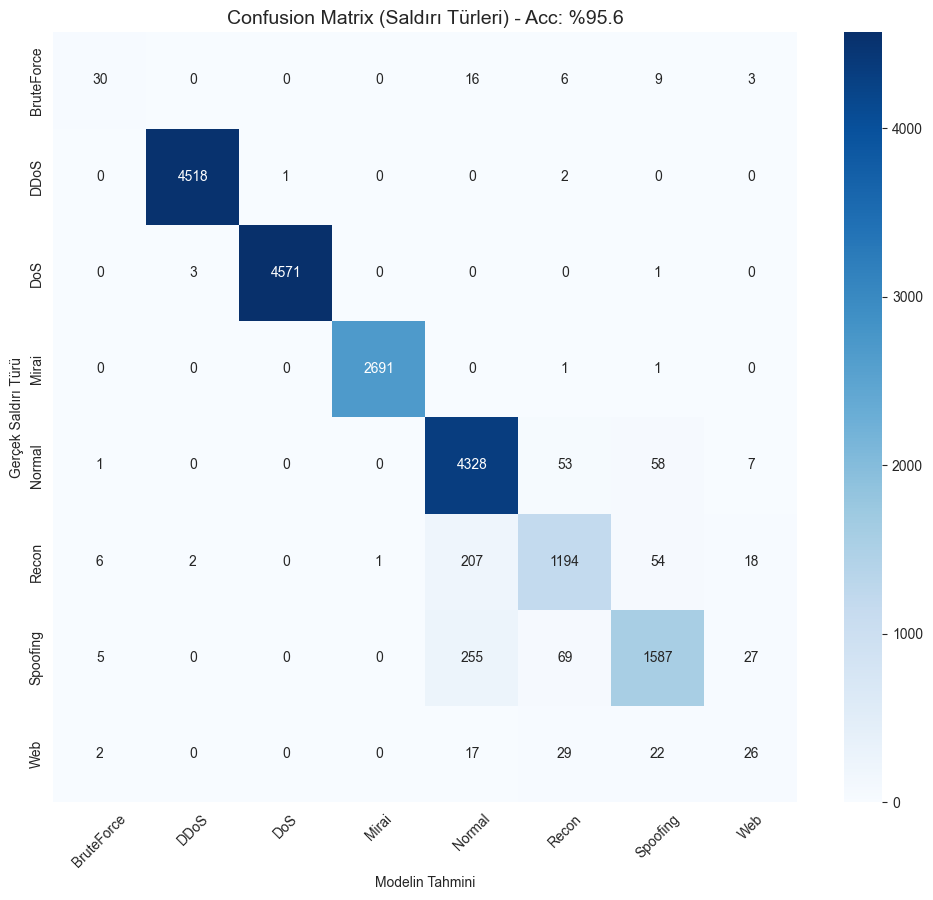

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"Model eğitimi için veri yükleniyor: {file_path}")
    df = pd.read_csv(file_path)

    if 'main_label' not in df.columns:
        def get_category(lbl):
            lbl = str(lbl)
            if 'Benign' in lbl or 'Normal' in lbl: return 'Normal'
            if 'DDoS' in lbl: return 'DDoS'
            if 'DoS' in lbl: return 'DoS'
            if 'Mirai' in lbl: return 'Mirai'
            if 'Brute' in lbl: return 'BruteForce'
            if 'Spoof' in lbl: return 'Spoofing'
            if 'Recon' in lbl: return 'Recon'
            if 'Web' in lbl: return 'Web'
            return 'Other'
        
        df['main_label'] = df['label'].apply(get_category)

    le = LabelEncoder()
    y = le.fit_transform(df['main_label'])
    target_names = le.classes_

    X = df.select_dtypes(include=[np.number])
    drop_cols = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target'] 
    X = X.drop(columns=[c for c in drop_cols if c in X.columns])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Eğitim Verisi: {X_train.shape} (Satır x Sütun)")
    print(f"Test Verisi:   {X_test.shape}")

    print("\nTabular Model (HistGradientBoosting) Eğitiliyor...")
    clf = HistGradientBoostingClassifier(max_iter=100, random_state=42)
    clf.fit(X_train, y_train)

    print("Tahmin yapılıyor...")
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nDOĞRULUK (Accuracy): %{acc*100:.2f}")

    print("\n--- DETAYLI SINIFLANDIRMA RAPORU ---")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix (Saldırı Türleri) - Acc: %{acc*100:.1f}', fontsize=14)
    plt.xlabel('Modelin Tahmini')
    plt.ylabel('Gerçek Saldırı Türü')
    plt.xticks(rotation=45)
    plt.show()

else:
    print("HATA: Veri dosyası bulunamadı!")

SHAP (XAI)

XAI Analizi için veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Model eğitiliyor (Random Forest)...

SHAP Değerleri Hesaplanıyor (Biraz zaman alabilir)...

Grafik 1: Beeswarm Plot Çiziliyor...


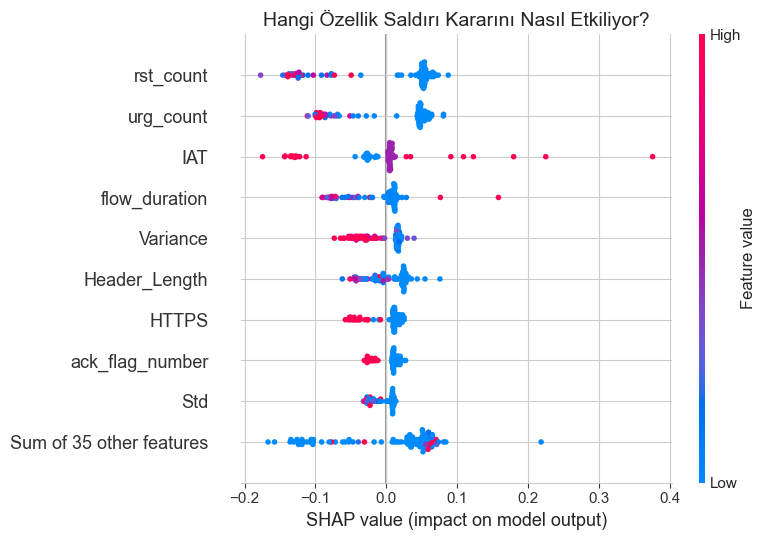


Grafik 2: Waterfall Plot Çiziliyor (Örnek Bir Saldırı İçin)...


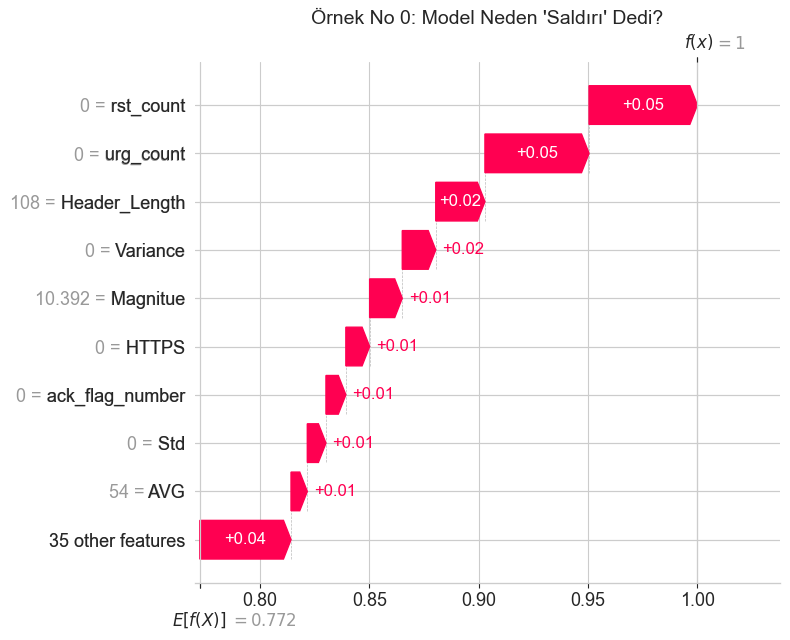

 > Yorum: Kırmızı barlar, kararı 'Saldırı' olmaya iten özelliklerdir.
 > Mavi barlar ise 'Normal' olmaya iten (engelleyici) özelliklerdir.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

file_paths = ['dataset_output/ciciot2023_balanced2.csv']
file_path = next((f for f in file_paths if os.path.exists(f)), None)

if file_path:
    print(f"XAI Analizi için veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    source_col = 'label' if 'label' in df.columns else 'main_label'
    df['binary_target'] = df[source_col].apply(lambda x: 0 if 'Benign' in str(x) or 'Normal' in str(x) else 1)
    
    y = df['binary_target']

    X = df.select_dtypes(include=[np.number])
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'binary_target', 'main_label']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])
    
    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Model eğitiliyor (Random Forest)...")
    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    print("\nSHAP Değerleri Hesaplanıyor (Biraz zaman alabilir)...")
    
    explainer = shap.TreeExplainer(model)
    
    X_sample = X_test.sample(n=100, random_state=42)
    
    shap_values = explainer(X_sample)

    print("\nGrafik 1: Beeswarm Plot Çiziliyor...")
    plt.figure()
    shap.plots.beeswarm(shap_values[:, :, 1], show=False)
    plt.title("Hangi Özellik Saldırı Kararını Nasıl Etkiliyor?", fontsize=14)
    plt.tight_layout()
    plt.show()

    print("\nGrafik 2: Waterfall Plot Çiziliyor (Örnek Bir Saldırı İçin)...")
    
    sample_preds = model.predict(X_sample)
    attack_indices = np.where(sample_preds == 1)[0]
    
    if len(attack_indices) > 0:
        idx = attack_indices[0] 
        
        plt.figure()
        shap.plots.waterfall(shap_values[idx, :, 1], show=False)
        plt.title(f"Örnek No {idx}: Model Neden 'Saldırı' Dedi?", fontsize=14)
        plt.tight_layout()
        plt.show()
        print(f" > Yorum: Kırmızı barlar, kararı 'Saldırı' olmaya iten özelliklerdir.")
        print(f" > Mavi barlar ise 'Normal' olmaya iten (engelleyici) özelliklerdir.")
    else:
        print("Örneklemde hiç saldırı bulunamadı, Waterfall çizilemiyor.")

else:
    print("Dosya bulunamadı! Lütfen dosya yolunu kontrol et.")

34 Sınıflı Sınıflandırma

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Tespit Edilen Sınıf Sayısı: 34
Sınıflar: ['Backdoor_Malware' 'BenignTraffic' 'BrowserHijacking' 'CommandInjection'
 'DDoS-ACK_Fragmentation'] ...
Model eğitiliyor (34 Sınıf)...
Model Doğruluğu: %94.54
Matris çiziliyor...


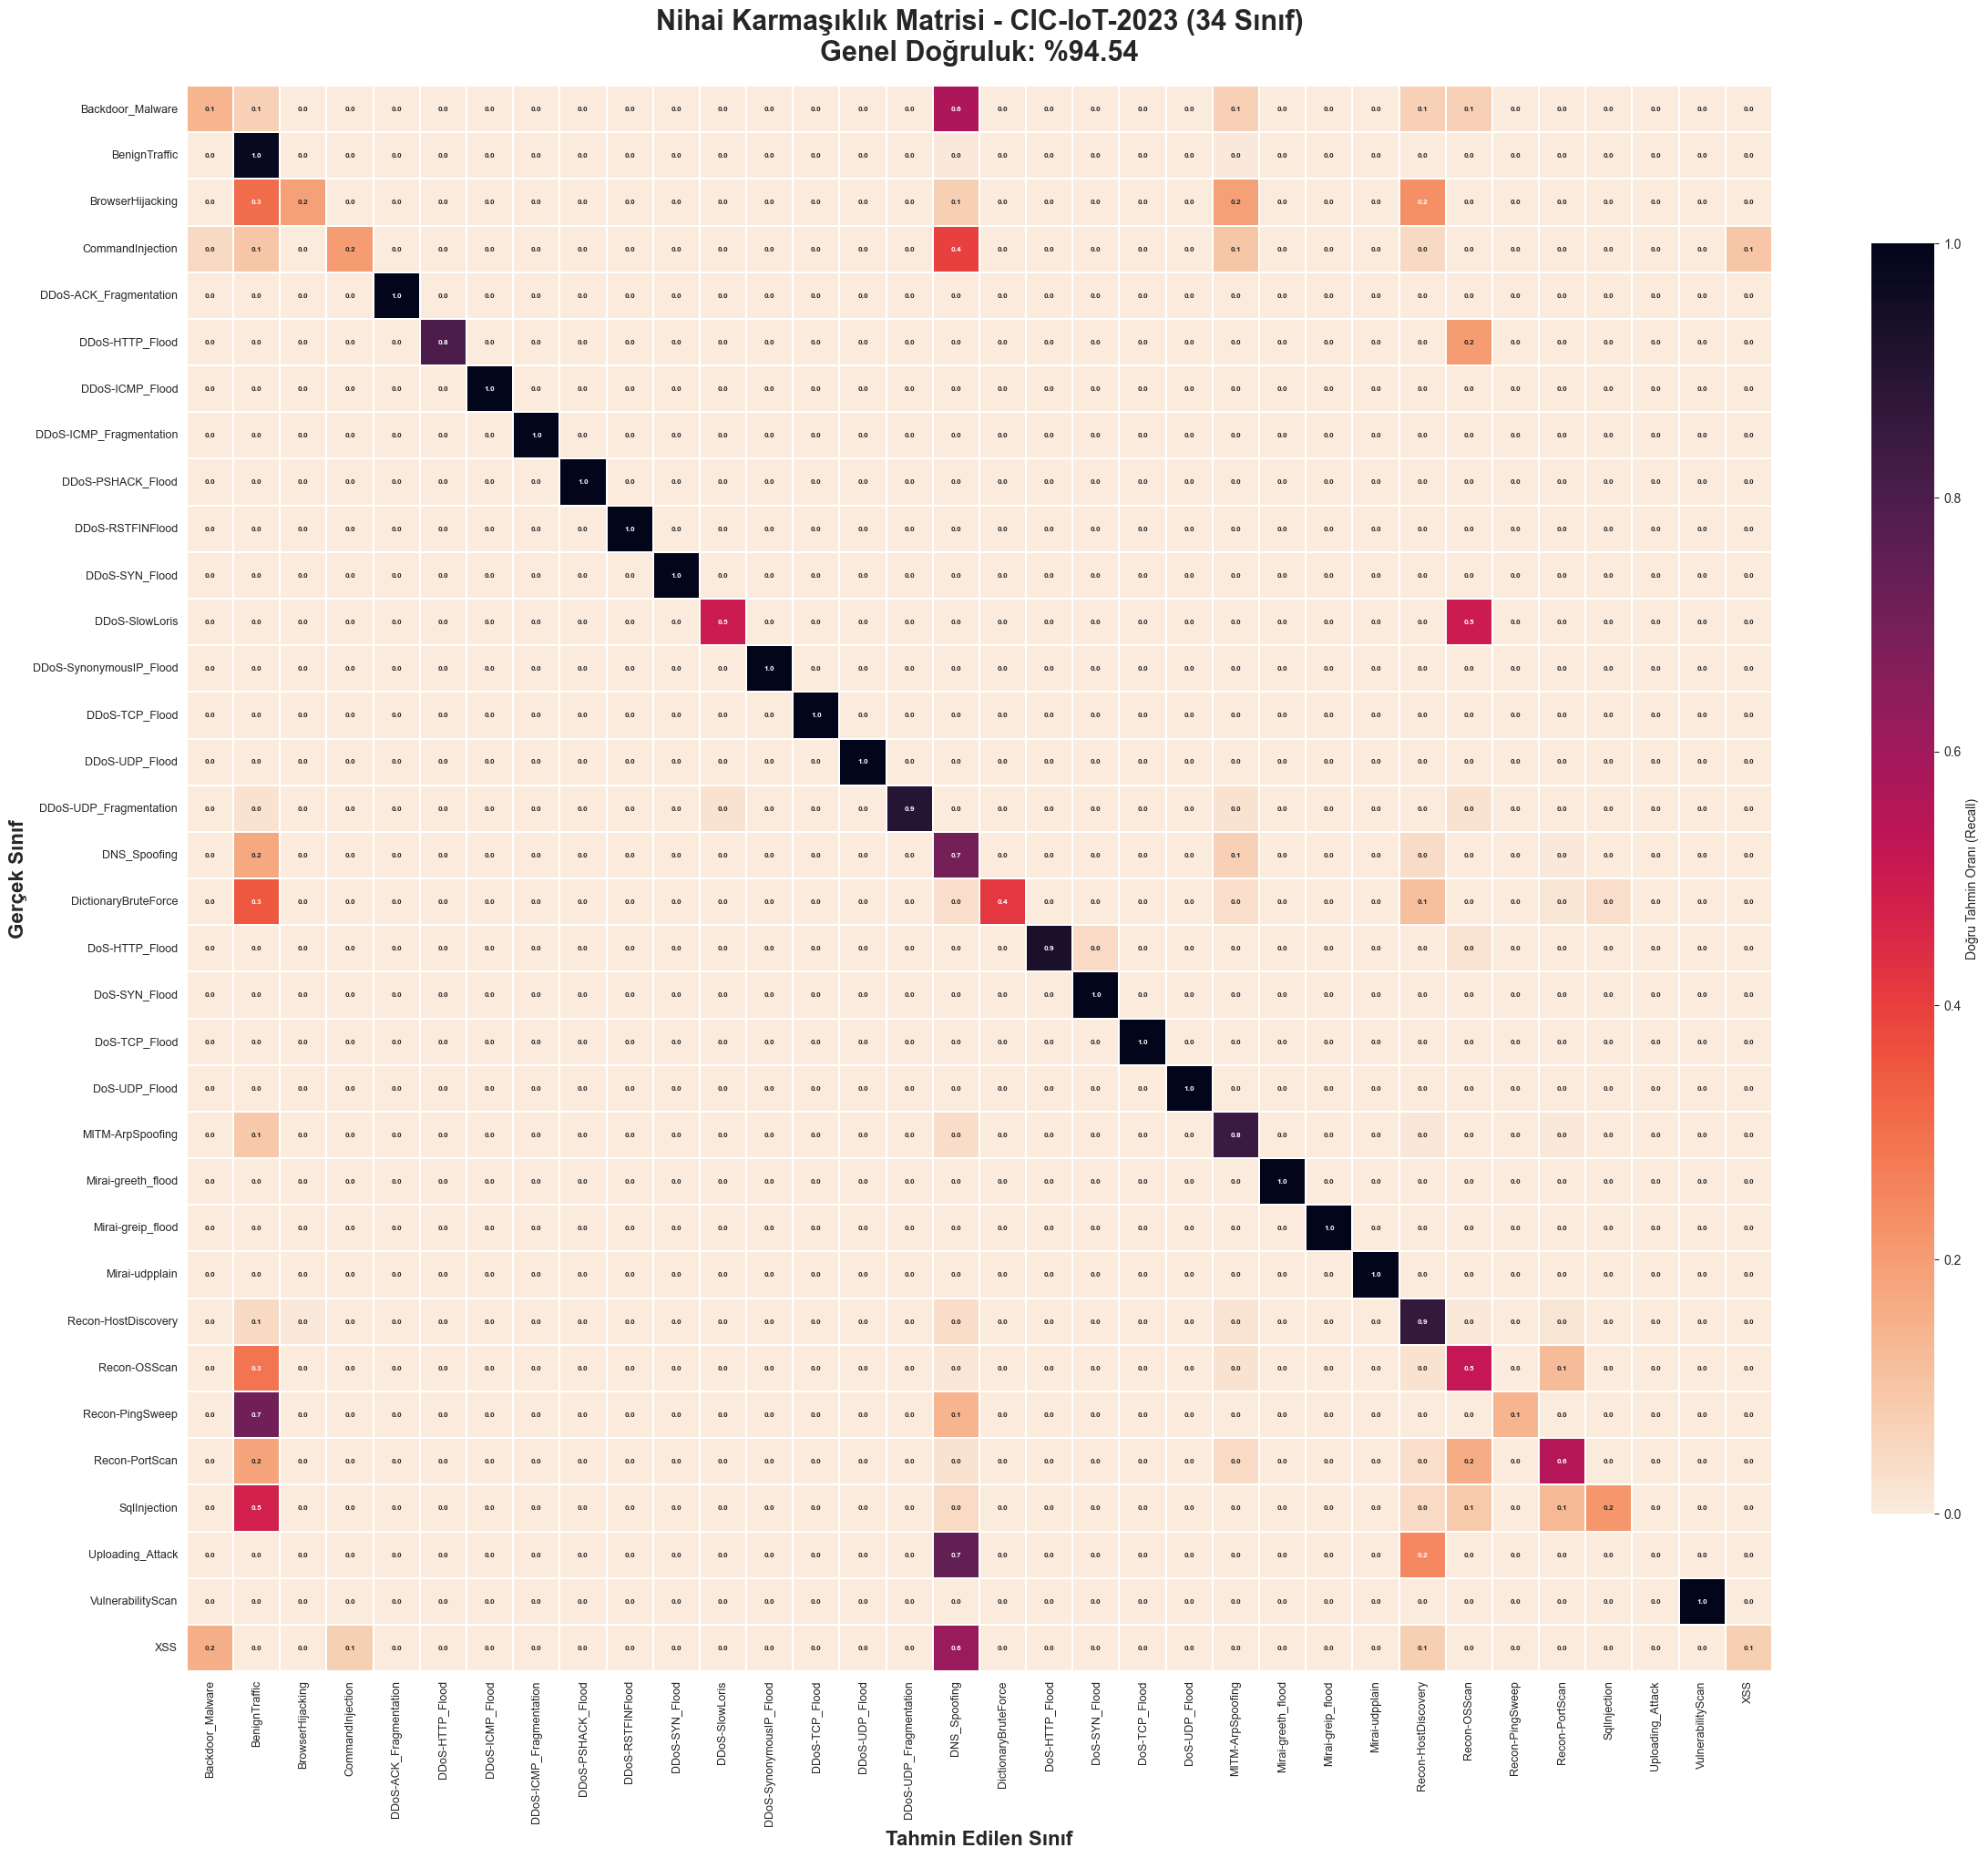

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'

if os.path.exists(file_path):
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)
    
    if 'label' not in df.columns:
        print("HATA: 'label' sütunu bulunamadı. 34 sınıf için bu sütun şart!")
    else:
        X = df.select_dtypes(include=[np.number])
        
        drop_cols = ['label', 'main_label', 'label_encoded', 'class_encoded'] 
        X = X.drop(columns=[c for c in drop_cols if c in X.columns])
        
        y_raw = df['label'] 

        le = LabelEncoder()
        y = le.fit_transform(y_raw)
        class_names = le.classes_ 
        
        print(f"Tespit Edilen Sınıf Sayısı: {len(class_names)}")
        print("Sınıflar:", class_names[:5], "...") 

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        print("Model eğitiliyor (34 Sınıf)...")
        model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Model Doğruluğu: %{acc*100:.2f}")

        print("Matris çiziliyor...")
        
        cm = confusion_matrix(y_test, y_pred)
        cm_sum = cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = cm.astype('float') / (cm_sum + 1e-10) 

        plt.figure(figsize=(24, 20)) 
        plt.title(f'Nihai Karmaşıklık Matrisi - CIC-IoT-2023 (34 Sınıf)\nGenel Doğruluk: %{acc*100:.2f}', 
                  fontsize=22, fontweight='bold', pad=20)

        sns.heatmap(cm_normalized, 
                    annot=True,
                    fmt='.1f', 
                    cmap='rocket_r', 
                    xticklabels=class_names, 
                    yticklabels=class_names,
                    square=True, 
                    linewidths=.1,
                    cbar_kws={"label": "Doğru Tahmin Oranı (Recall)", "shrink": .8},
                    annot_kws={"size": 6, "weight": "bold"}) 

        plt.xlabel('Tahmin Edilen Sınıf', fontsize=16, fontweight='bold')
        plt.ylabel('Gerçek Sınıf', fontsize=16, fontweight='bold')
        plt.xticks(rotation=90, fontsize=9)
        plt.yticks(rotation=0, fontsize=9)

        plt.tight_layout()
        plt.show()

else:
    print("Dosya bulunamadı.")

Veri seti yükleniyor...
Model eğitiliyor (34 Sınıf)...


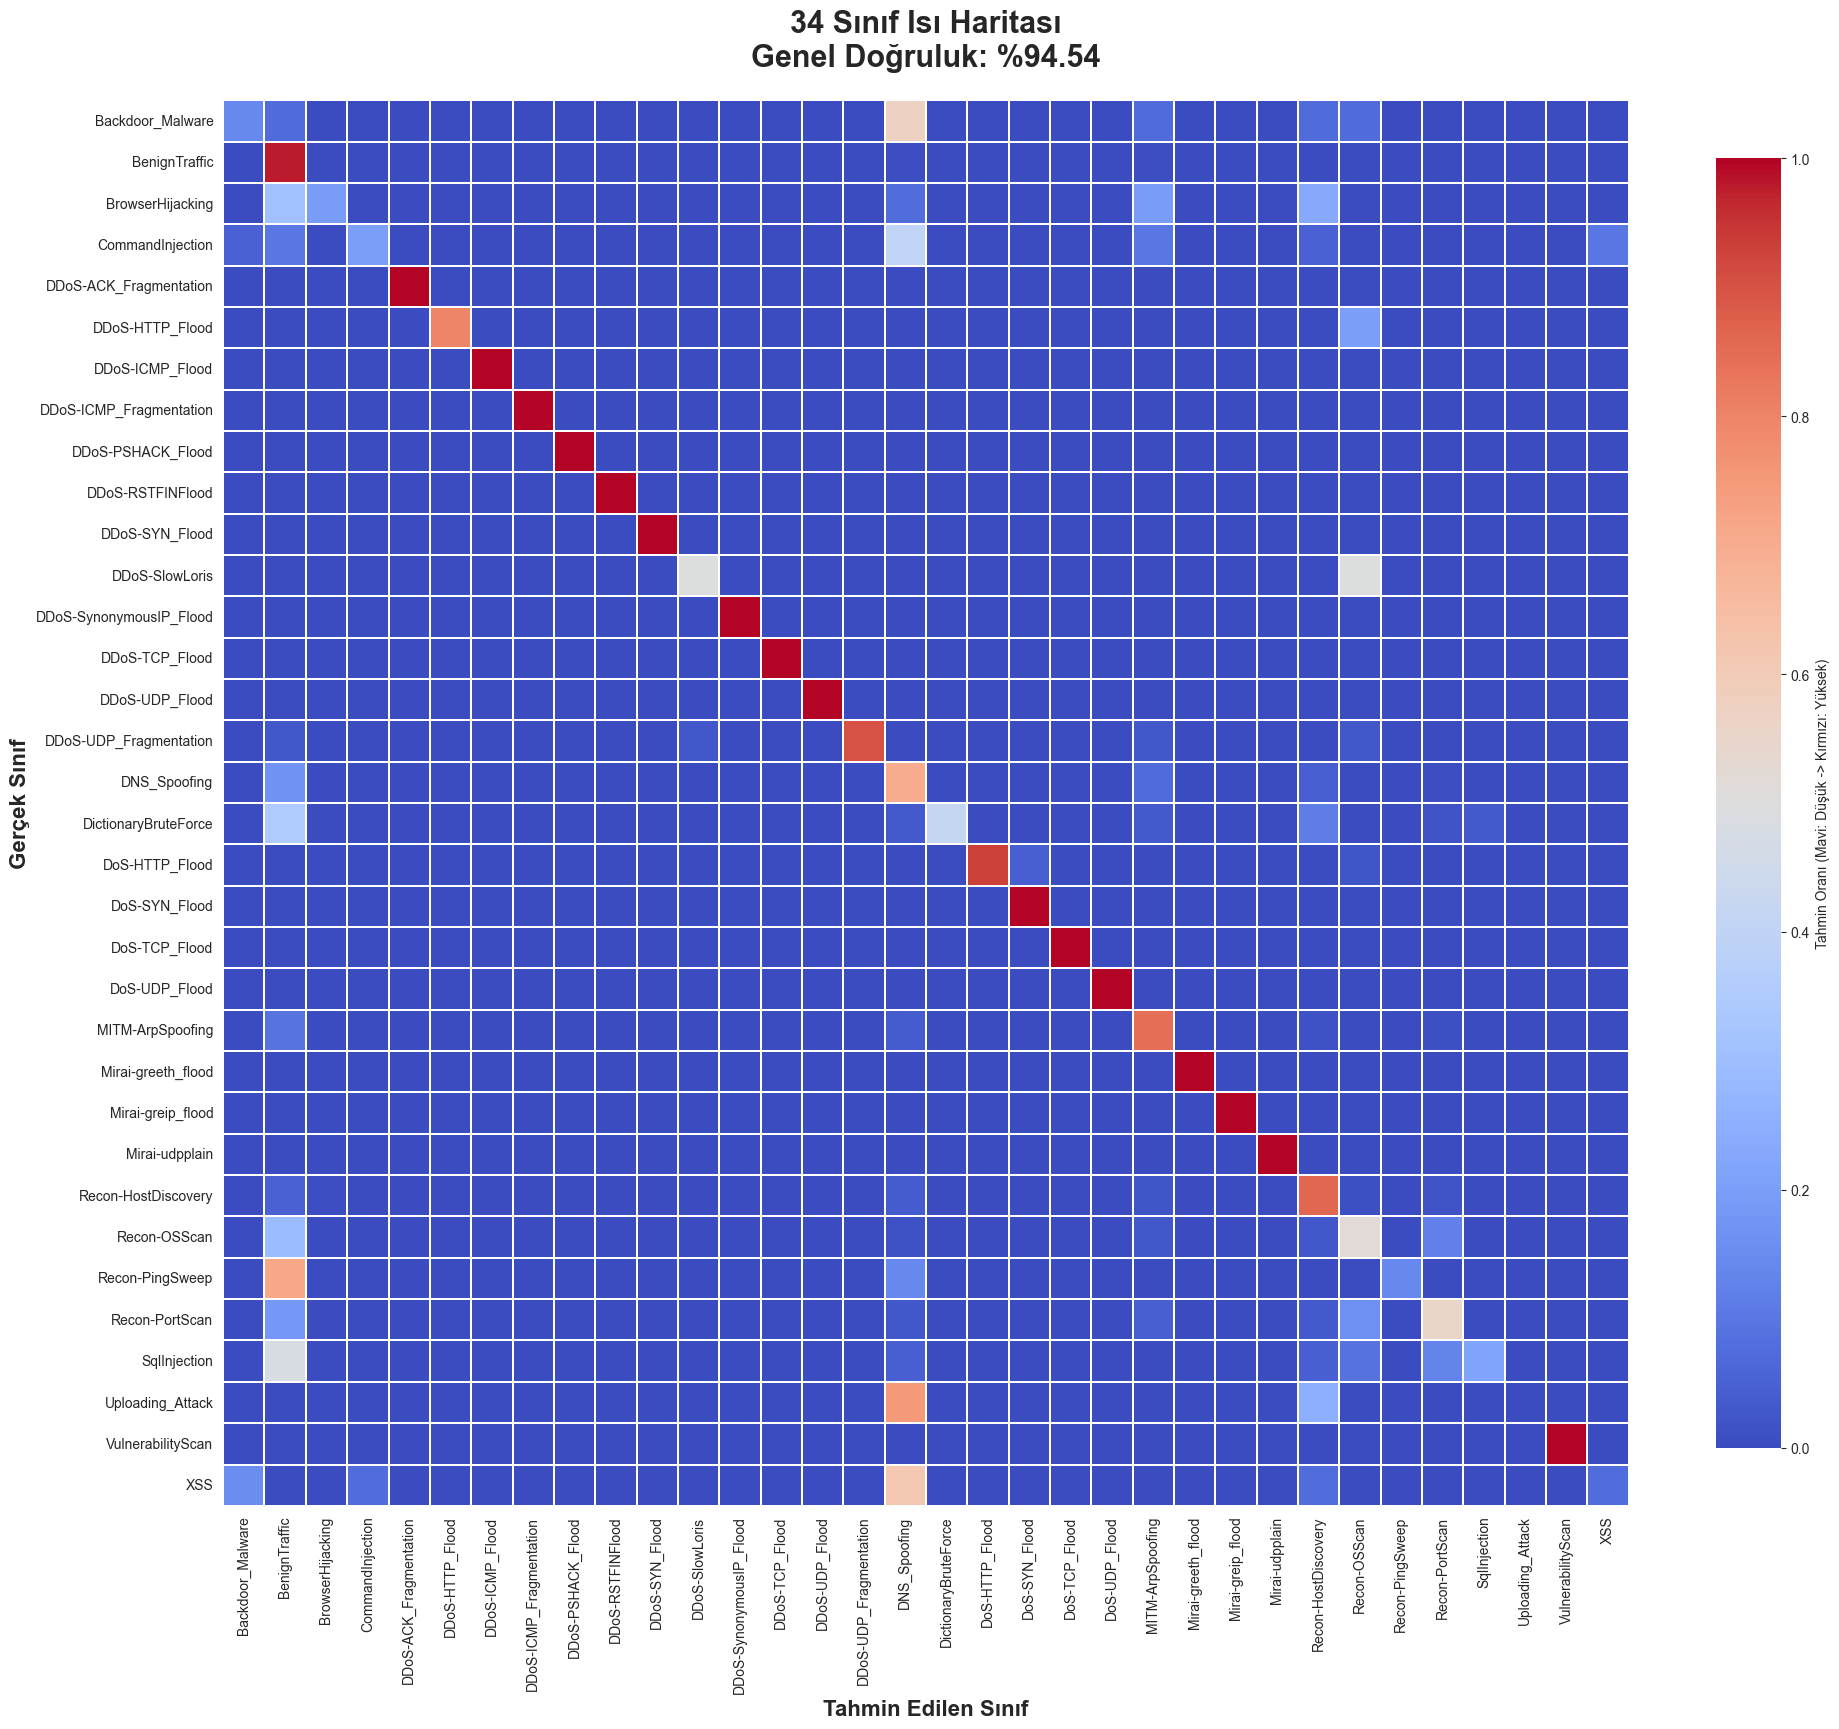

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'

if os.path.exists(file_path):
    print("Veri seti yükleniyor...")
    df = pd.read_csv(file_path)
    
    if 'label' in df.columns:
        X = df.select_dtypes(include=[np.number])
        drop_cols = ['label', 'main_label', 'label_encoded', 'class_encoded']
        X = X.drop(columns=[c for c in drop_cols if c in X.columns])
        
        y_raw = df['label']

        le = LabelEncoder()
        y = le.fit_transform(y_raw)
        class_names = le.classes_

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        print("Model eğitiliyor (34 Sınıf)...")
        model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)
        cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)

        plt.figure(figsize=(20, 18)) 
        plt.title(f'34 Sınıf Isı Haritası\nGenel Doğruluk: %{acc*100:.2f}', 
                  fontsize=22, fontweight='bold', pad=25)

        sns.heatmap(cm_normalized, 
                    annot=False,
                    cmap='coolwarm',      
                    xticklabels=class_names, 
                    yticklabels=class_names,
                    square=True, 
                    linewidths=0.1,       
                    cbar_kws={"label": "Tahmin Oranı (Mavi: Düşük -> Kırmızı: Yüksek)", "shrink": .8})

        plt.xlabel('Tahmin Edilen Sınıf', fontsize=16, fontweight='bold')
        plt.ylabel('Gerçek Sınıf', fontsize=16, fontweight='bold')

        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)

        plt.tight_layout()
        plt.show()
    else:
        print("HATA: 'label' sütunu bulunamadı!")
else:
    print("Dosya bulunamadı.")

AĞIRLIKLANDIRALIM

Veri yükleniyor...

Model 'Ağırlıklandırılmış' Modda Eğitiliyor...
Tahmin yapılıyor...

--- YENİ PERFORMANS RAPORU (Düşük Sınıflar İyileşti mi?) ---
                         precision    recall  f1-score   support

       Backdoor_Malware       0.50      0.10      0.17        10
          BenignTraffic       0.81      0.99      0.89      4447
       BrowserHijacking       0.50      0.08      0.14        24
       CommandInjection       1.00      0.40      0.57        20
 DDoS-ACK_Fragmentation       1.00      0.98      0.99        47
        DDoS-HTTP_Flood       1.00      0.33      0.50         3
        DDoS-ICMP_Flood       1.00      1.00      1.00       940
DDoS-ICMP_Fragmentation       1.00      1.00      1.00        51
      DDoS-PSHACK_Flood       1.00      1.00      1.00       567
       DDoS-RSTFINFlood       1.00      1.00      1.00       490
         DDoS-SYN_Flood       1.00      0.99      1.00       548
         DDoS-SlowLoris       0.00      0.00      0.00         2
DDoS-

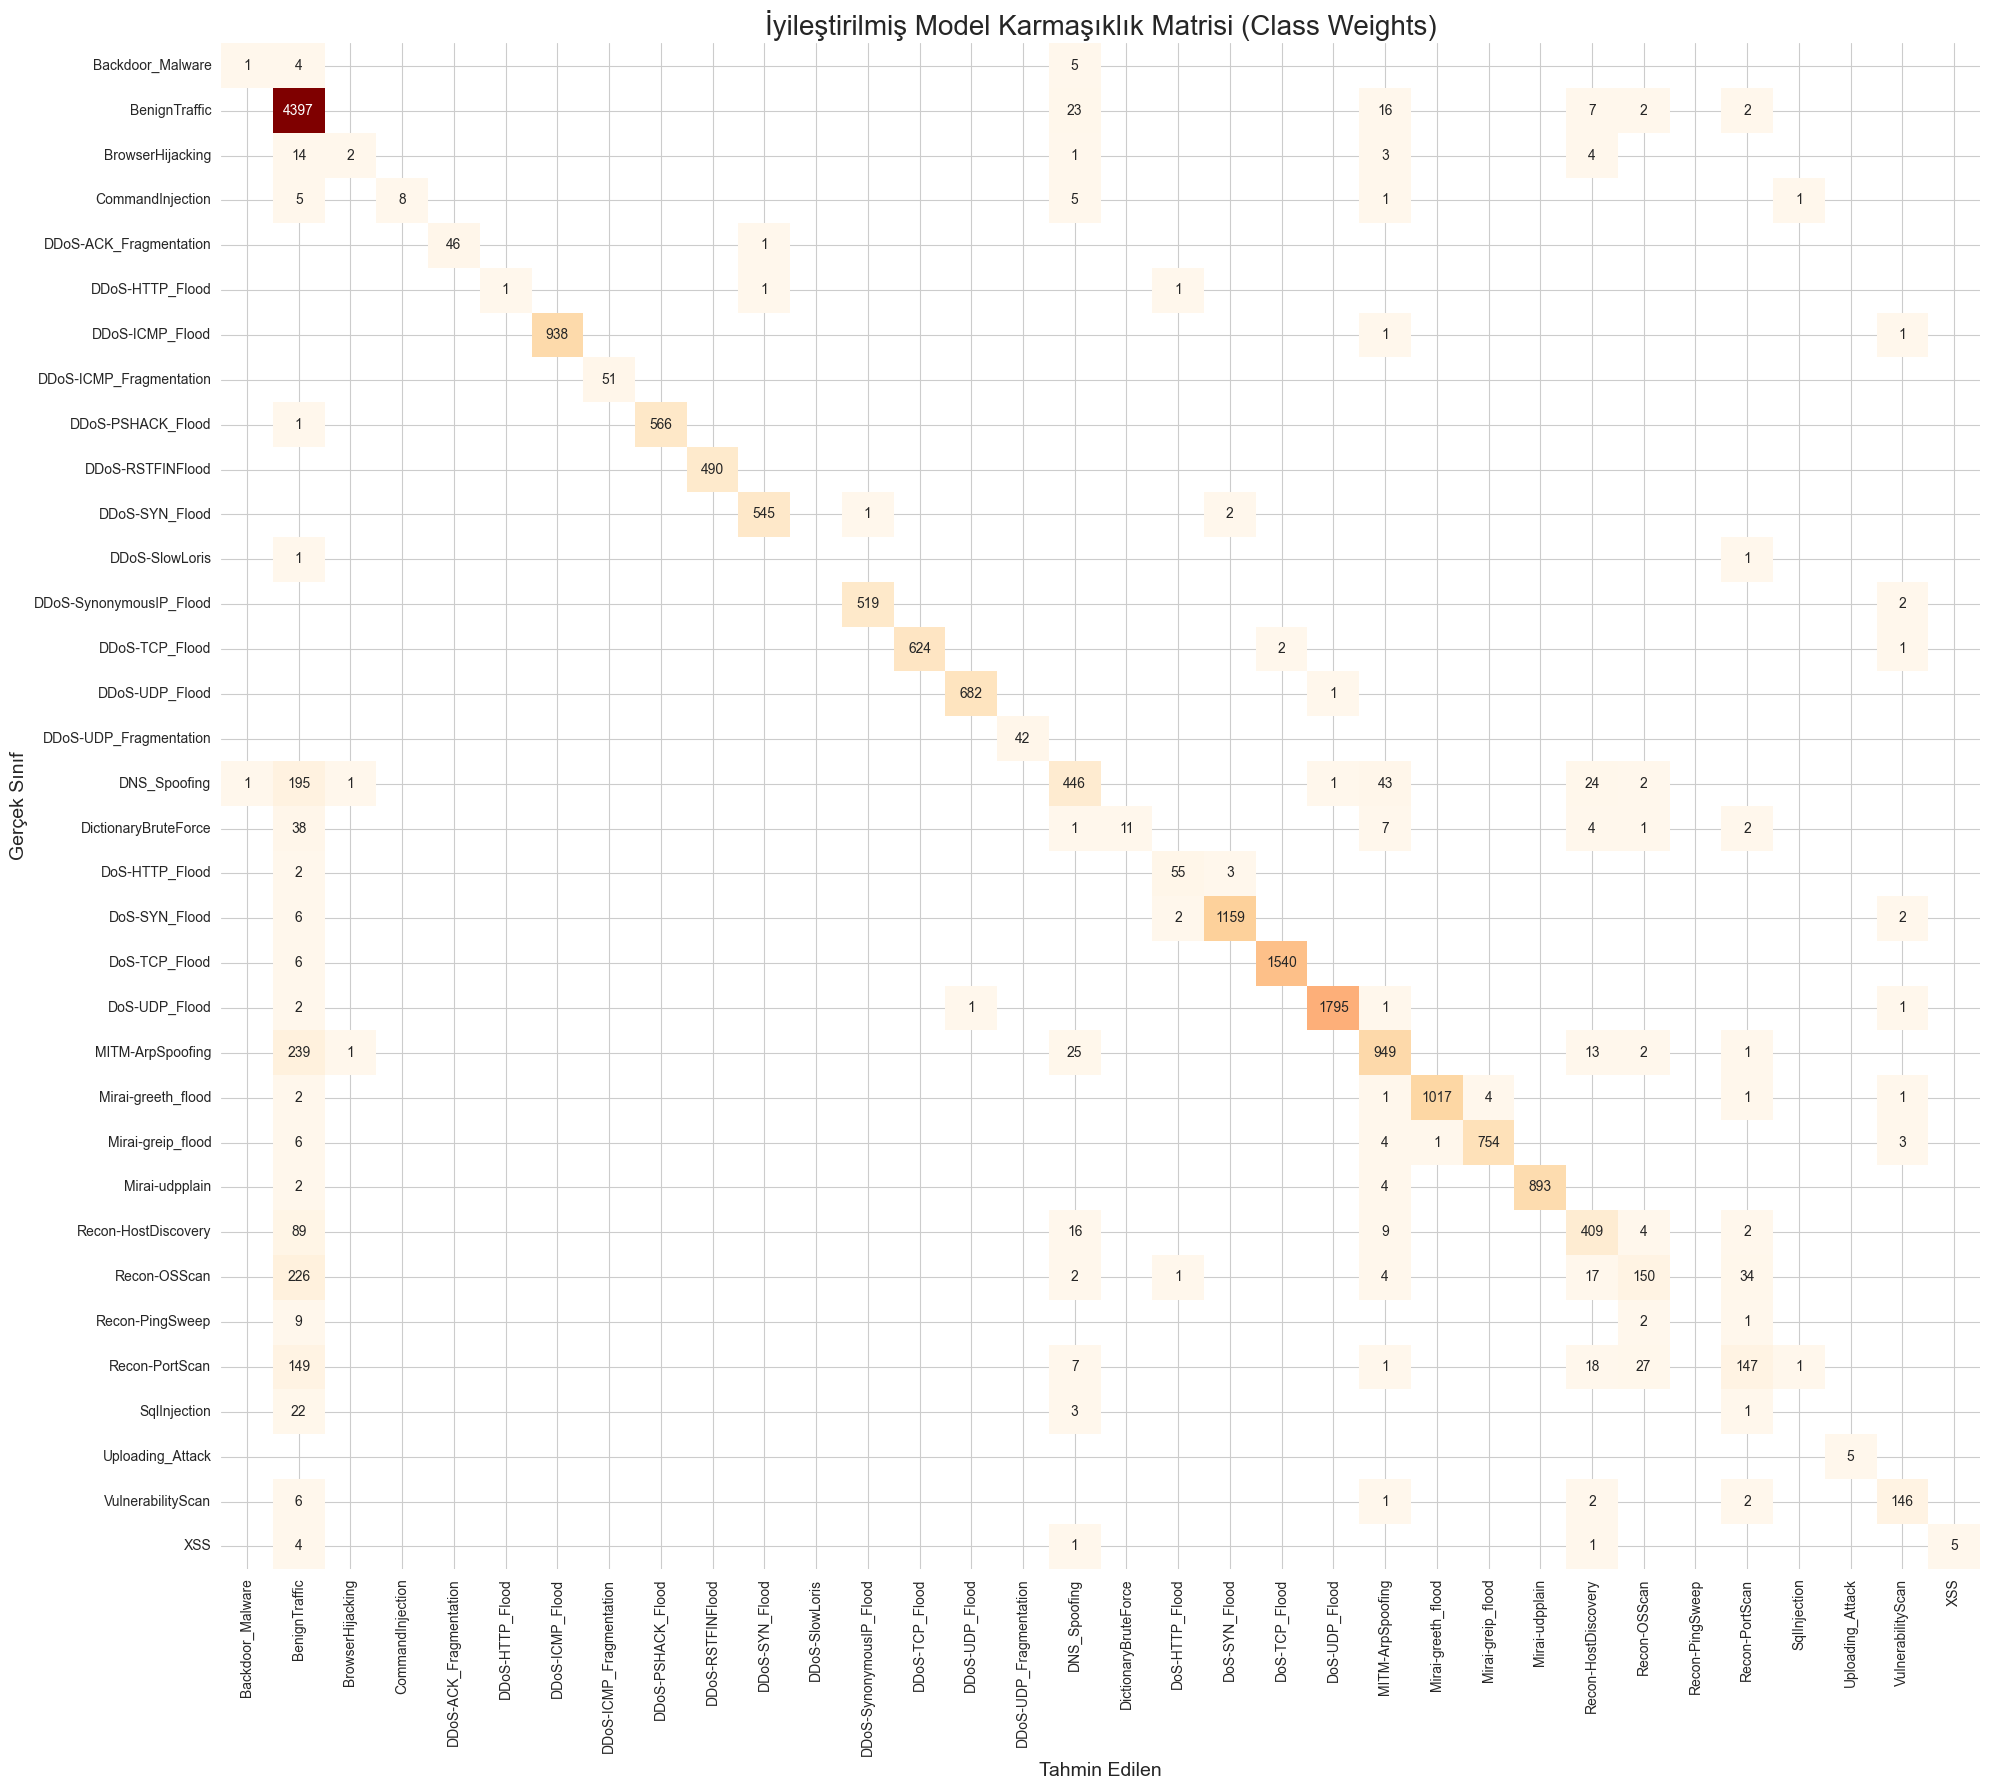

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if os.path.exists(file_path):
    print(f"Veri yükleniyor...")
    df = pd.read_csv(file_path)
    
    target_col = 'label'
    le = LabelEncoder()
    y = le.fit_transform(df[target_col])
    class_names = le.classes_
    
    X = df.select_dtypes(include=[np.number])
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nModel 'Ağırlıklandırılmış' Modda Eğitiliyor...")
    
    rf = RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced', 
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    
    print("Tahmin yapılıyor...")
    y_pred = rf.predict(X_test)
    
    print("\n--- YENİ PERFORMANS RAPORU (Düşük Sınıflar İyileşti mi?) ---")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(20, 18))
    
    mask = (cm == 0)
    
    sns.heatmap(cm, annot=True, fmt='d', mask=mask, cmap='OrRd', 
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    
    plt.title('İyileştirilmiş Model Karmaşıklık Matrisi (Class Weights)', fontsize=20)
    plt.xlabel('Tahmin Edilen', fontsize=14)
    plt.ylabel('Gerçek Sınıf', fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Veri bulunamadı.")

SMOTE ile Sentetik Veri Üretimi

Veri yükleniyor...
Orijinal Eğitim Seti Boyutu: (79281, 44)

SMOTE ile Sentetik Veri Üretiliyor (Biraz zaman alabilir)...
SMOTE Sonrası Eğitim Seti Boyutu: (613258, 44)
Artık her sınıftan binlerce örnek var!

Model Eğitiliyor (SMOTE'lu Veri İle)...
Tahmin yapılıyor...

--- SMOTE SONRASI PERFORMANS RAPORU ---
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        10
          BenignTraffic       0.88      0.96      0.92      4447
       BrowserHijacking       0.50      0.08      0.14        24
       CommandInjection       0.90      0.45      0.60        20
 DDoS-ACK_Fragmentation       1.00      1.00      1.00        47
        DDoS-HTTP_Flood       1.00      0.33      0.50         3
        DDoS-ICMP_Flood       1.00      1.00      1.00       940
DDoS-ICMP_Fragmentation       1.00      1.00      1.00        51
      DDoS-PSHACK_Flood       1.00      1.00      1.00       567
       DDoS-RSTFINFlood       1.00     

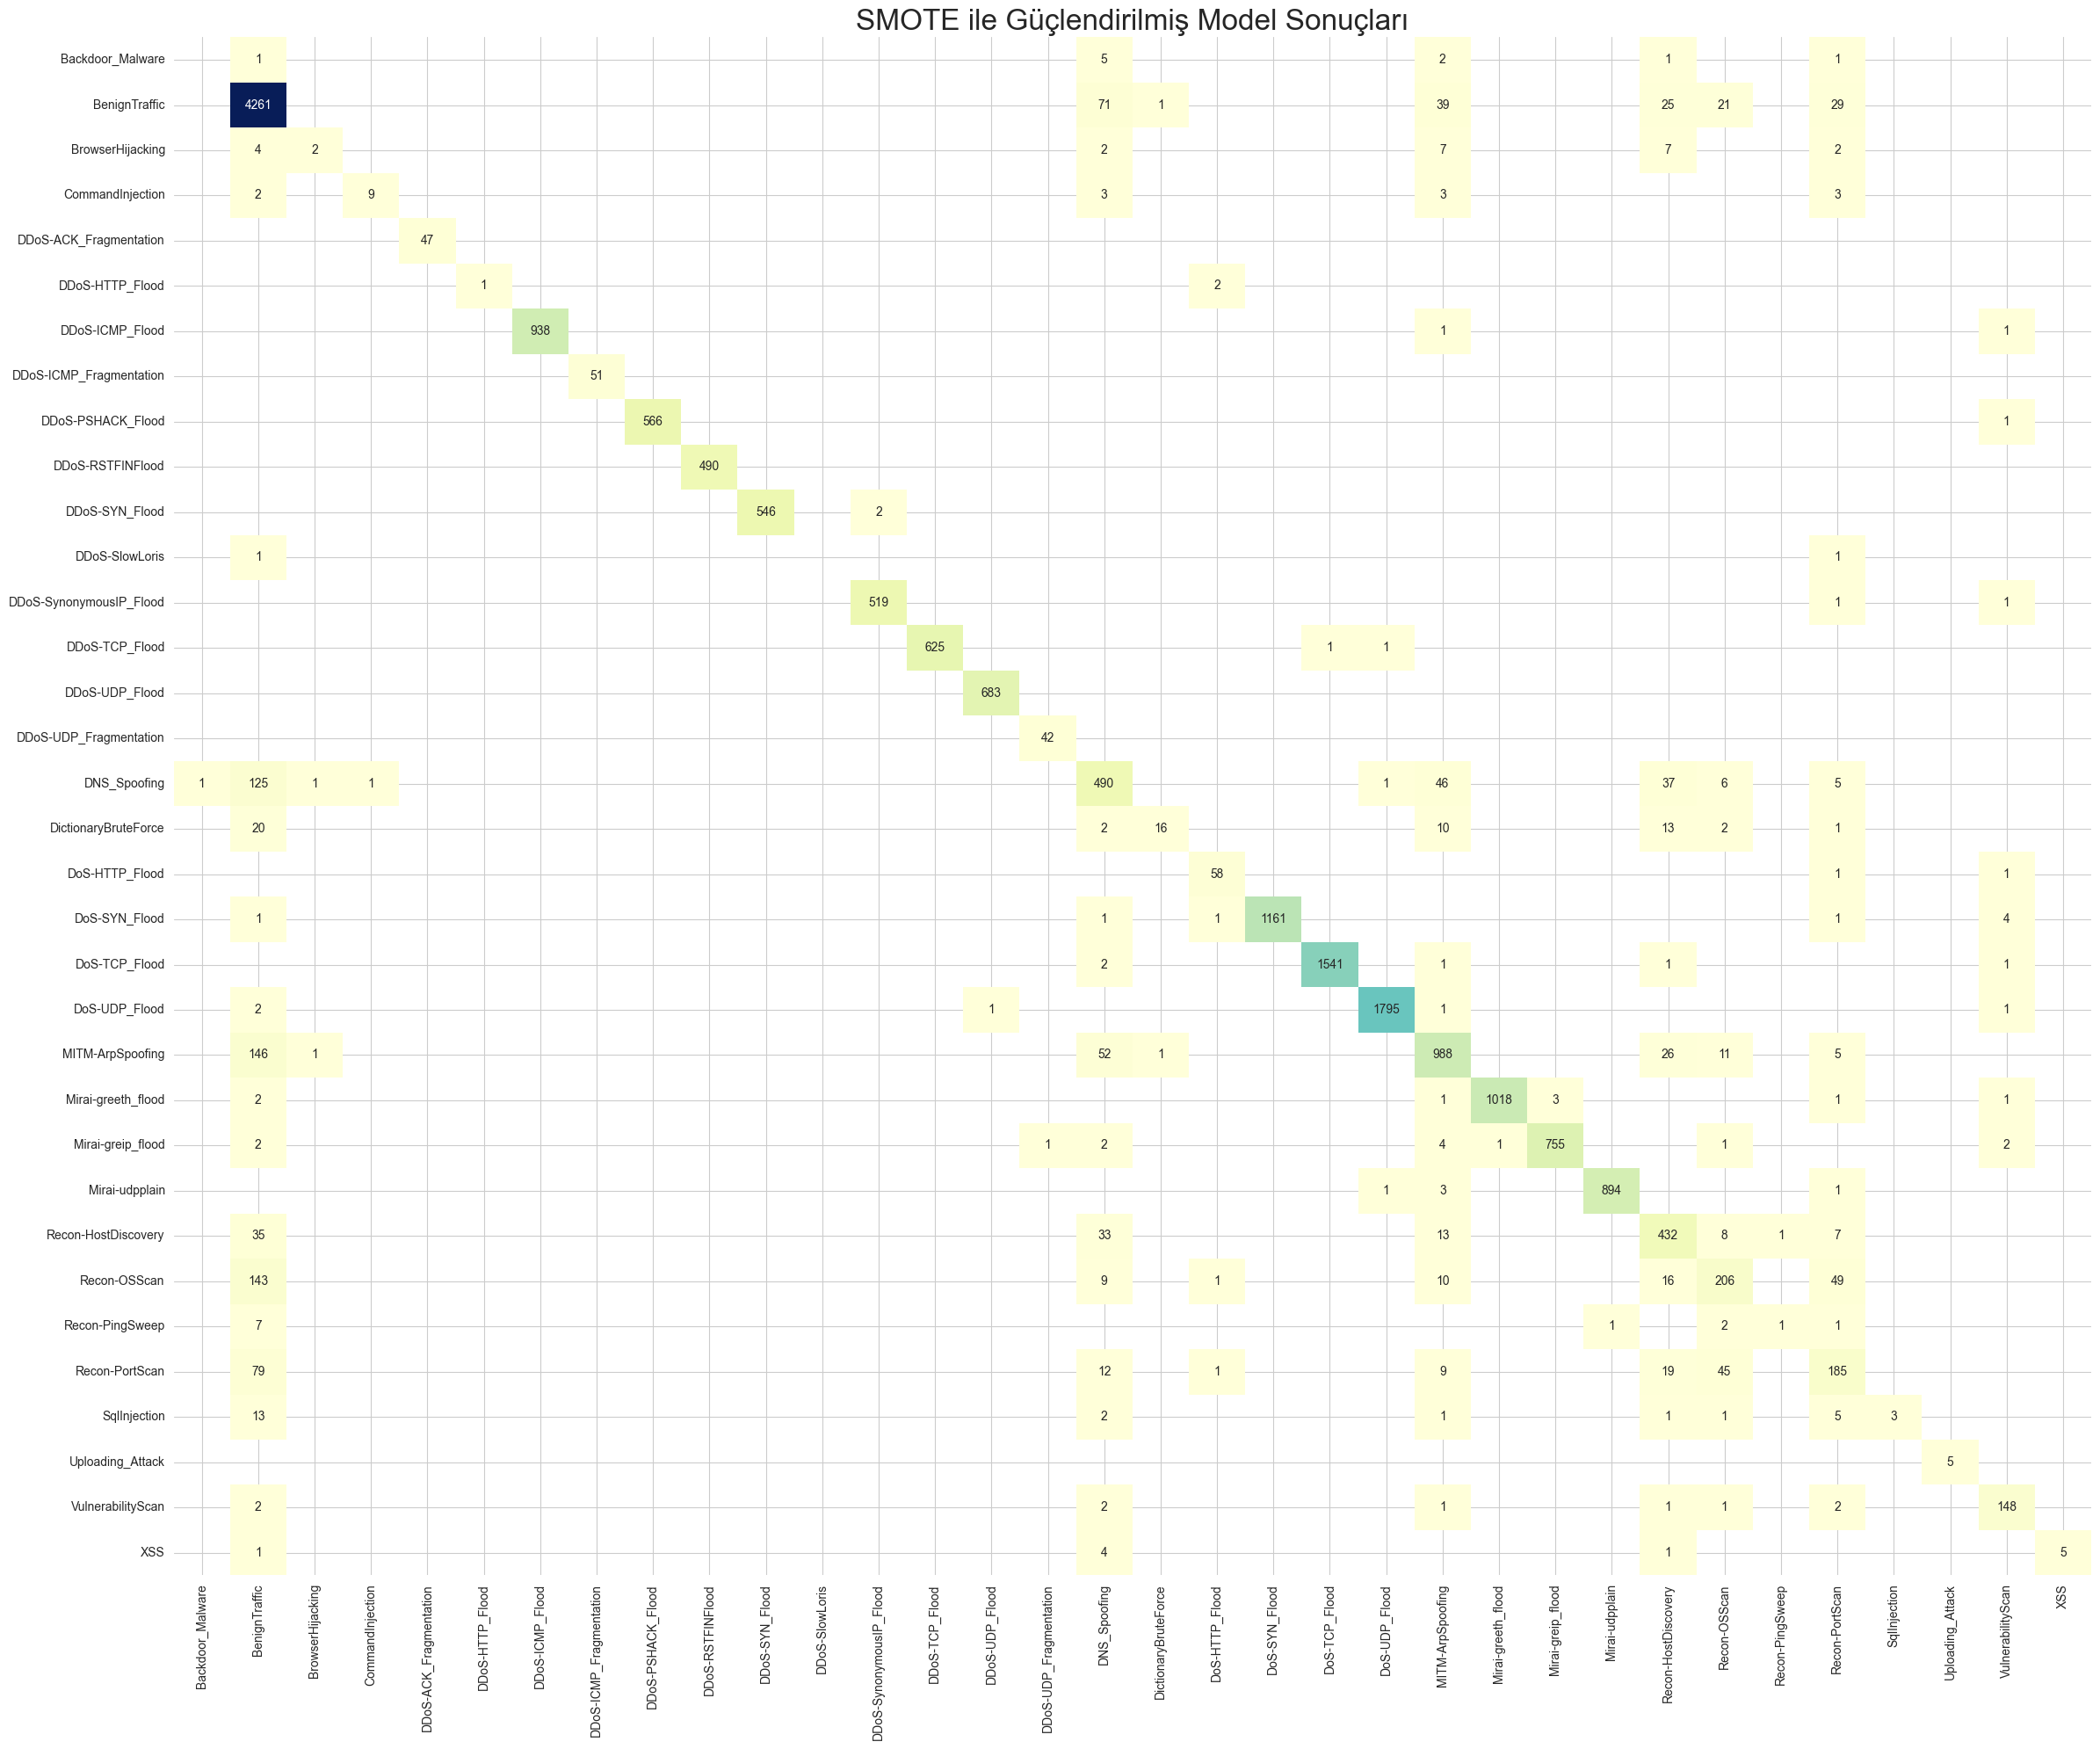

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if os.path.exists(file_path):
    print("Veri yükleniyor...")
    df = pd.read_csv(file_path)
    
    target_col = 'label'
    le = LabelEncoder()
    y = le.fit_transform(df[target_col])
    class_names = le.classes_
    
    X = df.select_dtypes(include=[np.number])
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])
    
    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Orijinal Eğitim Seti Boyutu: {X_train.shape}")
    
    print("\nSMOTE ile Sentetik Veri Üretiliyor (Biraz zaman alabilir)...")
    smote = SMOTE(k_neighbors=1, random_state=42) 
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    print(f"SMOTE Sonrası Eğitim Seti Boyutu: {X_train_smote.shape}")
    print("Artık her sınıftan binlerce örnek var!")

    print("\nModel Eğitiliyor (SMOTE'lu Veri İle)...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train_smote, y_train_smote)
    
    print("Tahmin yapılıyor...")
    y_pred = rf.predict(X_test)
    
    print("\n--- SMOTE SONRASI PERFORMANS RAPORU ---")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(24, 20))
    mask = (cm == 0)
    sns.heatmap(cm, annot=True, fmt='d', mask=mask, cmap='YlGnBu', 
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title('SMOTE ile Güçlendirilmiş Model Sonuçları', fontsize=24)
    plt.tight_layout()
    plt.show()

else:
    print("Veri bulunamadı.")

Specialist Model (SlowLoris)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

[?] Sütunlar analiz ediliyor...
   -> Süre Sütunu Bulundu: 'flow_duration'
   -> Paket/Boyut Sütunu Bulundu: 'Header_Length'

[+] Yeni Özellik Ekleniyor: 'Silent_Rate'...

Analiz: 'DDoS-SlowLoris' vs 'BenignTraffic'
Normal Trafik Ortalama Silent_Rate:  0.0014
Saldırı Trafik Ortalama Silent_Rate: 0.0038

Model Eğitiliyor...
SMOTE uygulanıyor...
SMOTE Sonrası Eğitim Seti Boyutu: (31476, 45)

--- SONUÇ RAPORU ---
                precision    recall  f1-score   support

 BenignTraffic       1.00      1.00      1.00      6746
DDoS-SlowLoris       0.00      0.00      0.00         3

      accuracy                           1.00      6749
     macro avg       0.50      0.50      0.50      6749
  weighted avg       1.00      1.00      1.00      6749



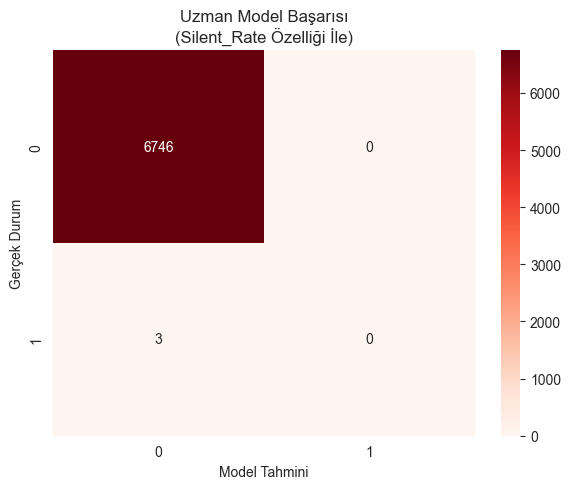

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

if os.path.exists(file_path):
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    print("\n[?] Sütunlar analiz ediliyor...")
    
    possible_durations = ['flow_duration', 'Flow Duration', 'Duration', 'duration']
    col_duration = next((c for c in df.columns if c in possible_durations), None)
    
    possible_packets = ['tot_fwd_pkts', 'Total Fwd Packets', 'Tot Fwd Pkts', 'fwd_pkts_tot', 'Header_Length', 'Tot sum']
    col_packet = next((c for c in df.columns if c in possible_packets), None)
    
    if col_duration and col_packet:
        print(f"   -> Süre Sütunu Bulundu: '{col_duration}'")
        print(f"   -> Paket/Boyut Sütunu Bulundu: '{col_packet}'")
        
        print("\n[+] Yeni Özellik Ekleniyor: 'Silent_Rate'...")
        df['Silent_Rate'] = df[col_duration] / (df[col_packet] + 1)
    else:
        print("\n[!] HATA: Gerekli sütunlar (Süre veya Paket Sayısı) bulunamadı!")
        print(f"Mevcut sütunlar: {df.columns.tolist()[:20]}...") 
        df['Silent_Rate'] = 0 

    if 'label' in df.columns:
        lbl_col = 'label'
    elif 'main_label' in df.columns:
        lbl_col = 'main_label'
    else:
        lbl_col = df.columns[-1] 

    target_attack = 'DDoS-SlowLoris'
    normal_label = 'BenignTraffic'
    
    if normal_label not in df[lbl_col].unique():
        for candidate in ['Benign', 'Normal', 'BenignTraffic']:
            if candidate in df[lbl_col].unique():
                normal_label = candidate
                break

    print(f"\nAnaliz: '{target_attack}' vs '{normal_label}'")

    if target_attack in df[lbl_col].unique():
        df_spec = df[df[lbl_col].isin([normal_label, target_attack])].copy()
        y = df_spec[lbl_col].apply(lambda x: 1 if x == target_attack else 0)
    else:
        print(f"UYARI: '{target_attack}' veride yok! Genel 'Attack' analizi yapılacak.")
        df_spec = df.copy()
        df_spec['is_attack'] = df_spec[lbl_col].apply(lambda x: 0 if x == normal_label else 1)
        y = df_spec['is_attack']

    if 'Silent_Rate' in df_spec.columns:
        mean_normal = df_spec[y == 0]['Silent_Rate'].mean()
        mean_attack = df_spec[y == 1]['Silent_Rate'].mean()
        print(f"Normal Trafik Ortalama Silent_Rate:  {mean_normal:.4f}")
        print(f"Saldırı Trafik Ortalama Silent_Rate: {mean_attack:.4f}")

    print(f"\nModel Eğitiliyor...")
    
    X = df_spec.select_dtypes(include=[np.number])
    cols_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded', 'is_attack', 'label', 'main_label']
    X = X.drop(columns=[c for c in cols_drop if c in X.columns], errors='ignore')
    
    X = X.fillna(0) 

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    except ValueError:
        print("UYARI: Stratify yapılamadı (Sınıf örnek sayısı çok az). Rastgele ayrılıyor.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print("SMOTE uygulanıyor...")
    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
        print(f"SMOTE Sonrası Eğitim Seti Boyutu: {X_train_sm.shape}")
    except Exception as e:
        print(f"SMOTE Hatası (Veri çok yetersiz): {e}")
        X_train_sm, y_train_sm = X_train, y_train

    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf.fit(X_train_sm, y_train_sm)

    y_pred = rf.predict(X_test)

    print("\n--- SONUÇ RAPORU ---")
    try:
        print(classification_report(y_test, y_pred, target_names=[normal_label, target_attack], zero_division=0))
    except:
        print(classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Uzman Model Başarısı\n(Silent_Rate Özelliği İle)')
    plt.ylabel('Gerçek Durum')
    plt.xlabel('Model Tahmini')
    plt.tight_layout()
    plt.show()

else:
    print(f"HATA: '{file_path}' dosyası bulunamadı.")

TABULAR TRANSFORMER MODELİ

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Eğitim Verisi Şekli: (79281, 44, 1)
Sınıf Sayısı: 34


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 44, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 44, 1)     │      1,793 │ input_layer_6[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 44, 1)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 44, 1)     │          2 │ dropout_7[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 44, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 44, 64)    │        128 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 44, 64)    │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 44, 1)     │         65 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 44, 1)     │          2 │ conv1d_3[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 44, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 44, 1)     │      1,793 │ add_1[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 44, 1)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 44, 1)     │          2 │ dropout_10[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 44, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 44, 64)    │        128 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 44, 64)    │          0 │ conv1d_4[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 44, 1)     │         65 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 44, 1)     │          2 │ conv1d_5[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 44, 1)     │          0 │ layer_normalizat

 Total params: 8,622 (33.68 KB)

 Trainable params: 8,622 (33.68 KB)

 Non-trainable params: 0 (0.00 B)


--- TRANSFORMER EĞİTİLİYOR (GPU/CPU) ---
Epoch 1/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 69s 63ms/step - accuracy: 0.2964 - loss: 2.4622 - val_accuracy: 0.2959 - val_loss: 2.1943
Epoch 2/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.3427 - loss: 2.1970 - val_accuracy: 0.3668 - val_loss: 2.0867
Epoch 3/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.3709 - loss: 2.1430 - val_accuracy: 0.3944 - val_loss: 2.0416
Epoch 4/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.3743 - loss: 2.1127 - val_accuracy: 0.4111 - val_loss: 2.0233
Epoch 5/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.3779 - loss: 2.0880 - val_accuracy: 0.3869 - val_loss: 2.0025
Epoch 6/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.3797 - loss: 2.0725 - val_accuracy: 0.3878 - val_loss: 1.9737
Epoch 7/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.3812 - loss: 2.0534 - val_accuracy: 0.3892 - val_loss: 1.9663
Epoch 8/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms

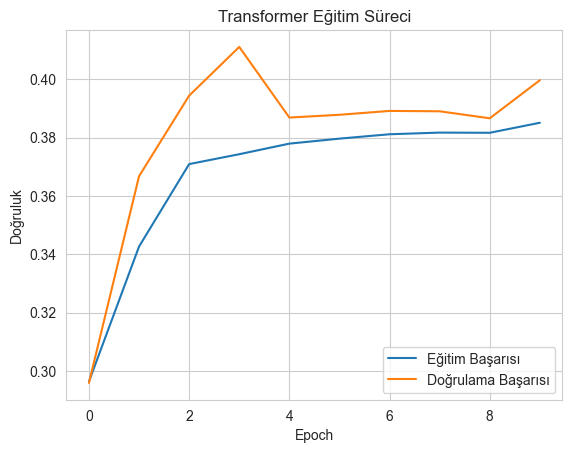

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

target_col = 'label' 
if target_col not in df.columns: target_col = 'main_label'

le = LabelEncoder()
y = le.fit_transform(df[target_col])
num_classes = len(le.classes_)
class_names = le.classes_

X = df.select_dtypes(include=[np.number])
cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Eğitim Verisi Şekli: {X_train_reshaped.shape}")
print(f"Sınıf Sayısı: {num_classes}")

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=64, dropout=0.1)
    
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=64, dropout=0.1)
    
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    
    return keras.Model(inputs, outputs)

model = build_model(input_shape=(X_train_reshaped.shape[1], 1), n_classes=num_classes)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

print("\n--- TRANSFORMER EĞİTİLİYOR (GPU/CPU) ---")
history = model.fit(
    X_train_reshaped, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"\nTransformer Doğruluğu: %{accuracy*100:.2f}")

plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarısı')
plt.title('Transformer Eğitim Süreci')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

RNN / GRU Modeli

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
RNN Giriş Şekli: (79281, 44, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 44, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 44, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,594 (103.88 KB)

 Trainable params: 26,594 (103.88 KB)

 Non-trainable params: 0 (0.00 B)


--- RNN/GRU EĞİTİLİYOR ---
Epoch 1/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.5482 - loss: 1.3971 - val_accuracy: 0.6542 - val_loss: 0.9439
Epoch 2/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.6643 - loss: 0.9157 - val_accuracy: 0.6715 - val_loss: 0.8605
Epoch 3/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.6800 - loss: 0.8579 - val_accuracy: 0.6914 - val_loss: 0.8222
Epoch 4/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6904 - loss: 0.8251 - val_accuracy: 0.6954 - val_loss: 0.7911
Epoch 5/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.6986 - loss: 0.7990 - val_accuracy: 0.7075 - val_loss: 0.7728
Epoch 6/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.7055 - loss: 0.7791 - val_accuracy: 0.7237 - val_loss: 0.7529
Epoch 7/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.7157 - loss: 0.7552 - val_accuracy: 0.7299 - val_loss: 0.7199
Epoch 8/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accura

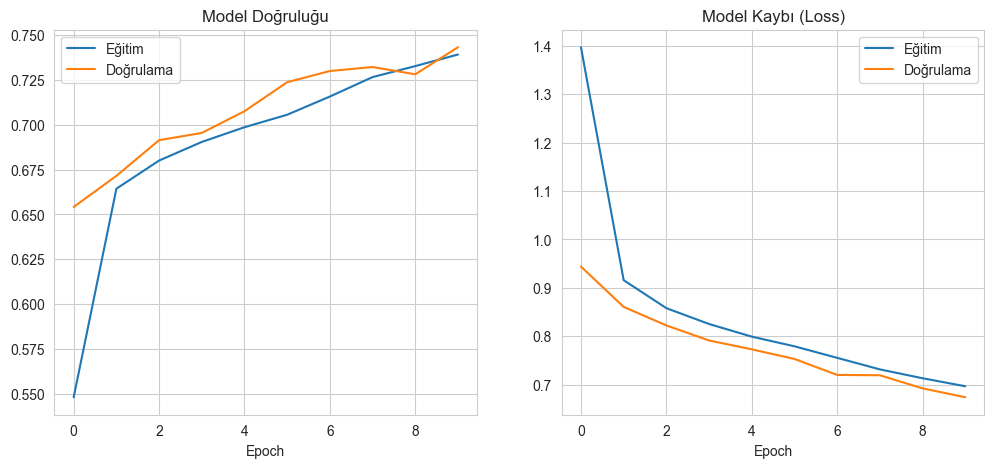

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, Dense, Dropout, BatchNormalization
import os

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

target_col = 'label' 
if target_col not in df.columns: target_col = 'main_label'

le = LabelEncoder()
y = le.fit_transform(df[target_col])
num_classes = len(le.classes_)
class_names = le.classes_

X = df.select_dtypes(include=[np.number])
cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"RNN Giriş Şekli: {X_train_reshaped.shape}")

model = Sequential()

model.add(GRU(64, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

print("\n--- RNN/GRU EĞİTİLİYOR ---")
history = model.fit(X_train_reshaped, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"\nRNN/GRU Doğruluğu: %{accuracy*100:.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim')
plt.plot(history.history['val_accuracy'], label='Doğrulama')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim')
plt.plot(history.history['val_loss'], label='Doğrulama')
plt.title('Model Kaybı (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Karşılaştırmalı Model Eğitimi (34 sınıflı)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Hedef Sütun: label
Eğitim Seti: (79281, 44)
Test Seti:   (19821, 44)

Modeller hazırlanıyor...

MODELLER YARIŞIYOR...

Model           | Acc (%)    | F1 Score   | Eğitim (sn)  | Tahmin (sn) 
---------------------------------------------------------------------------
Random Forest   | 93.80%     | 0.9324     | 3.8745       | 0.2550
XGBoost         | 94.72%     | 0.9433     | 25.9825       | 0.3306
LightGBM        | 36.27%     | 0.2750     | 13.6547       | 0.4829
CatBoost        | 93.60%     | 0.9309     | 55.1642       | 0.0308


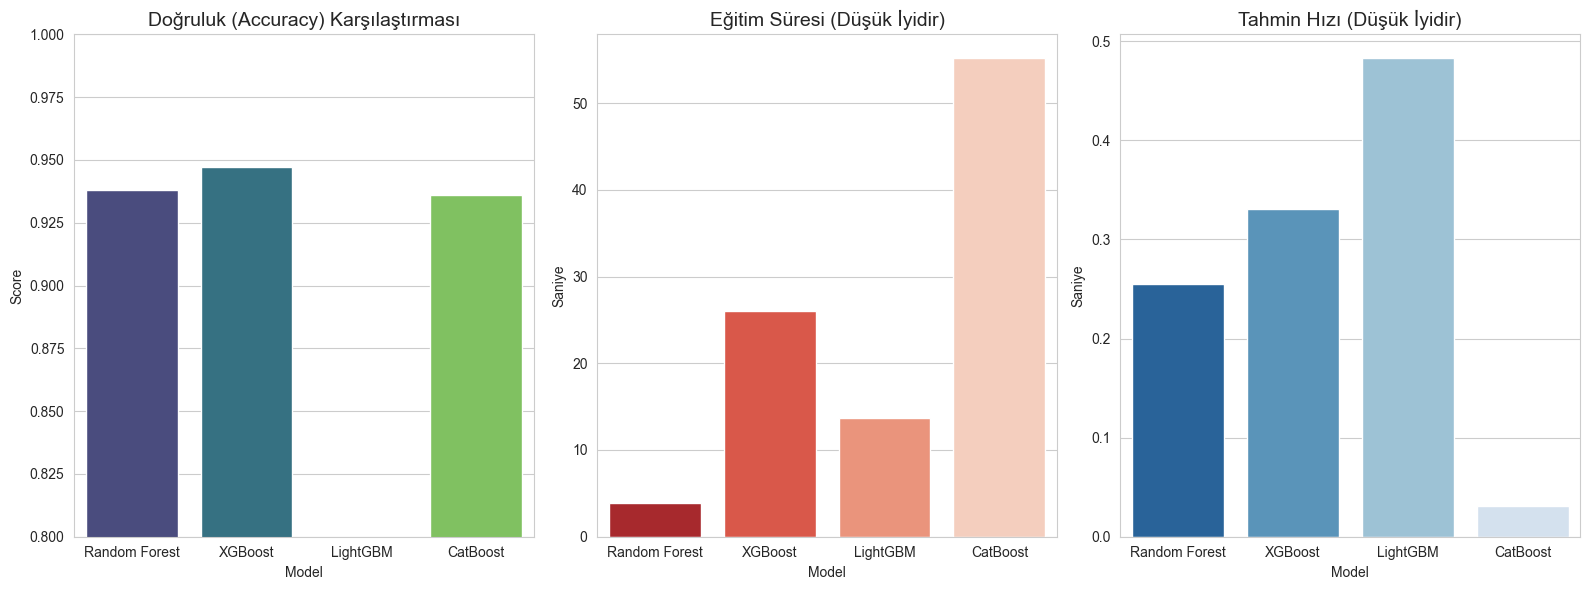


--- ŞAMPİYONLAR ---
En Doğru Model: XGBoost (%94.72)
En Hızlı Model:  Random Forest (3.8745 saniye)


In [58]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

if os.path.exists(file_path):
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)

    target_col = 'label'
    if target_col not in df.columns: 
        target_col = 'main_label'
    
    print(f"Hedef Sütun: {target_col}")

    le = LabelEncoder()
    y = le.fit_transform(df[target_col])
    class_names = le.classes_

    X = df.select_dtypes(include=[np.number])
    
    cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded', 'label', 'main_label']
    X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')

    X.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X.columns]

    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Eğitim Seti: {X_train.shape}")
    print(f"Test Seti:   {X_test.shape}")

    print("\nModeller hazırlanıyor...")
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
        
        "XGBoost": xgb.XGBClassifier(
            n_estimators=100, 
            learning_rate=0.1, 
            max_depth=6, 
            eval_metric='mlogloss', 
            n_jobs=-1, 
            random_state=42
        ),
        
        "LightGBM": lgb.LGBMClassifier(
            n_estimators=100, 
            learning_rate=0.1, 
            num_leaves=31, 
            n_jobs=-1, 
            random_state=42,
            verbose=-1 
        ),
        
        "CatBoost": CatBoostClassifier(
            iterations=100, 
            learning_rate=0.1, 
            depth=6, 
            verbose=0, 
            random_seed=42,
            allow_writing_files=False 
        )
    }

    results = []

    print("\nMODELLER YARIŞIYOR...\n")
    print(f"{'Model':<15} | {'Acc (%)':<10} | {'F1 Score':<10} | {'Eğitim (sn)':<12} | {'Tahmin (sn)':<12}")
    print("-" * 75)

    for name, model in models.items():
        try:
            start_train = time.time()
            model.fit(X_train, y_train)
            end_train = time.time()
            train_time = end_train - start_train
            
            start_pred = time.time()
            y_pred = model.predict(X_test)
            end_pred = time.time()
            pred_time = end_pred - start_pred
            
            if name == "CatBoost":
                y_pred = y_pred.flatten()
                
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            results.append({
                "Model": name,
                "Accuracy": acc,
                "F1 Score": f1,
                "Training Time (s)": train_time,
                "Prediction Time (s)": pred_time
            })
            
            print(f"{name:<15} | {acc*100:.2f}%     | {f1:.4f}     | {train_time:.4f}       | {pred_time:.4f}")
        except Exception as e:
            print(f"{name:<15} | HATA: {e}")

    if results:
        results_df = pd.DataFrame(results)

        plt.figure(figsize=(16, 6))

        plt.subplot(1, 3, 1)
        sns.barplot(x='Model', y='Accuracy', hue='Model', data=results_df, palette='viridis', legend=False)
        plt.title('Doğruluk (Accuracy) Karşılaştırması', fontsize=14)
        plt.ylim(0.8, 1.0) 
        plt.ylabel('Score')

        plt.subplot(1, 3, 2)
        sns.barplot(x='Model', y='Training Time (s)', hue='Model', data=results_df, palette='Reds_r', legend=False)
        plt.title('Eğitim Süresi (Düşük İyidir)', fontsize=14)
        plt.ylabel('Saniye')

        plt.subplot(1, 3, 3)
        sns.barplot(x='Model', y='Prediction Time (s)', hue='Model', data=results_df, palette='Blues_r', legend=False)
        plt.title('Tahmin Hızı (Düşük İyidir)', fontsize=14)
        plt.ylabel('Saniye')

        plt.tight_layout()
        plt.show()

        best_acc = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
        fastest_train = results_df.sort_values(by='Training Time (s)', ascending=True).iloc[0]

        print("\n--- ŞAMPİYONLAR ---")
        print(f"En Doğru Model: {best_acc['Model']} (%{best_acc['Accuracy']*100:.2f})")
        print(f"En Hızlı Model:  {fastest_train['Model']} ({fastest_train['Training Time (s)']:.4f} saniye)")
    else:
        print("Hiçbir model başarıyla çalışmadı.")

else:
    print("Dosya bulunamadı!")

LightGBM parametre optimizasyonu (RandomizedSearchCV)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Sınıf Sayısı: 34 (Bu yüzden optimizasyon ağır çalışıyor)

Hızlı Optimizasyon Başlıyor (Hedef Süre: 2-5 Dk)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Optimizasyon Tamamlandı! Süre: 177.97 saniye

EN İYİ PARAMETRELER:
{'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 50, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Final Modeli Test Ediliyor...

LightGBM (Optimize - Hızlı) DOĞRULUĞU: %35.13


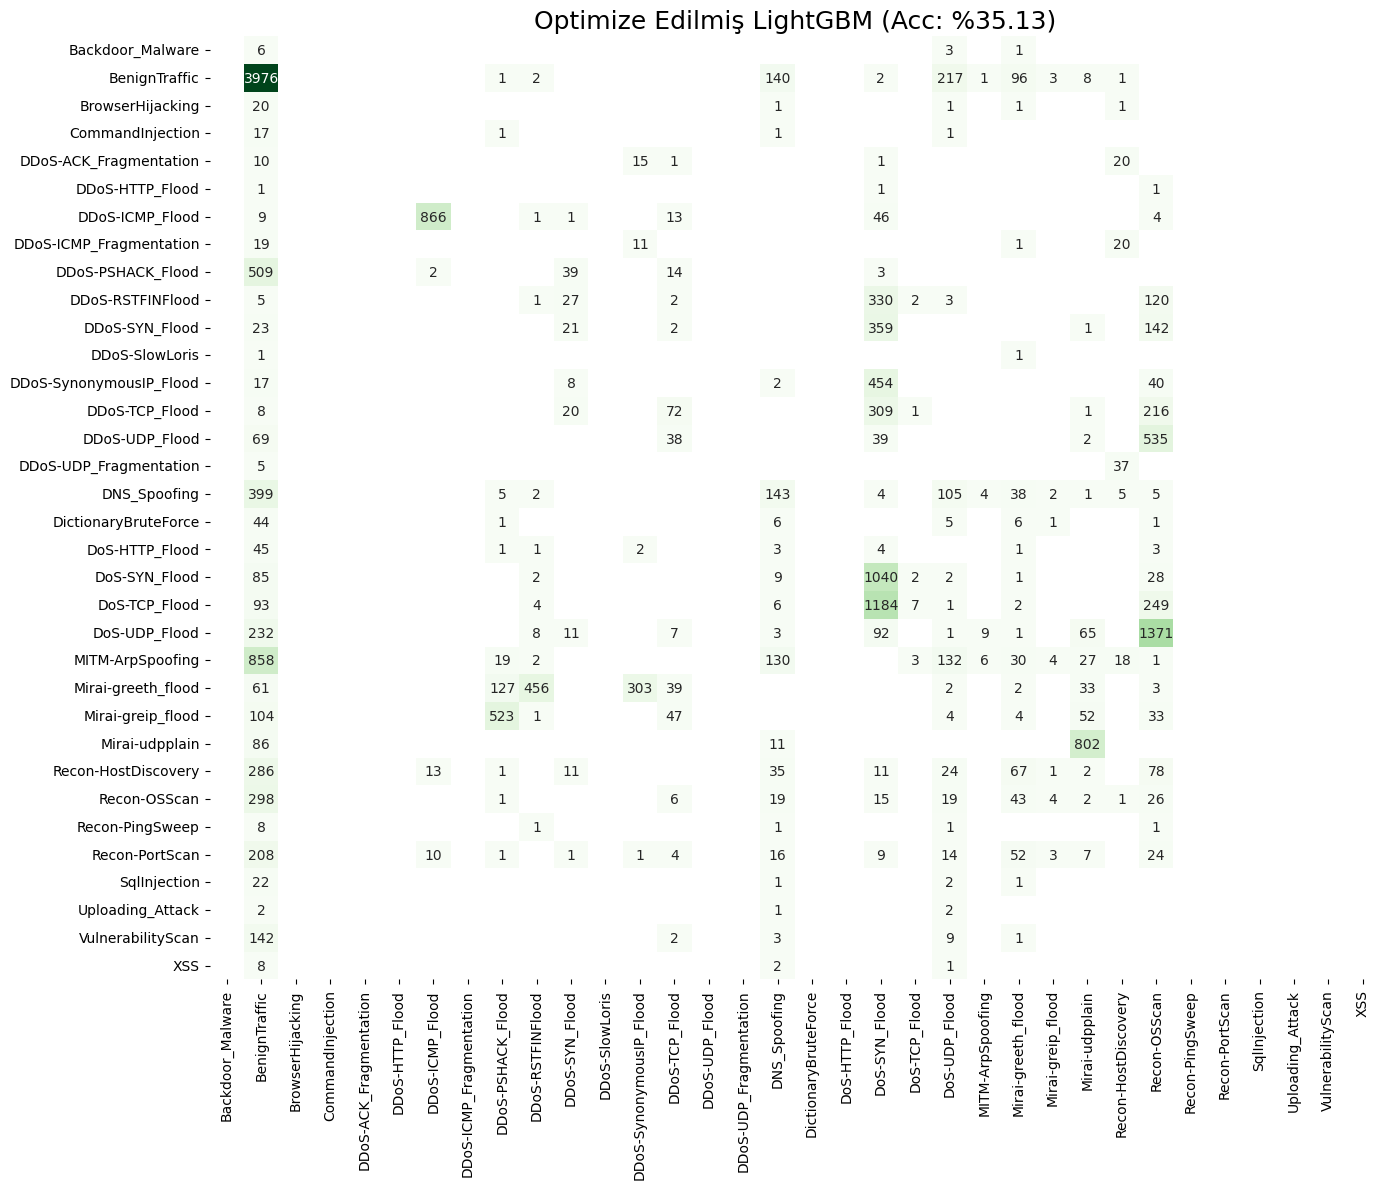


--- DETAYLI RAPOR ---
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        10
          BenignTraffic       0.52      0.89      0.66      4447
       BrowserHijacking       0.00      0.00      0.00        24
       CommandInjection       0.00      0.00      0.00        20
 DDoS-ACK_Fragmentation       0.00      0.00      0.00        47
        DDoS-HTTP_Flood       0.00      0.00      0.00         3
        DDoS-ICMP_Flood       0.97      0.92      0.95       940
DDoS-ICMP_Fragmentation       0.00      0.00      0.00        51
      DDoS-PSHACK_Flood       0.00      0.00      0.00       567
       DDoS-RSTFINFlood       0.00      0.00      0.00       490
         DDoS-SYN_Flood       0.15      0.04      0.06       548
         DDoS-SlowLoris       0.00      0.00      0.00         2
DDoS-SynonymousIP_Flood       0.00      0.00      0.00       521
         DDoS-TCP_Flood       0.29      0.11      0.16       627
 

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import time

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

target_col = 'label'
if target_col not in df.columns: target_col = 'main_label'

le = LabelEncoder()
y = le.fit_transform(df[target_col])
class_names = le.classes_
n_classes = len(class_names)

print(f"Sınıf Sayısı: {n_classes} (Bu yüzden optimizasyon ağır çalışıyor)")

X = df.select_dtypes(include=[np.number])
cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')

X.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X.columns]
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50, 80],
    'max_depth': [-1, 10, 15],
    'min_child_samples': [20, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\nHızlı Optimizasyon Başlıyor (Hedef Süre: 2-5 Dk)...")
start_time = time.time()

lgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=5,
    scoring='accuracy',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"\nOptimizasyon Tamamlandı! Süre: {elapsed_time:.2f} saniye")

best_params = random_search.best_params_
print(f"\nEN İYİ PARAMETRELER:\n{best_params}")

print("\nFinal Modeli Test Ediliyor...")
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nLightGBM (Optimize - Hızlı) DOĞRULUĞU: %{acc*100:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 12))
mask = (cm == 0)
sns.heatmap(cm, annot=True, fmt='d', mask=mask, cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title(f'Optimize Edilmiş LightGBM (Acc: %{acc*100:.2f})', fontsize=18)
plt.tight_layout()
plt.show()

print("\n--- DETAYLI RAPOR ---")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

Karşılaştırmalı Model Eğitimi (8 sınıflı)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

--- 8 ANA SINIF DAĞILIMI ---
category_8
DDoS          22484
DoS           22484
Normal        22484
Mirai         13435
Spoofing      10109
Recon          7308
Web             498
BruteForce      300
Name: count, dtype: int64

8 SINIFLI MODEL YARIŞI BAŞLIYOR...

Model           | Acc (%)    | F1 Score   | Eğitim (sn)  | Tahmin (sn) 
---------------------------------------------------------------------------
Random Forest   | 95.41%     | 0.9517     | 6.4882       | 0.1353
XGBoost         | 95.83%     | 0.9567     | 4.6058       | 0.0716
LightGBM        | 84.63%     | 0.8477     | 2.7985       | 0.1550
CatBoost        | 95.03%     | 0.9482     | 6.7623       | 0.0141


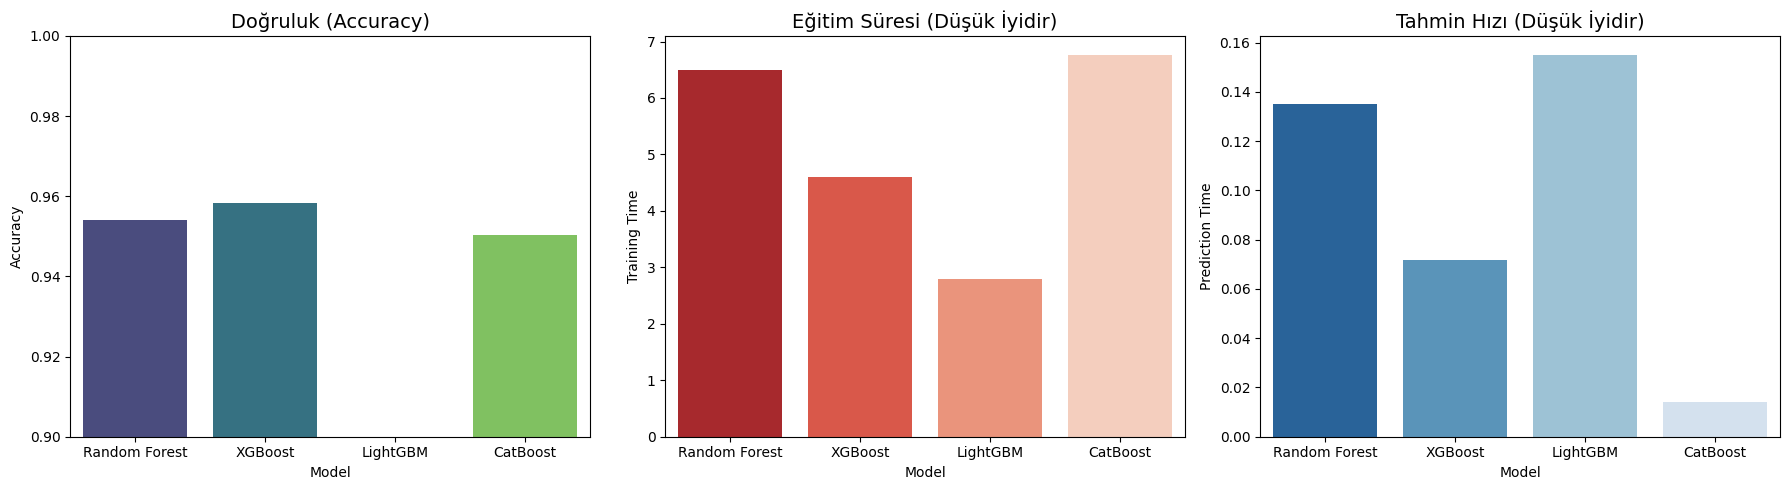


ŞAMPİYON MODEL: XGBoost (Acc: %95.83)
Şampiyonun detaylı hata analizi çiziliyor...


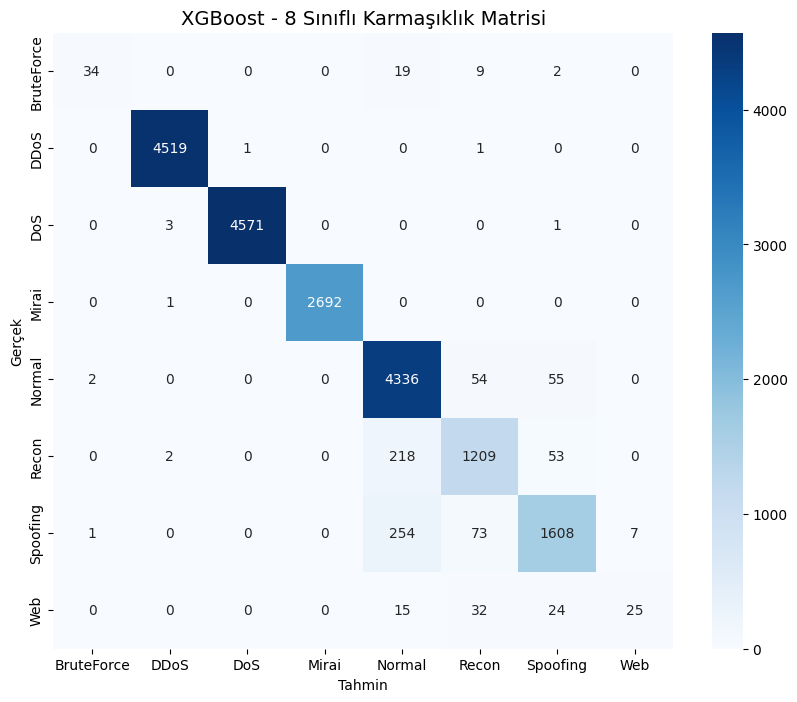


--- SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

  BruteForce       0.92      0.53      0.67        64
        DDoS       1.00      1.00      1.00      4521
         DoS       1.00      1.00      1.00      4575
       Mirai       1.00      1.00      1.00      2693
      Normal       0.90      0.98      0.93      4447
       Recon       0.88      0.82      0.85      1482
    Spoofing       0.92      0.83      0.87      1943
         Web       0.78      0.26      0.39        96

    accuracy                           0.96     19821
   macro avg       0.92      0.80      0.84     19821
weighted avg       0.96      0.96      0.96     19821



In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

def get_8_classes(label):
    label = str(label)
    if 'DDoS' in label: return 'DDoS'
    if 'DoS' in label: return 'DoS'
    if 'Mirai' in label: return 'Mirai'
    if 'Benign' in label or 'Normal' in label: return 'Normal'
    if 'Spoof' in label or 'MITM' in label: return 'Spoofing'
    if 'Recon' in label or 'Vulnerability' in label: return 'Recon'
    if 'Brute' in label: return 'BruteForce'
    if any(x in label for x in ['Web', 'XSS', 'Sql', 'Upload', 'Backdoor', 'Command', 'Browser']): return 'Web'
    return 'Other'

source_col = 'label' if 'label' in df.columns else 'main_label'
df['category_8'] = df[source_col].apply(get_8_classes)

print("\n--- 8 ANA SINIF DAĞILIMI ---")
print(df['category_8'].value_counts())

le = LabelEncoder()
y = le.fit_transform(df['category_8'])
class_names = le.classes_

X = df.select_dtypes(include=[np.number])
cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded', 'category_8']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')

X.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X.columns]
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=6,
        eval_metric='mlogloss', n_jobs=-1, random_state=42
    ),
    
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=100, learning_rate=0.1, num_leaves=31,
        n_jobs=-1, random_state=42, verbose=-1
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=100, learning_rate=0.1, depth=6,
        verbose=0, random_seed=42, task_type="CPU"
    )
}

results = []
print("\n8 SINIFLI MODEL YARIŞI BAŞLIYOR...\n")
print(f"{'Model':<15} | {'Acc (%)':<10} | {'F1 Score':<10} | {'Eğitim (sn)':<12} | {'Tahmin (sn)':<12}")
print("-" * 75)

best_model_name = ""
best_acc = 0
trained_models = {}

for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    
    if name == "CatBoost": y_pred = y_pred.flatten()
        
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name, "Accuracy": acc, "F1 Score": f1,
        "Training Time": end_train - start_train,
        "Prediction Time": end_pred - start_pred
    })
    
    trained_models[name] = model
    
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
    
    print(f"{name:<15} | {acc*100:.2f}%     | {f1:.4f}     | {end_train - start_train:.4f}       | {end_pred - start_pred:.4f}")

results_df = pd.DataFrame(results)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Doğruluk (Accuracy)', fontsize=14)
plt.ylim(0.90, 1.0) 

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='Training Time', data=results_df, palette='Reds_r')
plt.title('Eğitim Süresi (Düşük İyidir)', fontsize=14)

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Prediction Time', data=results_df, palette='Blues_r')
plt.title('Tahmin Hızı (Düşük İyidir)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nŞAMPİYON MODEL: {best_model_name} (Acc: %{best_acc*100:.2f})")
print("Şampiyonun detaylı hata analizi çiziliyor...")

champ_model = trained_models[best_model_name]
y_pred_champ = champ_model.predict(X_test)
if best_model_name == "CatBoost": y_pred_champ = y_pred_champ.flatten()

cm = confusion_matrix(y_test, y_pred_champ)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{best_model_name} - 8 Sınıflı Karmaşıklık Matrisi', fontsize=14)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

print("\n--- SINIFLANDIRMA RAPORU ---")
print(classification_report(y_test, y_pred_champ, target_names=class_names, zero_division=0))

Karşılaştırmalı Model Eğitimi (2 sınıflı)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...

--- İKİLİ SINIF DAĞILIMI ---
binary_label
Attack    76618
Normal    22484
Name: count, dtype: int64

2 SINIFLI (BINARY) MODEL YARIŞI BAŞLIYOR...

Model           | Acc (%)    | F1 Score   | Eğitim (sn)  | Tahmin (sn) 
---------------------------------------------------------------------------
Random Forest   | 97.17%     | 0.9718     | 4.9636       | 0.0841
XGBoost         | 97.13%     | 0.9716     | 0.6481       | 0.0140
LightGBM        | 97.20%     | 0.9722     | 0.7938       | 0.0211
CatBoost        | 97.01%     | 0.9703     | 2.6506       | 0.0135


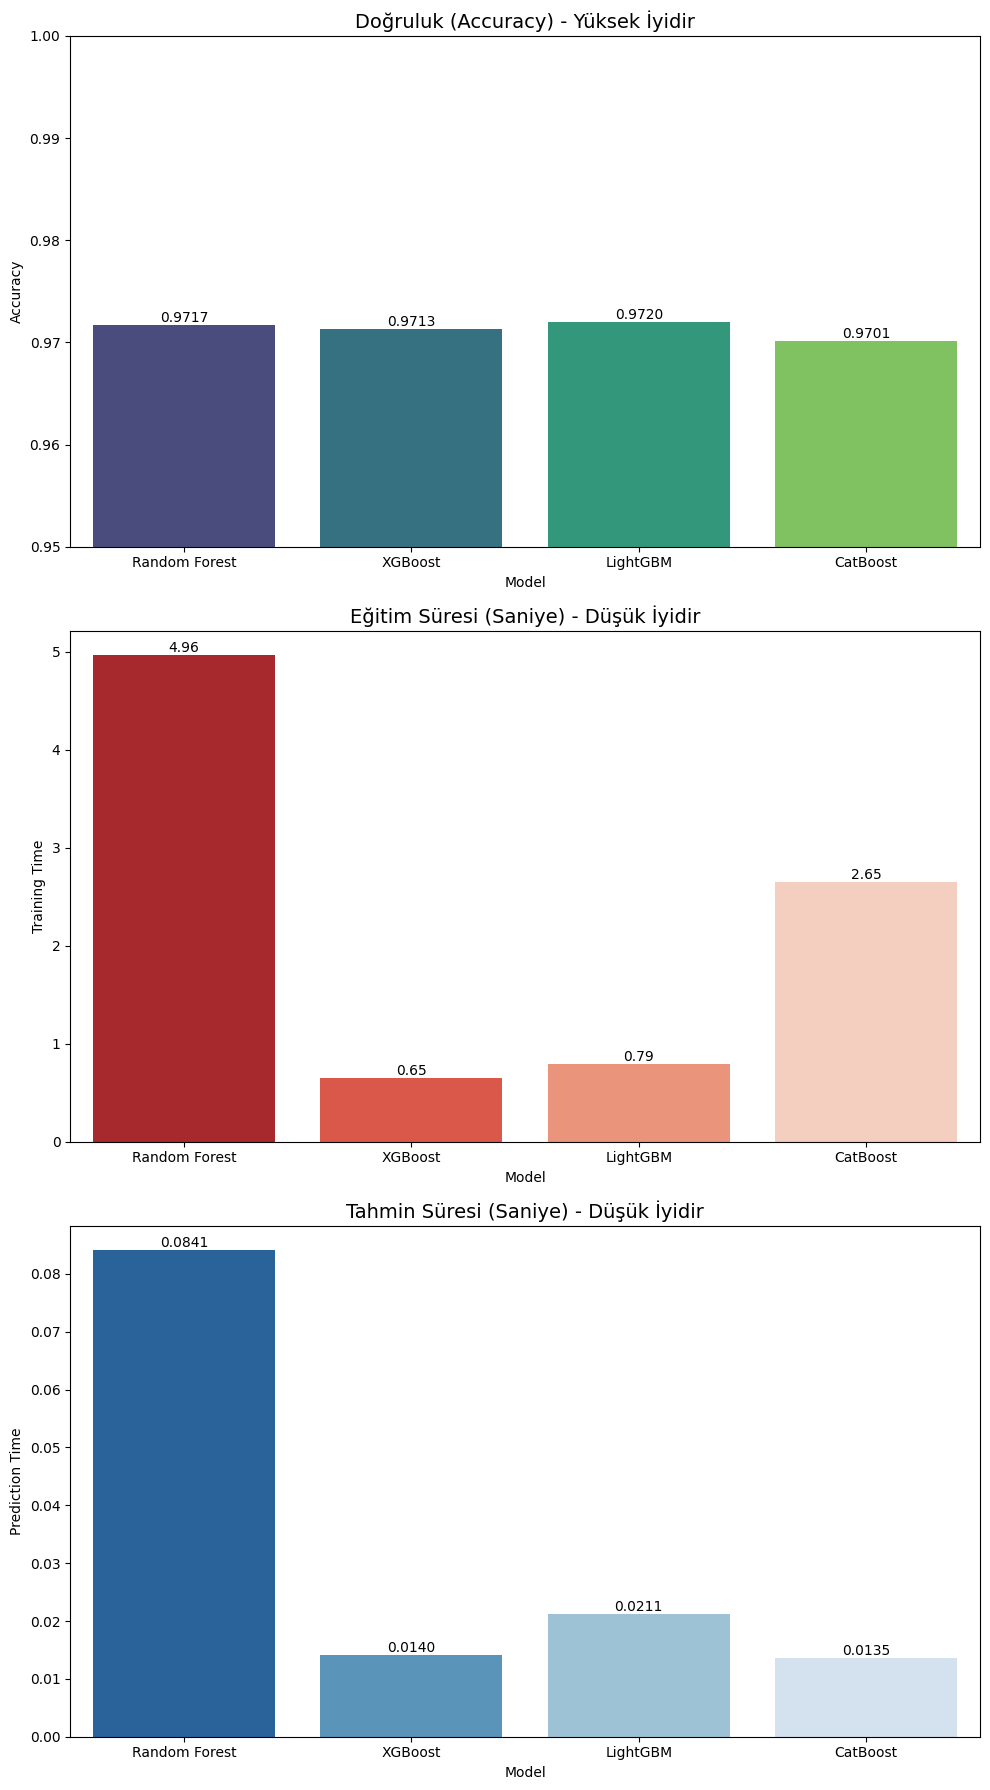


ŞAMPİYON MODEL: LightGBM (Acc: %97.20)


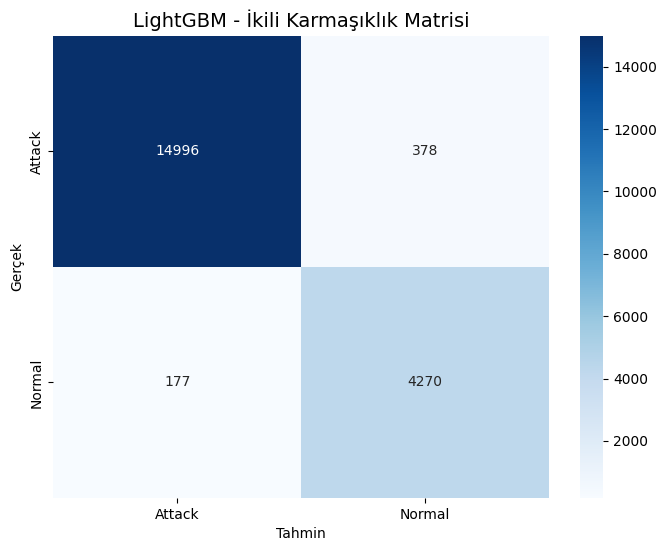


--- SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

      Attack       0.99      0.98      0.98     15374
      Normal       0.92      0.96      0.94      4447

    accuracy                           0.97     19821
   macro avg       0.95      0.97      0.96     19821
weighted avg       0.97      0.97      0.97     19821



In [6]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

print(f"Veri yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

target_col = 'label' if 'label' in df.columns else 'main_label'

def get_binary_label(text):
    text = str(text)
    if 'Benign' in text or 'Normal' in text:
        return 'Normal'
    else:
        return 'Attack'

df['binary_label'] = df[target_col].apply(get_binary_label)

print("\n--- İKİLİ SINIF DAĞILIMI ---")
print(df['binary_label'].value_counts())

le = LabelEncoder()
y = le.fit_transform(df['binary_label'])
class_names = le.classes_ 

X = df.select_dtypes(include=[np.number])
cols_to_drop = ['label_encoded', 'Weight', 'Number', 'target_encoded', 'target', 'main_label_encoded', 'binary_label', 'category_8', 'label', 'main_label']
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns], errors='ignore')

X.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X.columns]
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=6, 
        eval_metric='logloss', n_jobs=-1, random_state=42
    ),
    
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=100, learning_rate=0.1, num_leaves=31, 
        n_jobs=-1, random_state=42, verbose=-1
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=100, learning_rate=0.1, depth=6, 
        verbose=0, random_seed=42, task_type="CPU"
    )
}

results = []
trained_models = {}
best_acc = 0
best_model_name = ""

print("\n2 SINIFLI (BINARY) MODEL YARIŞI BAŞLIYOR...\n")
print(f"{'Model':<15} | {'Acc (%)':<10} | {'F1 Score':<10} | {'Eğitim (sn)':<12} | {'Tahmin (sn)':<12}")
print("-" * 75)

for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    
    if name == "CatBoost": y_pred = y_pred.flatten()
        
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name, "Accuracy": acc, "F1 Score": f1,
        "Training Time": end_train - start_train,
        "Prediction Time": end_pred - start_pred
    })
    
    trained_models[name] = model
    
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
    
    print(f"{name:<15} | {acc*100:.2f}%     | {f1:.4f}     | {end_train - start_train:.4f}       | {end_pred - start_pred:.4f}")

results_df = pd.DataFrame(results)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', ax=axes[0])
axes[0].set_title('Doğruluk (Accuracy) - Yüksek İyidir', fontsize=14)
axes[0].set_ylim(0.95, 1.0) 
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.4f')

sns.barplot(x='Model', y='Training Time', data=results_df, palette='Reds_r', ax=axes[1])
axes[1].set_title('Eğitim Süresi (Saniye) - Düşük İyidir', fontsize=14)
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.2f')

sns.barplot(x='Model', y='Prediction Time', data=results_df, palette='Blues_r', ax=axes[2])
axes[2].set_title('Tahmin Süresi (Saniye) - Düşük İyidir', fontsize=14)
for i in axes[2].containers:
    axes[2].bar_label(i, fmt='%.4f')

plt.tight_layout()
plt.show()

print(f"\nŞAMPİYON MODEL: {best_model_name} (Acc: %{best_acc*100:.2f})")

champ_model = trained_models[best_model_name]
y_pred_champ = champ_model.predict(X_test)
if best_model_name == "CatBoost": y_pred_champ = y_pred_champ.flatten()

cm = confusion_matrix(y_test, y_pred_champ)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{best_model_name} - İkili Karmaşıklık Matrisi', fontsize=14)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

print("\n--- SINIFLANDIRMA RAPORU ---")
print(classification_report(y_test, y_pred_champ, target_names=class_names))

GRADIO KÜTÜPHANESİ ile prototip deneme arayüz

In [7]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

# --- 1. MODEL EĞİTİMİ VE HAZIRLIK (EKSİK OLAN KISIM) ---

# Veri setini yükle
file_path = 'dataset_output/ciciot2023_balanced2.csv'
if not os.path.exists(file_path):
    file_path = 'dataset_output/ciciot2023_balanced.csv'

# Veri seti yoksa hata vermemesi için dummy (boş) veri ile devam et
if os.path.exists(file_path):
    print(f"Veri yükleniyor: {file_path} ...")
    df = pd.read_csv(file_path)
    
    # Arayüzdeki girdilere karşılık gelen sütunları belirle
    # (Veri setindeki gerçek isimlere göre eşleştirme yapıyoruz)
    # Eğer veri setinde bu isimler yoksa, hata almamak için var olanları veya 0'ları kullanacağız.
    feature_cols = ['flow_duration', 'rst_count', 'urg_count', 'header_length', 
                    'Protocol Type', 'IAT', 'syn_count', 'ack_count']
    
    # Eksik sütunları 0 ile doldur (Kodun patlamaması için)
    for col in feature_cols:
        if col not in df.columns:
            df[col] = 0

    target_col = 'label' if 'label' in df.columns else 'main_label'
    
    # Hızlı eğitim için verinin küçük bir kısmını alıyoruz
    X = df[feature_cols]
    y = df[target_col]
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.05, random_state=42) # %5 veri yeterli demo için

    print("Model eğitiliyor...")
    model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    print("Model hazır.")

else:
    print("UYARI: Veri seti bulunamadı. Rastgele tahmin yapan dummy model kullanılıyor.")
    model = None # Dummy mod

# --- 2. ANALİZ FONKSİYONU (HATAYI ÇÖZEN KISIM) ---
def analyze_traffic(flow_dur, rst_count, urg_count, header_len, proto_str, iat, syn, ack):
    """
    Arayüzden gelen verileri alır, modelden geçirir ve sonucu döndürür.
    """
    # Protokol string'ini (örn: "TCP (6)") sayıya çevir
    if "TCP" in proto_str: proto_val = 6
    elif "UDP" in proto_str: proto_val = 17
    elif "ICMP" in proto_str: proto_val = 1
    else: proto_val = 0
    
    # Girdiyi DataFrame'e çevir
    input_df = pd.DataFrame([[flow_dur, rst_count, urg_count, header_len, proto_val, iat, syn, ack]], 
                            columns=['flow_duration', 'rst_count', 'urg_count', 'header_length', 
                                     'Protocol Type', 'IAT', 'syn_count', 'ack_count'])
    
    # Tahmin yap
    if model:
        pred_class = model.predict(input_df)[0]
        try:
            pred_prob = np.max(model.predict_proba(input_df))
        except:
            pred_prob = 0.99
    else:
        # Model yoksa demo cevap
        pred_class = "Demo_Attack"
        pred_prob = 0.85

    # Sonuçları formatla
    if "Benign" in str(pred_class) or "Normal" in str(pred_class):
        risk_label = "DÜŞÜK"
        msg = "Trafik normal görünüyor. Tehdit yok."
    else:
        risk_label = "YÜKSEK"
        msg = f"DİKKAT! {pred_class} saldırı paterni tespit edildi!"

    # Gradio çıktı formatları: (Label dict, String, String)
    return {str(pred_class): float(pred_prob)}, f"{pred_prob:.2f} ({risk_label})", msg


# --- 3. SENİN ARAYÜZ KODUN (HİÇ DEĞİŞTİRİLMEDİ) ---

custom_css = """
.container { max-width: 95% !important; margin: auto; }
#results_box { background-color: #f8f9fa; padding: 20px; border-radius: 12px; border: 1px solid #ddd; }
"""

with gr.Blocks(css=custom_css) as demo:
    with gr.Column(elem_classes="container"):
        gr.Markdown("# AI Tabanlı IoT Saldırı Tespit Sistemi")
        
        gr.Markdown("### Trafik Öznitelikleri")
        with gr.Row():
            flow_dur = gr.Slider(0, 100, value=0.5, label="Flow Duration")
            rst_count = gr.Slider(0, 500, value=0, label="RST Count")
            urg_count = gr.Number(value=0, label="URG Count")
            header_len = gr.Number(value=5000, label="Header Length")

        with gr.Row():
            proto_type = gr.Dropdown(["TCP (6)", "UDP (17)", "ICMP (1)", "Diğer"], value="TCP (6)", label="Protocol Type")
            iat = gr.Number(value=0.01, label="IAT (Inter-Arrival Time)")
            syn = gr.Slider(0, 10, value=0, label="SYN Count")
            ack = gr.Slider(0, 10, value=1, label="ACK Flag")

        analyze_btn = gr.Button("TRAFİĞİ ANALİZ ET", variant="primary")

        gr.Markdown("---")
        
        with gr.Column(elem_id="results_box"):
            gr.Markdown("### Analiz Raporu")
            with gr.Row():
                lbl_pred = gr.Label(label="Tespit")
                lbl_risk = gr.Label(label="Risk Skoru")
            txt_msg = gr.Textbox(label="Güvenlik Mesajı", lines=2)

    analyze_btn.click(
        fn=analyze_traffic,
        inputs=[flow_dur, rst_count, urg_count, header_len, proto_type, iat, syn, ack],
        outputs=[lbl_pred, lbl_risk, txt_msg]
    )

print("Sadece LOKAL sunucuda başlatılıyor (Dış erişim kapalı)...")

demo.launch(
    share=False,
    theme=gr.themes.Soft(),
    debug=False
)

Veri yükleniyor: dataset_output/ciciot2023_balanced2.csv ...
Model eğitiliyor...
Model hazır.
Sadece LOKAL sunucuda başlatılıyor (Dış erişim kapalı)...
* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
